In [1]:
# 手順と機能(ESPAR map)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 各要素の積のデータが用意できたら「 https://chemapps.stolaf.edu/jmol/swingjs/site/jvxlCoder.html 」に
# 　アクセスする。
# 4 Valuesに積のデータをリスト形式で入力し、積データのmin、maxも入力する。
# 5 Testを実行すると、データが変換されるので、escapedのデータを記録しておく。
# 6 Jvxlファイルのコピーをエディタで開く。 i-ESP mapとe-ESP mapのどちらでもよい。
# 7 jvxlColorDataのdataをescapedのデータで置き換える。また、max,minも変更
# 8 Jmolで表示

In [2]:
# 手順と機能(ESPAR plot)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 int, exのデータをdfに変換
# 4 int, exのデータから相関プロットを作成（ヒストグラムつき）
# 4 積のデータについて、全体のmax, minを元に、4分割表示なら、上位75%<積<100%の範囲、中位50<積<75の範囲、
# 25<積<50の範囲、下位0<積<25の範囲を特定し、フラグをつける。または新たなdfを作成する。このとき、範囲に含まれないindexのデータは0にする。
# もとのESPAR plotを灰色で表示し、範囲ないのデータを赤で表示して重ねる。
# 5 この範囲外のデータが0のリストを作成し、ESPAR mapに投影する。

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# i-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たi-ESPデータ
int_list = [0.04010378, 0.039243564, 0.039265618, 0.038934767, 0.039022997, 0.03959647, 0.03992732, 0.039530292, 0.039353848, 0.040059656, 0.040081725, 0.04001555, 0.039971426, 0.04067725, 0.040324345, 0.039089173, 0.039971426, 0.03796427, 0.038074553, 0.037567243, 0.039177388, 0.039905265, 0.039728805, 0.040169954, 0.039111227, 0.038162783, 0.03591299, 0.038074553, 0.038802415, 0.038846537, 0.03822896, 0.037037894, 0.034435183, 0.036133558, 0.036640868, 0.036729082, 0.036530584, 0.035957098, 0.034633696, 0.03315589, 0.034788087, 0.03377348, 0.033883765, 0.034104332, 0.032913268, 0.032317743, 0.032030985, 0.033001497, 0.032295674, 0.031876594, 0.039640576, 0.040192008, 0.039817035, 0.03864804, 0.04001555, 0.03763342, 0.03721434, 0.039089173, 0.036464408, 0.03725846, 0.036045328, 0.040655196, 0.0403464, 0.040192008, 0.0349866, 0.035383627, 0.034501344, 0.040368453, 0.03955236, 0.035383627, 0.032339796, 0.039331794, 0.03836128, 0.03417051, 0.03083992, 0.035957098, 0.036265895, 0.031391352, 0.029031277, 0.034832194, 0.03408228, 0.033817604, 0.03110461, 0.028016664, 0.027597584, 0.031325176, 0.03050907, 0.030266456, 0.029759154, 0.028612196, 0.027112328, 0.027597584, 0.029759154, 0.028457798, 0.027840212, 0.038273066, 0.039221495, 0.038074553, 0.03688349, 0.037655473, 0.036001205, 0.03648646, 0.03465575, 0.03864804, 0.036640868, 0.040589035, 0.039353848, 0.03425874, 0.033398524, 0.034060225, 0.033486754, 0.035626248, 0.034016103, 0.03767754, 0.03167808, 0.03295739, 0.032383904, 0.03262654, 0.038206905, 0.030817866, 0.030663475, 0.02931802, 0.030663475, 0.03143546, 0.036861435, 0.029163621, 0.027112328, 0.029185675, 0.029273897, 0.03295739, 0.025877155, 0.02567865, 0.028501913, 0.02731084, 0.028369568, 0.03361909, 0.027002051, 0.023847923, 0.024862543, 0.02468609, 0.026296236, 0.029670924, 0.025810987, 0.023649417, 0.023803815, 0.022458352, 0.021509916, 0.021576084, 0.022348069, 0.024730198, 0.022480406, 0.025215454, 0.02409055, 0.022259846, 0.03245008, 0.03242801, 0.03253831, 0.03194277, 0.03474398, 0.032119215, 0.03886859, 0.032560363, 0.03370732, 0.033971995, 0.034038156, 0.034104332, 0.0333544, 0.03245008, 0.032339796, 0.032582417, 0.035030723, 0.032670647, 0.031876594, 0.031832486, 0.033133835, 0.030178234, 0.030442894, 0.02995766, 0.03152369, 0.031236947, 0.031038433, 0.026869707, 0.031236947, 0.03028851, 0.024641976, 0.03194277, 0.030531123, 0.02525957, 0.022326015, 0.03304562, 0.03320001, 0.028038718, 0.022105448, 0.021046728, 0.032979444, 0.028722487, 0.02477432, 0.019083664, 0.018995434, 0.031788364, 0.028259285, 0.024531692, 0.021112889, 0.021046728, 0.022987708, 0.020539418, 0.014716417, 0.0145399645, 0.02567865, 0.019943878, 0.016900048, 0.016414791, 0.014672309, 0.013238616, 0.013459191, 0.013370961, 0.016348623, 0.014297351, 0.03209716, 0.033089727, 0.031633973, 0.030773759, 0.031391352, 0.029075392, 0.031788364, 0.02779609, 0.031303123, 0.027200557, 0.029075392, 0.027619638, 0.03315589, 0.03286916, 0.032648593, 0.033177942, 0.027641691, 0.02821517, 0.032295674, 0.032229513, 0.03218539, 0.028391637, 0.028325453, 0.031656027, 0.031656027, 0.027774036, 0.026274182, 0.031964824, 0.023450911, 0.032141283, 0.03361909, 0.033310294, 0.019260116, 0.03754519, 0.03758931, 0.014076777, 0.037611365, 0.038471565, 0.03864804, 0.03357497, 0.014804646, 0.008496411, 0.03734669, 0.03734669, 0.03549391, 0.017980821, 0.006092228, 0.0047908723, 0.0364203, 0.03637618, 0.034854263, 0.03227362, 0.014165007, 0.003026329, 0.0026293024, 0.03377348, 0.033751428, 0.031633973, 0.02922979, 0.0200321, 0.012863658, 0.009290464, 0.003423348, 0.0041732714, 0.0025631413, 0.033751428, 0.030795813, 0.02905333, 0.021620192, 0.015466347, 0.011474073, 0.008518465, 0.005827546, 0.036442354, 0.03763342, 0.035052776, 0.032736808, 0.030950204, 0.029362127, 0.039640576, 0.038206905, 0.033597022, 0.03906712, 0.029163621, 0.027134389, 0.02576688, 0.02618596, 0.02583304, 0.03780988, 0.03458959, 0.02532573, 0.02731084, 0.024730198, 0.034523413, 0.032405958, 0.023914099, 0.024928719, 0.022656858, 0.03205304, 0.03185454, 0.031898662, 0.019568913, 0.032560363, 0.03205304, 0.015025213, 0.014959045, 0.014914937, 0.036442354, 0.011407904, 0.00948897, 0.040412575, 0.037611365, 0.004857041, -0.0014953092, 0.039640576, 0.039265618, 0.03919944, -0.0042744726, -0.0141117945, 0.039331794, 0.038670093, 0.0013941303, -0.013979457, -0.021633156, 0.039022997, 0.03904505, 0.03648646, -0.011729665, -0.02315507, -0.02439025, 0.039089173, 0.037853986, 0.03670703, 0.0018573254, -0.010759167, -0.010450371, -0.020221524, -0.024588764, 0.036773205, 0.03439106, 0.034104332, 0.030729651, 0.028259285, 0.025215454, 0.015664853, 0.010834426, 0.0064230785, 0.0007324219, 0.0022322834, -0.0042965263, 0.034038156, 0.030795813, 0.028148994, 0.02541396, 0.01575309, 0.009797767, 0.004857041, 0.041537464, 0.04193449, 0.04184626, 0.04109633, 0.039817035, 0.0403464, 0.03919944, 0.035427734, 0.029295951, 0.030729651, 0.030266456, 0.03050907, 0.042177126, 0.04301527, 0.03913328, 0.028523967, 0.027332902, 0.03946413, 0.03701584, 0.034611642, 0.02724468, 0.025524251, 0.03320001, 0.03293532, 0.032825038, 0.025237508, 0.022458352, 0.031369284, 0.018510185, 0.017870545, 0.017848492, 0.03315589, 0.008143492, 0.038824484, 0.0017690882, -0.0019585043, -0.00795795, 0.039397955, 0.03970675, 0.039839104, -0.009171076, -0.018258467, -0.019074574, -0.019339256, 0.039618522, -0.016670384, -0.02571366, -0.026992954, 0.03959647, -0.024434365, -0.031602822, -0.03230864, 0.04039052, -0.031029351, -0.03451432, -0.034823112, 0.039221495, 0.039221495, -0.011288524, -0.0217655, -0.029661827, -0.033235025, -0.033587933, 0.039309725, 0.037192285, 0.03688349, -0.0010541752, -0.012567826, -0.021280251, -0.027147353, -0.029683888, -0.029419199, -0.032661546, 0.036773205, 0.03421463, 0.030023836, 0.027288787, 0.02583304, 0.016304508, 0.008275837, 0.0018352643, -0.005090572, -0.015744, -0.023463868, -0.027257636, 0.04356669, 0.043787256, 0.043059394, 0.04389754, 0.041537464, 0.04347846, 0.040743425, 0.041978598, 0.040787533, 0.041890383, 0.043390244, 0.04281676, 0.042353556, 0.041493356, 0.038118675, 0.035582125, 0.042044774, 0.042088896, 0.042133003, 0.03390582, 0.031986877, 0.028854825, 0.031920716, 0.040500805, 0.030134112, 0.026582971, 0.0297371, 0.03522922, 0.03320001, 0.026582971, 0.030729651, 0.024509639, 0.016194224, 0.032339796, 0.010768257, 0.0045703053, -0.002046734, 0.038846537, -0.004583262, -0.011663489, -0.01375889, 0.038846537, 0.038670093, -0.022008121, 0.03895682, -0.022868335, -0.028470762, -0.028029628, 0.039750874, -0.031977788, -0.03140431, 0.039353848, -0.034933396, -0.032198355, -0.031536654, 0.039662644, -0.030367643, -0.026110686, 0.038670093, 0.037479028, -0.029264808, -0.02315507, -0.021853723, -0.014641158, 0.036464408, 0.03275886, 0.029935606, 0.029891483, 0.026649147, 0.027222611, 0.023914099, 0.0152678415, 0.0054966956, -0.0022893623, -0.014729388, -0.01852315, -0.020971455, -0.023507982, -0.020287693, -0.0095460415, -0.010979734, -0.00045864284, 0.00026922673, 0.0029160455, 0.02986943, -0.02116996, -0.02092734, -0.014530875, 0.008827262, 0.009180173, 0.005165845, 0.008408181, 0.008033216, 0.011496127, 0.009025767, 0.04533124, 0.045176834, 0.04458131, 0.04650025, 0.045860603, 0.04581648, 0.046059117, 0.045220956, 0.04323584, 0.04548563, 0.04314761, 0.042794704, 0.04259619, 0.04678698, 0.04425046, 0.04169187, 0.041427195, 0.039155334, 0.03913328, 0.040324345, 0.03809662, 0.037611365, 0.03701584, 0.0341264, 0.034545466, 0.029847376, 0.0333544, 0.02047325, 0.013304792, 0.009930104, 0.030906096, 0.0076361895, -0.0029510558, -0.001980558, 0.037280515, -0.007980011, -0.012898669, -0.011575267, 0.03725846, 0.03767754, -0.021964006, -0.018677548, 0.038162783, -0.023110963, 0.039111227, -0.024632879, 0.03895682, -0.029992677, -0.021787554, 0.039221495, -0.010384202, -0.010295972, 0.038339227, 0.03701584, -0.0060610697, -0.010163635, 0.00035744905, 0.0019014329, 0.03606738, 0.032472134, 0.02931802, 0.02931802, 0.02589921, 0.022987708, 0.013481244, 0.0025631413, -0.010428309, -0.011817887, -0.01614102, -0.005752273, 0.0037100837, 0.002077885, -0.00028219074, -0.002046734, -0.020309754, -0.02042003, -0.020883225, -0.019736275, -0.018831946, -0.0076932684, 0.00044567883, 0.0045261905, 0.007944986, 0.0020558313, -0.013869166, -0.03091906, -0.039190356, -0.043822277, -0.047792498, 0.012841605, 0.0142091215, 0.013878271, 0.0124225095, 0.0075479597, -0.006215468, -0.02580189, -0.041263696, -0.053372867, -0.06153388, 0.016194224, 0.015576631, 0.015113443, 0.01012861, -0.00072333217, -0.020772941, -0.03711702, -0.050748114, -0.062041186, -0.06433509, -0.07026836, -0.070466876, 0.013701819, 4.8667192e-05, -0.0077373832, -0.018854, -0.034183465, -0.04781456, -0.059592884, -0.06998163, -0.072606385, -0.07642221, -0.03480106, -0.034933396, -0.04642498, -0.057784226, -0.06808475, -0.0771942, -0.07756916, -0.035087798, -0.053372867, -0.0653497, -0.07289312, -0.07745887, 0.048022166, 0.048022166, 0.047691315, 0.04861769, 0.047470734, 0.048683867, 0.046301723, 0.04590471, 0.04813245, 0.049345583, 0.049235284, 0.05042635, 0.043919593, 0.04343435, 0.05201444, 0.05243352, 0.040919885, 0.051286563, 0.050205782, 0.04323584, 0.039309725, 0.050360173, 0.046764925, 0.03730257, 0.035339504, 0.030112058, 0.027421132, 0.023296513, 0.023053885, 0.022877432, 0.03582476, 0.035604194, 0.034060225, 0.022656858, 0.016106002, 0.016017772, 0.013569467, 0.013481244, 0.028656311, 0.008783154, 0.006158389, 0.006533362, 0.028656311, -0.0010541752, 0.004371792, -0.00019396096, 0.00044567883, 0.03370732, -0.0056419894, -0.0045170933, 0.0349866, 0.035780653, -0.0076932684, -0.008244693, 0.036817312, -0.010163635, -0.015060239, -0.011862002, 0.0373908, -0.012898669, -0.011310585, 0.03822896, -0.010648876, -0.0049802884, 0.03734669, 0.03734669, 0.03734669, -0.01020775, 0.009797767, 0.035052776, 0.035052776, 0.035052776, 0.01021684, 0.0038865358, -0.0029510558, -0.008244693, -0.018214352, 0.03227362, 0.028104886, 0.024862543, 0.022303961, 0.010613859, -0.0020687878, -0.010803282, -0.011398815, -0.019074574, -0.032683607, -0.03537453, -0.03976383, -0.04040348, -0.016935065, -0.020067126, -0.015567541, -0.013207465, -0.00052481145, -0.051895063, -0.054762445, -0.010273911, 0.010768257, 0.011474073, -0.061886787, -0.056350533, -0.06601141, -0.06594524, 0.015069321, 0.016348623, 0.016811825, -0.07465766, -0.07472384, 0.014054723, 0.009047836, 0.007790588, -0.0042524114, -0.077480935, -0.08147321, -0.08175995, -0.0015173629, -0.018699609, -0.024368197, -0.0838774, -0.084274426, -0.08645804, -0.04009468, -0.043447316, -0.04946882, -0.058291532, -0.06757744, -0.076245755, -0.08407591, -0.08875195, -0.088884294, -0.057607774, -0.0689229, -0.07340043, -0.07728242, -0.083502434, -0.08114236, -0.08769322, -0.07763533, 0.048088327, 0.049102947, 0.047845706, 0.047647193, 0.04987493, 0.050646916, 0.05183798, 0.053426072, 0.055190608, 0.05565381, 0.044206336, 0.044007823, 0.0605063, 0.061410636, 0.041758046, 0.06502794, 0.0588741, 0.054440692, 0.050161675, 0.047779545, 0.0431035, 0.039309725, 0.03670703, 0.033552915, 0.030906096, 0.029935606, 0.02898717, 0.03864804, 0.025281623, 0.020826153, 0.020539418, 0.0356483, 0.036949664, 0.018686637, 0.013525359, 0.014120892, 0.030266456, 0.028634258, 0.006621577, 0.008606695, 0.026141837, 0.008430235, 0.0035998076, 0.004129164, 0.028832763, 0.000247173, 0.0012617856, 0.03465575, 0.03390582, -0.0077373832, 0.00044567883, 0.00064419955, 0.034104332, 0.034236684, 0.00071036816, 0.0027837008, 0.034920424, 0.0075479597, 0.035383627, 0.035846815, 0.03556007, 0.017054439, 0.017760262, 0.034457237, 0.018069051, 0.013282739, 0.013569467, 0.01021684, 0.005276121, 0.03379555, 0.03101638, 0.03110461, 0.030178234, 0.020186499, 0.021664314, 0.020693816, 0.01725296, -0.0014953092, -0.018677548, -0.01605279, -0.022427201, -0.021897838, 0.027068213, 0.023803815, 0.00690832, -0.010626823, -0.01333981, -0.03250715, -0.039609436, -0.038043406, -0.020728834, -0.018721662, -0.018059961, -0.054784503, -0.05083634, 0.0004015714, 0.008694917, -0.05745337, -0.06228381, -0.061555937, 0.014253229, 0.015334018, -0.07196674, -0.07081978, 0.014165007, 0.009047836, 0.009643368, -0.078649946, -0.078716114, 0.002519019, -0.015964568, -0.016780667, -0.08683301, -0.08520081, -0.037756667, -0.03923447, -0.04245476, -0.08928131, -0.09016358, -0.090295926, -0.05727692, -0.060431037, -0.06373955, -0.07000369, -0.08416414, -0.09016358, -0.09278834, -0.09314125, -0.06998163, -0.07884845, -0.08559783, -0.08976656, -0.0925016, 0.048000097, 0.05051458, 0.04980877, 0.05260998, 0.054925933, 0.057528645, 0.059557855, 0.05733013, 0.044228405, 0.047757477, 0.045772374, 0.06266786, 0.06935108, 0.06350602, 0.06493971, 0.06694688, 0.0648956, 0.059866652, 0.056977212, 0.052279115, 0.048154503, 0.04425046, 0.041912436, 0.039618522, 0.04272853, 0.04193449, 0.077754706, 0.07195377, 0.03725846, 0.031567797, 0.028193116, 0.027906373, 0.039640576, 0.025634535, 0.020539418, 0.020826153, 0.037412852, 0.018179342, 0.014672309, 0.014716417, 0.028612196, 0.029075392, 0.008606695, 0.009555139, 0.025061056, 0.024752267, 0.005717255, 0.02541396, 0.025171347, 0.0043276697, 0.030398786, 0.029207729, 0.0065554157, 0.03408228, 0.032383904, 0.032383904, 0.008077331, 0.011032939, 0.03467782, 0.032405958, 0.032405958, 0.021201126, 0.02618596, 0.032560363, 0.032339796, 0.031920716, 0.04855153, 0.04921323, 0.030090004, 0.04259619, 0.030487016, 0.015157551, 0.014165007, 0.0040409416, 0.0039747655, 0.0035556853, 0.03357497, 0.030178234, 0.030023836, 0.028943047, 0.049191177, 0.0031807274, -0.0023334697, -0.0045170933, -0.007141851, -0.007847667, 0.027354956, 0.027288787, 0.025656588, 0.024267003, 0.015400179, 0.003864482, 0.0053864047, -0.0010100678, -0.018236414, -0.015810162, -0.01532492, -0.017398253, -0.026397422, -0.02249337, -0.017552659, -0.016582154, -0.027897283, -0.04781456, -0.03934475, 0.0066656917, 0.00787881, -0.050924566, 0.011915207, -0.061092746, 0.009224288, 0.00368803, -0.07869406, -0.06998163, -0.02044209, -0.018346697, -0.081517324, -0.0781647, -0.027853169, -0.041594546, -0.039146245, -0.09025181, -0.08098796, -0.08531109, -0.05438748, -0.06034281, -0.059967846, -0.093097135, -0.08961216, -0.091200255, -0.068878785, -0.078958735, -0.079951294, -0.08264222, -0.08742854, -0.09179579, -0.0944426, -0.0942882, -0.0933177, -0.085509606, -0.09047238, -0.093185365, 0.05084543, 0.05373487, 0.057087496, 0.059469625, 0.06604256, 0.06741007, 0.06659396, 0.06350602, 0.06299871, 0.06092538, 0.05999899, 0.058344737, 0.058322668, 0.057815373, 0.04720606, 0.050536633, 0.04861769, 0.05373487, 0.05774921, 0.06401333, 0.06943931, 0.07115972, 0.07149057, 0.07407123, 0.0730125, 0.07016717, 0.053536355, 0.04431662, 0.03853774, 0.037611365, 0.04219918, 0.046059117, 0.044272512, 0.07773265, 0.03692761, 0.030619368, 0.02788432, 0.028457798, 0.039486185, 0.041052222, 0.023649417, 0.021090835, 0.021289349, 0.037236392, 0.03862597, 0.014870815, 0.02986943, 0.030906096, 0.012334287, 0.009290464, 0.008694917, 0.0251934, 0.02468609, 0.0056731477, 0.0013279542, 0.023009762, 0.0042173937, -0.0025760904, -0.0033260211, -0.006656602, 0.023605295, 0.005717255, -0.0030172244, -0.0083770305, 0.024134666, 0.027774036, 0.025524251, 0.008783154, 0.00037951767, -0.0048920587, 0.03227362, 0.03028851, 0.02589921, 0.027266733, 0.016900048, 0.0060481057, -0.004098013, -0.0020026118, -0.004208304, 0.02986943, 0.025524251, 0.028391637, 0.020914376, 0.049654365, -0.0024658144, -0.00639192, -0.006016955, -0.007274188, 0.027531408, 0.020208552, 0.025612481, 0.013062164, 0.013723873, 0.0061363354, -0.008774057, -0.008200578, -0.008575544, -0.008663766, -0.0012085736, -0.009369589, -0.0152808055, -0.012214914, -0.011200301, -0.017133579, -0.021434642, -0.02571366, -0.018589318, -0.01572194, -0.023110963, -0.01770705, -0.0039215535, -0.026154794, -0.023375638, 0.0053422973, 0.0076361895, -0.030235305, -0.035506874, 0.00847435, -0.04724108, 0.0012617856, -0.0063036904, -0.057718057, -0.028139904, -0.06715836, -0.045675047, -0.0469764, -0.07609136, -0.07640015, -0.0637175, -0.062614664, -0.0872962, -0.08491407, -0.065173246, -0.077061854, -0.08034831, -0.079796895, -0.09448671, -0.09126642, -0.09252366, -0.085818395, -0.08482584, -0.09007536, -0.09345005, -0.09448671, -0.09404558, 0.06619695, 0.06677042, 0.06476326, 0.06449859, 0.06284432, 0.062447295, 0.06822617, 0.06932901, 0.069152564, 0.06670426, 0.06194, 0.059271127, 0.05819033, 0.05796978, 0.05013962, 0.054330394, 0.059778422, 0.06630723, 0.07179937, 0.07243903, 0.0726596, 0.05234529, 0.043191716, 0.03767754, 0.03919944, 0.044890106, 0.04822068, 0.053470194, 0.060815096, 0.053756937, 0.061035663, 0.071314126, 0.0736742, 0.035604194, 0.029891483, 0.042860866, 0.0463679, 0.053470194, 0.04744868, 0.07334335, 0.0753064, 0.07587987, 0.028082825, 0.022348069, 0.040368453, 0.04425046, 0.04696344, 0.075328454, 0.017363235, 0.014892869, 0.0142091215, 0.03302355, 0.04052286, 0.035604194, 0.0028498769, 0.0015926361, -0.0019585043, 0.024752267, 0.027068213, 0.02779609, -0.0015173629, -0.008994624, -0.009876892, -0.011509091, 0.022767149, 0.024068497, 0.024178773, -0.011001788, -0.015346974, 0.02325239, 0.022171617, 0.0222819, -0.010340087, -0.015346974, 0.02197311, 0.020693816, -0.0066786557, -0.015148468, -0.011288524, -0.011288524, 0.024002321, 0.019171886, 0.018399902, 0.017010331, -0.007163912, -0.009391643, 0.019745365, 0.015201665, 0.013503298, 0.007834703, -0.009215191, -0.007825613, -0.008332916, -0.0009438917, -0.0015835315, -0.004208304, -0.0081564635, -0.008310862, -0.00813441, -0.015744, -0.009479865, -0.008575544, -0.017155632, -0.02282422, -0.022956565, -0.02300068, -0.012038454, -0.009943061, -0.01845698, -0.00081156194, 0.002960153, 0.0060481057, -0.014839664, -0.01241342, 0.0090919435, -0.032838, -0.015258744, -0.017420307, 0.0022984594, -0.042565044, -0.027544372, -0.008619659, -0.01812613, -0.036874395, -0.04038142, -0.036653828, -0.052049465, -0.053372867, -0.04863066, -0.07523114, -0.0635631, -0.055137414, -0.06843765, -0.065261476, -0.07496646, -0.07207702, -0.08195846, -0.08284073, -0.08601691, -0.08661244, -0.07809852, -0.088288754, -0.091950186, -0.093847066, -0.093251534, -0.09082529, 0.06954959, 0.068645254, 0.06705716, 0.06921874, 0.068645254, 0.06776297, 0.0628002, 0.0656676, 0.06879966, 0.06789532, 0.065050006, 0.063020766, 0.06816, 0.06800561, 0.061212122, 0.050029337, 0.043412298, 0.060837165, 0.06879966, 0.04094194, 0.03353086, 0.05258791, 0.061454743, 0.07069653, 0.032979444, 0.025788933, 0.05150713, 0.05933729, 0.06639546, 0.060726866, 0.022105448, 0.0071288794, 0.006026052, 0.0020999387, 0.03679526, 0.042066842, 0.051330686, 0.052962884, -0.0051567405, -0.0072521344, -0.010362141, 0.030553192, 0.036354125, 0.04524301, 0.045309186, -0.014663212, -0.0152808055, -0.015920453, 0.026428573, 0.031170785, 0.043809325, 0.03522922, -0.01638364, -0.0180379, 0.022877432, 0.02583304, 0.031876594, 0.03143546, 0.03143546, -0.015369035, -0.016714498, 0.020296782, 0.020429127, 0.02113495, 0.020958498, -0.012038454, 0.016304508, 0.01054769, 0.009753652, -0.01126647, -0.009656325, -0.009634271, 0.0024528578, -0.0005909875, -0.009149022, -0.008729942, -0.008288801, -0.010759167, -0.00795795, -0.012898669, -0.016515985, -0.018831946, -0.0074727014, -0.020155355, -0.017905563, -0.018170245, -0.013714775, -0.0068330616, -0.0051787943, 0.013701819, -0.0064580888, 0.011937261, 0.008783154, 0.008143492, -0.014707327, -0.008928448, -0.009898946, -0.010781221, -0.011112072, -0.010472424, -0.02820608, -0.031360194, -0.011663489, -0.016648322, -0.04443987, -0.019052513, -0.03215424, -0.0594826, -0.047130797, -0.059857562, -0.073025465, -0.048079237, -0.06254849, -0.07538554, -0.08414208, -0.08559783, -0.07737065, -0.0791793, -0.06596729, -0.0892372, -0.09146494, -0.09181784, -0.08941366, -0.08478173, 0.07179937, 0.069571644, 0.07257137, 0.07376243, 0.07524024, 0.07358599, 0.06926285, 0.06705716, 0.07325512, 0.07023333, 0.06705716, 0.06452064, 0.069659874, 0.058322668, 0.051330686, 0.06363836, 0.048088327, 0.04085371, 0.0632634, 0.039949372, 0.026671201, 0.024222896, 0.016480975, 0.060197502, 0.05402161, 0.011959329, -0.00081156194, -0.0025319755, -0.0039877295, 0.04594882, -0.011045903, -0.012523703, -0.012744278, 0.039397955, -0.016339533, 0.037148163, 0.032979444, -0.016935065, -0.017508537, -0.01695712, 0.025590412, -0.01638364, -0.0145529285, 0.016525082, -0.011575267, -0.009259298, 0.0061142817, -0.007847667, -0.008663766, -0.007340364, 0.0038865358, -0.004031852, -0.0042524114, -0.0070095137, -0.011575267, -0.011862002, -0.0068330616, -0.007362418, -0.007340364, -0.012259021, -0.018787831, -0.012567826, -0.013736829, -0.010979734, -0.0074065328, -0.009634271, -0.0040097833, -0.005575821, 0.014804646, 0.017429411, 0.03919944, -0.0068551153, -0.01168555, -0.01177378, -0.013295695, 0.0152678415, 0.015532523, -0.0066345483, -0.011619382, -0.013582438, -0.002686374, -0.009082846, -0.011376753, -0.012082569, -0.019648045, -0.010648876, -0.01011952, -0.009678379, -0.035506874, -0.012545764, -0.008950509, -0.0064801425, -0.005730219, -0.050240807, -0.016604207, -0.008575544, -0.0025540367, -0.0046053156, -0.0012306422, -0.05864444, -0.060232528, -0.06391601, -0.01927308, -0.026617989, -0.04245476, -0.00961221, -0.0023996383, -0.0009438917, -0.07448121, -0.07520908, -0.07613547, -0.0461603, -0.04885123, -0.052799392, -0.08273045, -0.086303644, -0.06345282, -0.0724961, -0.087141804, -0.08791379, -0.0866345, -0.08215697, -0.07494441, 0.06822617, 0.07407123, 0.072042, 0.058300614, 0.063285455, 0.051617414, 0.053624585, 0.05117628, 0.07407123, 0.0712259, 0.07790911, 0.08256307, 0.08337918, 0.08082059, 0.070475966, 0.059138775, 0.056337565, 0.070145115, 0.066417515, 0.07726945, 0.0836218, 0.06017545, 0.032295674, 0.047184005, 0.034766033, 0.024664037, 0.06573376, 0.06315312, 0.081570536, 0.06763065, 0.059976935, 0.043191716, 0.040280238, 0.03789811, 0.06026368, 0.055874363, 0.04039052, 0.053933382, 0.05869764, 0.050382227, 0.032405958, 0.017186783, 0.013326846, 0.0047908723, 0.003401287, -0.0037451014, 0.050713077, 0.050624862, -0.005090572, -0.007428594, -0.010163635, 0.05033812, 0.041074276, -0.012325197, 0.034611642, -0.012898669, -0.01563371, -0.013670661, 0.0283034, -0.012523703, 0.02113495, -0.009082846, 0.013635643, -0.002686374, 0.012841605, 0.006092228, 0.005651079, -0.0021349564, -0.0025099218, 0.0012397319, -0.002311416, -0.00034835935, -0.0032377988, -0.0043406337, -0.0036348253, -0.011729665, -0.0012968034, -0.0054434836, 0.00029128045, -0.011045903, -0.011134133, -0.012060508, 0.0037321374, -0.002421692, 0.016106002, 0.01542224, 0.036971718, 0.03979498, 0.038934767, -0.011663489, -0.015832223, -0.015788108, -0.016207188, 0.039221495, 0.030487016, -0.015104353, -0.016427755, 0.013260685, 0.012179889, -0.013780944, -0.01490584, -0.0072962493, -0.012060508, -0.012214914, -0.024125576, -0.009171076, -0.008112349, -0.03930064, -0.0037230477, -0.0024437457, -0.048388038, -0.052799392, -0.0533067, 0.002761647, 0.00419534, 0.0070627183, -0.06590112, -0.01638364, -0.0055537596, 0.003952712, 0.00906989, 0.013370961, 0.01445175, -0.06870233, -0.07628987, -0.017265916, -0.037690494, -0.0028848946, 0.00029128045, 0.0028939843, 0.007283278, 0.012356341, 0.01709856, 0.017120615, -0.077480935, -0.08107619, -0.08601691, -0.08085562, -0.081936404, -0.07990718, -0.07090801, -0.074172415, -0.07242993, -0.059703168, -0.07141532, -0.042807665, 0.005276121, 0.012312233, 0.016370676, 0.01716473, -0.07772356, 0.057594806, 0.06293255, 0.059646085, 0.052146778, 0.054352447, 0.045595914, 0.046897262, 0.04056698, 0.06434418, 0.07120384, 0.070056885, 0.06414567, 0.05785948, 0.04930146, 0.039486185, 0.041802153, 0.02812694, 0.028634258, 0.016194224, 0.016458906, 0.009996273, 0.080974996, 0.079386905, 0.044757754, 0.029935606, 0.018488131, 0.00805527, 0.009621307, 0.002695471, 0.07475498, 0.0829601, 0.07799733, 0.08119556, 0.046059117, 0.031545743, 0.020252675, 0.011452019, 0.0021881685, 0.003423348, 0.00033539534, 0.06902023, 0.06743212, 0.07519612, 0.08170287, 0.06727773, 0.048860326, 0.023142107, 0.013326846, 0.0049673244, 0.00020305067, 0.062535524, 0.062491417, 0.05532296, 0.027266733, 0.016348623, 0.0070186034, 0.0028719306, 0.0588741, 0.050691023, 0.03253831, 0.017363235, 0.005805485, -0.0012526959, -0.0023775846, -0.006656602, 0.056469917, -0.0047817826, -0.008575544, -0.009678379, -0.011531152, 0.047514856, -0.011619382, -0.013714775, -0.013736829, -0.013736829, 0.0387142, 0.038603917, -0.012678102, -0.0140456185, -0.0138250515, 0.03776577, 0.031898662, -0.012236968, -0.011795834, 0.026053615, -0.0074506477, -0.0067668855, 0.02012033, -0.0006130412, 0.020054154, 0.013459191, 0.013393015, 0.0069303736, 0.0074597374, 0.007217109, 0.0061142817, 0.006731868, 0.0030924976, 0.0028498769, -0.007980011, -0.00822264, -0.008332916, 0.003026329, 0.005540803, 0.005165845, 0.007393576, -0.015060239, -0.015479311, -0.016339533, 0.013900325, 0.026450627, 0.027068213, -0.01836875, 0.01767204, -0.018479034, -0.017177686, -0.017089464, 0.011915207, 0.008253783, -0.015126407, -0.014685273, -0.007340364, -0.0055096447, -0.012259021, -0.011156186, -0.02439025, -0.023463868, -0.00813441, -0.0061934143, -0.03976383, -0.03863894, -0.0007453859, 0.0005559698, -0.05220386, 0.007900879, 0.005298175, 0.012113713, -0.054166913, -0.06581289, -0.063342534, 0.016922101, 0.019105718, -0.065680556, -0.07593696, -0.06969489, -0.07099624, -0.06960666, -0.03608035, -0.0391683, -0.03824191, -0.016030729, -0.03270566, -0.010494478, -0.0063257515, -0.0005689338, 0.021730483, 0.02283331, -0.068569995, -0.06329842, -0.07712802, -0.0533067, -0.0023555234, 0.003401287, 0.0038424283, 0.007040657, 0.012554862, 0.017297067, 0.022965655, 0.02525957, 0.026053615, 0.0066877455, 0.014804646, 0.017010331, 0.019855648, 0.024597868, 0.024509639, 0.02640652, 0.020671755, 0.05415395, 0.05673459, 0.054683298, 0.049610257, 0.050227836, 0.043787256, 0.043765202, 0.039442077, 0.058829978, 0.06388098, 0.063616306, 0.037787825, 0.039331794, 0.025568359, 0.027046159, 0.01394444, 0.014782593, 0.0054305196, 0.0059378296, 0.0024749115, 0.0642339, 0.06871143, 0.07120384, 0.007768534, -0.0013409182, -8.368492e-05, -0.004759714, 0.07495348, 0.080974996, 0.0020117164, -0.0061492994, -0.005002342, -0.0072962493, 0.08287187, 0.083952665, -0.0035245419, -0.007980011, 0.0683144, 0.073541865, 0.07290222, 0.08346741, -0.0022672936, -0.007274188, 0.062469363, 0.06476326, 0.063373685, -0.00039248168, -0.005068511, 0.058102116, 0.05865352, -0.006215468, -0.008002065, -0.011222355, 0.05547735, 0.055962607, -0.011729665, -0.012854554, -0.013648599, 0.045794427, 0.045684144, -0.01439853, 0.045176834, 0.036773205, -0.01439853, -0.01375889, -0.013780944, 0.03158985, 0.03042084, -0.010869443, -0.010825336, 0.025921263, 0.025149278, -0.006612487, -0.008619659, -0.0048038363, 0.02012033, 0.019965932, 0.0013500229, 0.0060481057, 0.014495857, 0.020142384, 0.02219367, 0.014010601, 0.007702358, 0.009599246, 0.022392191, 0.011407904, 0.01068002, 0.010172725, 0.007790588, 0.004482068, 0.006886266, -0.0020026118, -0.010340087, 0.0070627183, 0.010834426, 0.012334287, 0.01151818, -0.011376753, -0.016626269, 0.013459191, 0.014032669, -0.017354146, -0.01845698, -0.01770705, 0.008893438, -0.016030729, 0.0030483827, -0.015192576, -0.013494201, -0.012656048, -0.0049582347, -0.009744555, -0.00846526, -0.013361864, -0.017883502, -0.015876338, -0.0038333312, -0.0032377988, -0.035749495, -0.03019119, -0.0012968034, 0.0035115778, -0.05171861, -0.039388865, -0.044197243, -0.042476818, 0.013282739, 0.015797198, -0.061225083, -0.048321865, -0.053549323, -0.048321865, 0.020958498, 0.022656858, -0.046513207, -0.06329842, -0.038925678, -0.05480656, -0.024544649, -0.045851506, -0.015744, -0.012236968, -0.012060508, 0.026230067, 0.026715308, -0.0054214224, 0.0050776154, 0.0043497384, 0.027972542, 0.030487016, 0.006246619, 0.012973934, 0.013084218, 0.015708975, 0.024641976, 0.029759154, 0.03167808, 0.032141283, 0.01394444, 0.02113495, 0.026340343, 0.029891483, 0.031545743, 0.05552146, 0.0565802, 0.057197794, 0.050889537, 0.047603086, 0.042243287, 0.037412852, 0.037456974, 0.023230337, 0.02415672, 0.012753375, 0.012973934, 0.0039968193, 0.003930658, 0.0028057545, 0.05902849, 0.060440138, 0.0637707, -0.0033480823, -0.0020908415, -0.008244693, 0.063704535, -0.009391643, -0.0072962493, -0.012148745, 0.06374864, 0.06628518, 0.07140234, -0.012611933, -0.011332639, -0.013031013, 0.07034363, 0.077093005, -0.009479865, -0.011906117, 0.07334335, 0.07457852, 0.07808556, 0.07671805, -0.008024126, -0.010141574, 0.063704535, 0.06780709, 0.07501966, 0.07753414, -0.0059066713, -0.007847667, 0.05929318, 0.061873823, 0.07338746, 0.06242524, -0.009369589, -0.011575267, -0.011817887, 0.056690484, 0.060903326, 0.057925656, -0.012876615, -0.013582438, -0.013494201, 0.044140175, 0.043875486, -0.014508814, -0.0140456185, 0.03606738, 0.035515964, -0.012788393, 0.029825322, 0.029560633, -0.009987175, 0.024818428, 0.0245758, -0.0045391545, -0.0072521344, -0.0072300807, -0.0072300807, 0.019921824, 0.019723311, 0.005783431, -0.0022893623, -0.0024437457, 0.014495857, 0.014495857, 0.023428842, 0.016282454, 0.0027395785, 0.0020558313, 0.013790041, 0.010062449, 0.009841874, 0.0004236251, -0.0065904334, -0.00813441, -0.011884056, 0.00898166, 0.0074597374, 0.0071068257, 0.0071068257, 0.006864205, -0.0109356195, -0.012656048, -0.014619097, -0.014795557, 0.0022763982, -0.017045349, -0.015369035, -0.015369035, -0.015369035, 0.002519019, 0.0039747655, -0.015258744, -0.014508814, 0.0024528578, -0.01563371, -0.012369312, -0.0005468726, -0.009259298, -0.005531706, -0.0048038363, -0.0067889467, -0.011531152, 0.00037951767, -0.017508537, -0.022272803, -0.018831946, 0.0061804503, 0.007768534, -0.023044795, -0.030698493, -0.023375638, 0.009996273, 0.018752813, -0.02282422, -0.042101853, -0.018346697, -0.027831115, -0.014288247, 0.026759423, -0.012170799, -0.01020775, -0.010869443, 0.026781477, 0.030575246, -0.009744555, 0.001967609, 0.0066656917, 0.03227362, 0.033839658, 0.011231445, 0.01418706, 0.035692424, 0.035670355, 0.018664584, 0.02424495, 0.02938418, 0.03227362, 0.035383627, 0.052477643, 0.053536355, 0.049654365, 0.047338396, 0.04356669, 0.0334647, 0.02259069, 0.013216563, 0.0043497384, -0.0036789402, -0.0040759593, -0.006259583, 0.054793596, 0.056205228, -0.010803282, -0.009832777, -0.013957396, 0.05691105, 0.056933105, 0.06350602, -0.015369035, -0.014244132, -0.016185135, 0.05860941, -0.015236691, 0.05999899, -0.0141117945, -0.01300896, -0.012788393, 0.06152092, 0.06833647, -0.010538593, -0.009435758, 0.061962053, 0.06441036, -0.007428594, -0.0055096447, 0.06853497, 0.06410156, 0.06639546, 0.06401333, -0.008862279, -0.00928136, -0.008972563, 0.057815373, 0.057109565, 0.06185177, 0.06134446, -0.010913558, 0.043875486, 0.043279946, 0.047558963, 0.044029877, 0.0582124, -0.011310585, 0.0350969, 0.036574706, 0.034942493, -0.011707604, -0.01292073, -0.013957396, 0.028876878, 0.02854602, -0.010516539, -0.013957396, -0.01300896, -0.013361864, 0.0237597, 0.023164168, -0.010737106, -0.011398815, 0.018995434, 0.017738208, -0.007208027, -0.008509368, 0.014517911, 0.015664853, 0.012797482, 0.011893153, -0.005289085, -0.008906394, -0.009215191, -0.0091049075, 0.009621307, 0.0042835623, -0.012214914, -0.010295972, -0.0113547, -0.010516539, 0.004085049, -0.0022231862, -0.013802998, -0.010229804, -0.0055096447, -0.010075398, -0.010472424, -0.009876892, -0.005708158, -0.0038112774, -0.01003129, -0.008774057, -0.0035245419, -0.006965399, -0.0067668855, -0.003943622, -0.0038994998, -0.003943622, -0.006259583, -0.0025760904, -0.0054434836, -0.0053993687, 0.0016808584, -0.008487314, 0.00626868, -0.009126961, -0.011972286, 0.0125989765, -0.012744278, -0.012325197, -0.013780944, -0.012038454, 0.017738208, 0.022039272, -0.008906394, -0.010450371, 0.0305973, -0.010869443, -0.008707881, 0.0336632, -0.007119797, 0.0039747655, 0.0075038522, 0.035118952, 0.036045328, 0.013834149, 0.015907481, 0.036354125, 0.037611365, 0.020892322, 0.025943331, 0.029009223, 0.02953858, 0.034148455, 0.03370732, 0.037059948, 0.037611365, 0.031259, 0.032604486, 0.041427195, 0.03295739, 0.024002321, 0.022656858, 0.015223719, 0.01394444, 0.0056069717, 0.0055187494, -0.002862826, -0.0029951707, -0.009193137, 0.050029337, 0.050007284, 0.048353016, 0.047978044, 0.042133003, -0.009832777, -0.010869443, -0.01572194, -0.016030729, -0.016317472, 0.050889537, 0.050911605, -0.015942506, -0.01812613, 0.05108805, 0.050889537, -0.017354146, 0.05066897, -0.016538046, -0.015346974, -0.014266193, 0.050404295, -0.010538593, 0.0505587, 0.05294083, 0.050713077, -0.0059066713, 0.04903677, -0.000480704, 0.044757754, 0.061741486, -0.002046734, -0.0036348253, 0.043853432, 0.043809325, -0.007428594, 0.04458131, 0.049367636, 0.047139883, -0.007560931, -0.011464976, -0.012567826, -0.013097182, -0.013494201, 0.03489837, 0.035890937, 0.040147886, 0.039640576, -0.014089741, -0.013979457, -0.014089741, -0.013913281, 0.027950488, 0.028523967, 0.030553192, 0.027751982, -0.013207465, -0.012214914, 0.022215739, 0.02186282, 0.018355794, -0.011817887, -0.010251857, 0.01725296, 0.0140988305, 0.00990805, -0.009060793, -0.007208027, 0.008452289, 0.0019455552, -0.006612487, -0.007825613, -0.006436035, 0.00410711, -0.004759714, -0.0056640506, -0.0063698664, -0.0055096447, -0.009568095, -0.009303413, -0.0040539056, -0.010626823, -0.007582985, -0.011906117, -0.0030834004, -0.011200301, -0.006700717, -0.008884333, -0.0016276538, -0.0048038363, -0.0074506477, 0.00020305067, -0.0065463185, -0.0007894933, 0.0035998076, -0.0061272383, -0.0061492994, -0.0061492994, 0.007856756, 0.008739039, -0.008090287, -0.007119797, 0.014253229, -0.007781498, -0.010516539, -0.0079358965, 0.019083664, -0.007362418, -0.007825613, 0.02270098, 0.02618596, -0.00822264, -0.0107150525, 0.035339504, -0.010428309, -0.008024126, 0.036310017, -0.006700717, 0.0028057545, 0.007812649, 0.03670703, 0.038273066, 0.014319405, 0.018686637, 0.038758308, 0.038515687, 0.03789811, 0.021068782, 0.027332902, 0.031369284, 0.031611905, 0.035141006, 0.037853986, 0.024487577, 0.02673737, 0.024289064, 0.016370676, 0.014782593, 0.00829789, 0.0061363354, 0.0007765442, -0.0014291331, -0.005950786, -0.007053621, -0.009391643, 0.040368453, 0.042838812, 0.041824207, 0.033971995, -0.009656325, -0.01159732, -0.0138250515, -0.015457258, 0.046632588, 0.048441246, 0.04656641, 0.045529753, -0.016207188, -0.018148191, -0.017883502, 0.045794427, 0.045706213, 0.04645613, -0.018633433, -0.017971732, 0.049345583, 0.044625416, -0.01731003, -0.01761882, -0.016515985, -0.01638364, 0.044007823, 0.043191716, -0.01219286, -0.01219286, 0.043765202, 0.042287394, -0.012148745, -0.004870005, 0.039177388, 0.0024528578, 0.033729374, 0.010393299, 0.030398786, 0.009444848, 0.004393846, 0.02938418, 0.038206905, -0.0006130412, -0.007318303, -0.008421145, -0.009347528, -0.00961221, 0.029251844, 0.02986943, -0.012986898, -0.013295695, -0.01292073, 0.026230067, -0.0121046305, 0.026759423, 0.018664584, -0.011090018, -0.010604769, -0.0093254745, 0.01096677, 0.00829789, -0.008751996, -0.0063036904, 0.00088682026, 0.00066625327, -0.0054655373, -0.0022231862, -0.005796388, -0.0058625564, -0.0002380833, -0.009744555, -0.011156186, -0.00026013702, 0.0013500229, -0.010869443, -0.014464699, 0.0026293024, 0.0015926361, 0.003026329, -0.015369035, -0.014663212, -0.01490584, -0.00052481145, 0.0044379607, -0.01219286, -0.009347528, -0.008884333, 9.277463e-05, 0.0060481057, -0.008531429, -0.0083770305, 0.0037321374, 0.008408181, -0.0067889467, -0.007185966, 0.011143222, 0.011341728, -0.006921284, -0.0068992227, -0.0068551153, 0.009268396, 0.015532523, -0.0070756823, -0.0064801425, 0.01928217, 0.021686368, -0.00639192, -0.0068551153, -0.008200578, 0.027663752, -0.010648876, -0.009016678, -0.011178248, 0.027972542, 0.031501636, -0.01168555, 0.037986323, 0.03999348, 0.038471565, -0.011376753, -0.00795795, 0.03919944, 0.03701584, -0.007913835, -0.00045864284, 0.0110991, 0.011804923, 0.011738755, 0.038912714, 0.019855648, 0.020627648, 0.022811256, 0.037567243, 0.037192285, 0.03758931, 0.038890645, 0.025722757, 0.031170785, 0.034545466, 0.023120053, 0.029582702, 0.020186499, 0.014914937, 0.01096677, 0.006026052, 0.0035556853, -0.001759991, -0.0022893623, -0.0032819062, 0.034302846, 0.03637618, 0.0326927, 0.029913552, -0.008266747, -0.010957673, -0.012788393, 0.038383335, 0.041978598, -0.013031013, -0.01572194, -0.015479311, 0.041647762, 0.04136102, 0.041978598, -0.015854277, -0.017133579, -0.016339533, 0.044559255, 0.04131691, 0.04067725, -0.017839387, -0.015302859, 0.03864804, 0.03855981, -0.013053067, 0.038515687, 0.033685252, -0.008619659, 0.029273897, -0.004142128, -0.001362972, 0.024972826, 0.009643368, 0.010922648, 0.021752536, 0.014054723, 0.026384465, 0.019348346, 0.023869991, 0.0079229325, 0.0042173937, 0.0020117164, 0.018113166, -0.0034363195, -0.009678379, 0.017760262, 0.017208837, -0.010626823, -0.011950232, 0.013701819, -0.011178248, -0.011464976, -0.009568095, 0.0071950555, -0.0051787943, 0.0021220073, 0.0015485287, 0.0012176782, -0.0004145354, -0.005487591, -0.005531706, 0.004923217, -0.011310585, -0.011332639, 0.005562857, -0.0002380833, 0.007525906, -0.0143323615, -0.014795557, 0.00898166, -0.015832223, -0.01572194, 0.009047836, 0.01045946, -0.015523426, -0.014420591, -0.010737106, 0.012224004, -0.010582708, -0.0074506477, -0.001870282, 0.01445175, -0.007781498, -0.004936166, 0.017142668, -0.0076712146, -0.0054655373, -0.0061272383, -0.005708158, 0.011893153, 0.020782046, -0.0064801425, -0.007913835, 0.023362681, 0.024421416, -0.006436035, -0.010759167, 0.025369853, 0.028634258, -0.013119243, -0.012942784, -0.013273634, 0.029340073, 0.034545466, -0.013847113, 0.03489837, 0.03725846, -0.013273634, -0.011994347, -0.012656048, 0.037192285, 0.03928767, -0.010295972, -0.007980011, -0.0070756823, 0.03970675, 0.039420024, 0.040037602, -0.004583262, 0.0039085895, 0.014848761, 0.017319128, 0.01939246, 0.03650853, 0.036111504, 0.03650853, 0.038846537, 0.02303183, 0.025237508, 0.028457798, 0.030222341, 0.03278093, 0.03417051, 0.033420578, 0.036530584, 0.03227362, 0.02905333, 0.027399063, 0.023605295, 0.021884881, 0.019767419, 0.03699377, 0.03988321, 0.0373908, 0.030244403, 0.015444294, 0.004129164, -0.0043627024, -0.006016955, -0.0069874525, 0.04010378, 0.03950824, 0.03829512, -0.010229804, -0.012722217, -0.012700163, 0.03721434, 0.03734669, 0.03913328, -0.013163358, -0.015016124, -0.013714775, 0.034876317, 0.034523413, -0.013207465, 0.029494472, 0.02881071, -0.01300896, -0.013560377, -0.010494478, 0.024664037, -0.011817887, -0.007582985, 0.023517072, 0.020914376, -0.0067227706, -0.0053773075, 0.017297067, -0.00028219074, -0.0051567405, -0.004142128, -0.0046053156, 0.014562018, 0.006445132, -0.0013409182, -0.0015614778, 0.012312233, 0.028634258, 0.011363797, -0.0018482134, -0.010340087, -0.010384202, -0.010582708, 0.010481529, -0.0026422665, -0.011376753, -0.0152808055, -0.0152146295, -0.015479311, 0.009113997, 0.009643368, 0.009025767, -0.010428309, -0.014354423, -0.014641158, 0.0076361895, -0.011487037, -0.011045903, 0.005651079, 0.007856756, 0.0050114393, -0.005311139, 0.0024307966, -0.0003042519, 0.0014823526, -0.005046457, 0.0023425668, 0.002519019, 0.007349454, -0.009413704, 0.008011162, 0.013834149, -0.0109356195, -0.011707604, -0.011817887, 0.017297067, -0.014133856, -0.010494478, -0.010362141, -0.009435758, 0.01780437, 0.0095330775, 0.018201396, -0.015369035, -0.011487037, -0.003215745, -0.0027746037, 0.0021881685, 0.01939246, -0.010604769, -0.0015835315, 0.008187614, 0.011672579, 0.024068497, 0.028457798, 0.026693255, 0.02186282, -0.0016717613, 0.0068421513, 0.0142752975, 0.011209391, 0.025127225, -0.0044288635, -0.00032630563, -0.0010541752, 0.029428296, -0.0070315674, -0.0083770305, 0.034104332, -0.011884056, -0.012788393, 0.038824484, 0.038846537, -0.013604492, -0.015126407, 0.04094194, -0.016096905, 0.041758046, 0.04173599, -0.01563371, -0.015082292, -0.01532492, 0.04219918, 0.042000666, 0.039177388, 0.04184626, -0.012898669, -0.012567826, -0.012545764, 0.03855981, 0.036773205, 0.03822896, -0.008068234, -0.00597284, -0.0031054541, 0.030464962, 0.030112058, 0.030663475, 0.034611642, 0.037523136, -0.0016276538, 0.0063789636, 0.01542224, 0.022303961, 0.023737647, 0.028082825, 0.032979444, 0.03417051, 0.03712611, 0.034302846, 0.03068553, 0.030090004, 0.025855102, 0.025568359, 0.022678927, 0.0387142, 0.038692147, 0.038758308, 0.0373908, 0.03688349, 0.019546852, 0.017032385, 0.011452019, 0.03904505, 0.039839104, 0.010922648, -0.000480704, -0.007891782, -0.00795795, -0.00795795, 0.039905265, -0.011442922, -0.012082569, -0.011839941, 0.03780988, 0.031457514, -0.011200301, 0.027906373, 0.027575515, -0.010869443, -0.012898669, -0.00846526, 0.025281623, 0.02155403, -0.0066786557, -0.0066345483, -0.0067889467, 0.01906161, 0.015334018, -0.006700717, -0.007163912, 0.011849038, 0.011165276, -0.0059066713, -0.0072300807, -0.007340364, -0.007560931, 0.010944717, 0.008231722, -0.007649161, -0.008685827, 0.0058937073, -0.0072300807, -0.009237245, 0.004305616, -0.012545764, -0.014464699, -0.015258744, 0.0028939843, -0.015589602, -0.015589602, -0.014663212, 0.002519019, 0.0011515021, -0.014508814, -0.011487037, -0.00043658912, -0.00037041306, -0.0004145354, -0.011001788, -0.0061492994, -0.0024437457, -0.005267024, 0.00033539534, -0.0064801425, 0.0017911568, 0.00796704, -0.00952398, 0.018355794, -0.011244409, -0.01126647, -0.01219286, 0.026009493, -0.013097182, 0.029781207, -0.013097182, -0.00970044, 0.029163621, 0.029340073, -0.008553483, -0.0007674396, 0.004085049, 0.004129164, 0.03028851, 0.009224288, 0.010194778, 0.03370732, 0.009643368, 0.0021881685, 0.039111227, -0.00376717, -0.0051787943, 0.042088896, -0.012545764, -0.012545764, 0.043213785, -0.012633987, -0.016648322, 0.03895682, 0.044471025, -0.017861448, -0.017927617, -0.018280528, 0.04458131, 0.045640036, -0.017111517, -0.01812613, 0.046764925, 0.046831086, 0.045640036, -0.016427755, -0.015699886, -0.01572194, 0.04575032, 0.04268442, 0.04813245, -0.011906117, -0.010670938, -0.0095460415, 0.03377348, 0.026538849, 0.03284709, 0.039839104, -0.0061934143, -0.0021790639, 0.00035744905, 0.003401287, 0.0079229325, 0.010922648, 0.015819259, 0.019745365, 0.024222896, 0.037368745, 0.038427457, 0.037567243, 0.035361573, 0.031898662, 0.027354956, 0.020936437, 0.020737924, 0.018598408, 0.03844951, 0.03809662, 0.014341459, 0.011562303, 0.0074597374, 0.036552638, 0.036221787, 0.036971718, 0.0028719306, -0.006656602, -0.008068234, 0.035361573, 0.038427457, -0.010406256, -0.011001788, 0.026163891, -0.0081564635, -0.009060793, -0.007825613, 0.022656858, 0.019039541, -0.007340364, -0.007053621, -0.008024126, 0.014319405, -0.0077373832, -0.0072300807, -0.0070315674, 0.009246342, 0.008805208, -0.007119797, -0.005994901, 0.00787881, 0.0037100837, -0.00597284, -0.0069433376, -0.00639192, 0.0037100837, 0.00029128045, -0.008178525, -0.0072300807, 4.8667192e-05, -0.0014953092, -0.009038731, -0.008641712, -0.00065716356, -0.0029510558, -0.011023849, -0.014508814, -0.01177378, 0.001636751, -0.003965676, -0.010560654, -0.010979734, -0.0093254745, -0.0053993687, -0.009744555, -0.0046273842, -0.0055537596, -0.0063036904, -0.0060831234, 0.0022102296, -0.0064139813, -0.005730219, -0.007053621, 0.0005559698, 0.010194778, -0.008928448, -0.010097459, 0.0110991, 0.018620469, -0.010450371, -0.0121046305, 0.02673737, 0.028104886, -0.013736829, 0.030861974, 0.03988321, -0.013869166, -0.01333981, -0.013428032, 0.047272235, -0.012369312, -0.00928136, -0.007318303, -0.007119797, -0.007185966, 0.0439637, 0.03822896, -0.0035686493, 0.043941647, 0.044801876, -0.0019143894, -0.00037041306, 0.049147055, -0.005796388, 0.050713077, -0.010406256, 0.0505587, 0.043632865, 0.050161675, -0.0141117945, 0.044051945, 0.050580755, -0.016692437, -0.016339533, -0.01719974, -0.017089464, 0.049367636, 0.050735146, -0.018831946, -0.017949678, 0.050955713, 0.050691023, -0.017839387, -0.016074851, 0.046897262, 0.050646916, 0.050205782, -0.015523426, -0.013802998, -0.009656325, -0.009568095, -0.008994624, 0.04202272, 0.04127279, 0.041669816, 0.048110396, 0.048683867, 0.049676433, -0.0069433376, -0.002598144, -0.0012526959, 0.0058716536, 0.0061804503, 0.015598692, 0.015157551, 0.024289064, 0.024289064, 0.032383904, 0.03092815, 0.033420578, 0.030861974, 0.028744541, 0.037986323, 0.037986323, 0.03796427, 0.037368745, 0.03439106, 0.02689176, 0.020958498, 0.016282454, 0.03624384, 0.013878271, 0.0075479597, 0.035207167, 0.033883765, 0.0044600144, -0.0068110004, -0.00846526, 0.03092815, -0.010494478, -0.010560654, 0.022149563, -0.009038731, -0.011817887, 0.017760262, 0.012554862, -0.012214914, -0.012611933, -0.010692991, -0.012016401, 0.006202504, -0.009082846, -0.008090287, -0.008443199, 0.0015485287, -0.00597284, -0.0053993687, -0.000701271, -0.0027746037, -0.0040539056, -0.0065904334, -0.007053621, -0.0040539056, -0.004495032, -0.0036789402, -0.008972563, -0.0066786557, -0.0040097833, -0.01011952, -0.0059066713, -0.0074506477, -0.005796388, -0.010318026, -0.009126961, -0.010450371, -0.0023555234, -0.0063257515, -0.010781221, 0.0037100837, 0.0037762597, 0.003952712, -0.010516539, -0.007980011, -0.0093254745, 0.008628756, 0.011562303, -0.009193137, -0.008862279, -0.008796111, 0.01367975, 0.015334018, 0.017186783, 0.017407358, -0.01159732, -0.011641435, 0.02135551, 0.02252452, 0.02283331, -0.013273634, -0.013582438, 0.028104886, 0.028369568, 0.0283034, -0.013869166, -0.014200024, -0.0140456185, -0.0141117945, 0.039839104, 0.035868883, 0.034699872, 0.034611642, -0.013207465, -0.011928171, -0.011398815, -0.011619382, 0.04954408, 0.04458131, 0.036287963, 0.04365492, -0.011045903, 0.05779332, 0.061123893, 0.047228113, -0.009171076, 0.06366043, 0.061587095, -0.009060793, -0.0056640506, 0.06368248, 0.06447652, -0.009590156, 0.06209439, 0.052896723, 0.061675325, -0.012898669, 0.060021058, -0.014222078, -0.015369035, -0.015413143, 0.058918223, -0.016207188, 0.057065442, -0.01563371, -0.016118966, -0.0141117945, 0.057263955, 0.05642581, -0.015677825, -0.010913558, -0.01084739, -0.0062816367, 0.05481565, 0.05415395, -0.0038333312, -0.002973117, 0.004261501, 0.0052099526, 0.0131062865, 0.013966493, 0.022480406, 0.02261275, 0.03357497, 0.03286916, 0.044007823, 0.047558963, 0.050205782, 0.05225706, 0.028943047, 0.036684975, 0.035118952, 0.035582125, 0.032604486, 0.02881071, 0.024752267, 0.018179342, 0.0140988305, 0.035538018, 0.0336632, 0.010790318, 0.0061804503, 0.032030985, 0.030442894, 0.0018352643, -0.00978867, -0.010340087, 0.0268256, -0.01250165, -0.01499407, 0.018598408, -0.018280528, -0.023397699, -0.013648599, -0.023463868, 0.009930104, 0.0077464804, -0.023441814, -0.019206911, 0.00035744905, -0.017508537, -0.011619382, -0.0047376603, -0.0068110004, -0.0053331926, -0.005531706, -0.009171076, -0.0040539056, -0.0005909875, -0.007274188, -0.012347251, 0.0025631413, -0.01011952, -0.014354423, 0.00410711, -0.010670938, -0.015258744, -0.015258744, -0.015258744, 0.0024969652, 0.0022102296, -0.014089741, -0.014685273, 0.007084772, -0.011376753, -0.012567826, -0.012259021, -0.01177378, 0.007283278, 0.00906989, 0.009444848, 0.009841874, -0.009259298, -0.0064801425, -0.0056419894, 0.0023646355, 0.012863658, 0.013878271, 0.014562018, 0.014606133, -0.0070315674, -0.0022672936, 0.019083664, 0.019833595, -0.010538593, -0.0069874525, -0.0070756823, -0.0070756823, 0.023914099, 0.024641976, -0.012942784, -0.0107150525, -0.009921007, 0.029097445, 0.029692978, -0.012766331, -0.012656048, 0.03507483, 0.035626248, -0.013979457, 0.04347846, 0.044029877, 0.044051945, -0.013405979, 0.06185177, 0.05770509, 0.057947725, 0.044338673, 0.05836679, -0.012810446, -0.009435758, -0.01177378, 0.066241056, 0.06824823, 0.061366513, 0.063020766, -0.00928136, -0.007208027, -0.0076932684, 0.07389477, 0.07804145, -0.010318026, -0.010053344, 0.07685037, 0.06846881, -0.012986898, -0.011795834, 0.07468881, 0.07018922, -0.012964845, 0.066219, -0.012545764, -0.014155909, -0.011994347, 0.06363836, 0.06359425, 0.063439846, -0.00928136, -0.009987175, -0.00822264, 0.06026368, -0.0032819062, -0.003877446, 0.0030483827, 0.058940277, 0.056866944, 0.0041732714, 0.012753375, 0.023075938, 0.03725846, 0.04272853, 0.047889814, 0.051374793, 0.05538912, 0.03167808, 0.03218539, 0.029847376, 0.02647268, 0.020958498, 0.0142091215, 0.0131062865, 0.031788364, 0.030487016, 0.0062245578, 0.0049011633, 0.026605025, 0.026582971, -0.0055537596, -0.011972286, -0.010825336, 0.026097722, 0.02283331, -0.016008675, -0.02432409, -0.038705107, -0.028250195, -0.04657938, -0.0427415, -0.048652716, 0.01573103, -0.048035126, -0.030213244, -0.042344473, 0.006158389, 0.003467463, -0.03965355, -0.022272803, -0.030411758, -0.0014291331, -0.0032819062, -0.015810162, -0.008553483, -0.013361864, -0.004936166, -0.012744278, 0.003026329, -0.015236691, -0.015479311, -0.01616308, 0.008915491, -0.014861725, -0.01779528, 0.014054723, -0.017508537, -0.01695712, -0.016846836, 0.013393015, 0.011363797, -0.014927894, -0.011487037, -0.010803282, -0.010428309, 0.011010878, 0.0073274, 0.0069965497, 0.0076141357, 0.0069965497, -0.008443199, -0.0021128953, 0.0004236251, 0.009974219, 0.0079229325, 0.009996273, 0.00948897, 0.002960153, 0.011121169, 0.016547136, 0.022326015, 0.023627363, 0.022105448, 0.013988547, 0.014473803, 0.014473803, -0.0021128953, 0.005474627, 0.019943878, 0.0058716536, 0.019855648, 0.019943878, -0.0042744726, -0.0048920587, 0.024752267, 0.025016949, -0.008774057, -0.010979734, 0.029825322, 0.030332625, -0.013869166, 0.035957098, 0.036684975, -0.014464699, -0.014442645, -0.014508814, 0.045022443, 0.04548563, -0.013604492, -0.013736829, 0.056469917, 0.055631757, -0.011817887, -0.011442922, -0.011376753, 0.06255758, 0.059315234, 0.05845502, -0.0064139813, -0.0056419894, -0.0051567405, 0.075747535, 0.06723362, 0.06374864, 0.06306489, -0.007913835, -0.007362418, 0.07790911, 0.073122784, 0.06449859, 0.07257137, -0.009369589, -0.00804618, 0.083313, 0.083864436, 0.07713713, 0.073211014, -0.011442922, -0.007384479, 0.07497555, 0.0715788, -0.006215468, -0.007141851, -0.004759714, 0.0686232, -0.0013409182, -0.0021128953, 0.0023866892, 0.06416772, 0.0637707, 0.06366043, 0.005276121, 0.00419534, 0.013878271, 0.012995988, 0.02541396, 0.024333179, 0.037324622, 0.037853986, 0.039728805, 0.058432966, 0.057065442, 0.0575507, 0.04374315, 0.049279407, 0.054176003, 0.029891483, 0.024796374, 0.020936437, 0.024641976, 0.01716473, 0.01573103, 0.013238616, 0.027818143, 0.02656091, 0.026119784, 0.024752267, 0.014826708, 0.0068200976, 0.0032468885, 0.004085049, 0.025347799, 0.02283331, -0.0026201978, -0.010472424, -0.011906117, -0.053372867, -0.03910213, -0.04554271, -0.063673384, -0.05480656, -0.068569995, -0.063099906, -0.06956255, 0.021112889, 0.01939246, -0.016427755, -0.036234748, -0.069716945, -0.05372578, -0.065680556, -0.06146771, -0.06358516, 0.013216563, 0.012135781, -0.043932565, -0.05390223, -0.051564213, -0.05207152, 0.0052540675, 0.0005780235, -0.03594801, -0.03877128, -0.0038553923, -0.0061934143, -0.017751165, -0.023309477, -0.009634271, -0.011156186, -0.0053552464, -0.013428032, -0.014685273, 0.008342013, -0.017111517, 0.017738208, -0.01843492, -0.018479034, -0.018324643, 0.027090274, -0.016405702, 0.026362412, 0.013988547, 0.012179889, 0.007217109, -0.014972009, -0.00822264, 0.005584918, 0.0030924976, 0.004636474, 0.0031586587, -0.007891782, 0.0029160455, 0.010327131, 0.0060481057, 0.0066656917, 0.007592082, 0.007349454, 0.0073274, 0.0070627183, 0.013393015, 0.0011294484, -0.0005909875, 0.020076223, 0.020164445, 0.020164445, -0.0065242574, -0.0066345483, 0.02583304, 0.026031554, -0.011090018, -0.0074065328, -0.011751719, 0.031545743, 0.03194277, -0.013869166, -0.013736829, 0.037787825, 0.038603917, -0.013670661, 0.045551807, 0.04744868, -0.013648599, -0.012788393, -0.011442922, 0.05560969, 0.05642581, -0.008509368, -0.008244693, -0.0065904334, 0.058344737, 0.058984384, -0.0011644661, -0.00052481145, 0.003026329, 0.06233701, 0.062359065, -0.0025099218, 0.00029128045, 0.06822617, 0.062403187, 0.06732185, -0.0035245419, 0.0004236251, 0.083026275, 0.074997604, 0.078262016, 0.06917462, -0.0049802884, 0.0022322834, 0.001967609, 0.002761647, 0.08139408, 0.08108528, 0.08108528, 0.08315861, 0.00013688952, 0.00805527, 0.0077464804, 0.010172725, 0.07133618, 0.07098326, 0.005805485, 0.016216278, 0.014914937, 0.028171062, 0.027046159, 0.039618522, 0.03913328, 0.04067725, 0.064454466, 0.06297666, 0.063439846, 0.04583855, 0.044228405, 0.052235007, 0.050646916, 0.05785948, 0.0551465, 0.020208552, 0.022568628, 0.017716147, 0.012444571, 0.0075038522, 0.0035998076, -0.07796618, -0.07437093, -0.077326536, -0.08014981, 0.02153197, 0.016922101, 0.016900048, 0.016194224, 0.012047552, 0.0051437765, 0.00020305067, -6.16312e-05, -0.0063036904, -0.04245476, -0.03764638, -0.03259538, -0.05974728, -0.038308084, -0.070952125, -0.08089973, -0.08118647, -0.070952125, -0.07745887, -0.075760506, -0.07635604, 0.016877986, 0.014429681, -0.003149569, -0.016913004, -0.06885673, -0.06594524, -0.06627609, 0.008342013, 0.0069303736, -0.0533067, -0.000921838, 0.004018888, -0.0025319755, -0.048829168, -0.039874118, -0.039609436, -0.008002065, -0.008178525, -0.024544649, -0.024191745, -0.012303136, -0.012281083, -0.007384479, -0.007362418, -0.015104353, -0.014972009, 0.0117608085, 0.011915207, -0.01728797, -0.01647187, 0.013172448, 0.03050907, -0.016207188, 0.038978875, -0.015876338, -0.015545487, -0.012126684, 0.036949664, 0.01592955, 0.003754191, 0.0049673244, 7.072091e-05, -0.011045903, -0.008068234, -0.0036789402, -0.0012526959, -0.0003042519, -0.0033039674, -0.0026643202, 0.00097505003, 0.005474627, -0.0022231862, -0.0027304888, 0.012797482, 0.013525359, 0.013591528, -0.009237245, 0.02102466, -0.012545764, 0.028171062, -0.012038454, -0.013780944, 0.03458959, -0.0138250515, -0.013031013, -0.012523703, -0.012347251, 0.038736254, 0.04098606, -0.013670661, -0.011398815, -0.010185689, 0.050360173, 0.050624862, -0.009898946, -0.0051567405, -0.004649438, -0.00376717, 0.058631465, -0.002598144, 0.0047246963, 0.006003998, 0.017120615, 0.017539687, 0.032317743, 0.032714754, 0.050360173, 0.05102189, 0.05373487, 0.060373962, 0.007040657, 0.016503029, 0.02746524, 0.040324345, 0.039662644, 0.055764094, 0.04144925, 0.05560969, 0.06017545, 0.06324135, 0.004834987, 0.013547413, 0.023142107, 0.024840489, 0.046853155, 0.048816204, 0.06747624, 0.06776297, 0.08170287, 0.08225429, 0.083533585, 0.06579992, 0.066505745, 0.0035556853, 0.011429958, 0.020517357, 0.03227362, 0.031633973, 0.046522304, 0.059976935, 0.05640374, 0.077247396, 0.07512994, 0.06996867, 0.071689084, 0.009444848, 0.01842197, 0.03004589, 0.045044497, 0.051198334, 0.083026275, 0.07391684, 0.079563364, 0.08205578, 0.077423856, 0.07413739, 0.01674565, 0.028788649, 0.041206613, 0.05150713, 0.050007284, 0.0582124, 0.057903603, 0.068182066, 0.0648956, 0.06952754, 0.046610534, 0.05373487, 0.05938141, -0.07505469, -0.072606385, -0.07172412, -0.08213492, -0.0726505, -0.08661244, -0.08791379, -0.08213492, -0.08711975, -0.08628159, -0.086303644, 0.016877986, 0.0124225095, 0.007812649, 0.0026734173, -0.06345282, -0.048762996, -0.08270839, -0.07604724, 0.012995988, 0.010084502, 0.0035998076, -0.0063478053, -0.017089464, -0.046248525, -0.02703707, -0.07452533, -0.064092465, 0.0030483827, -0.000988014, -0.0012747496, -0.0025099218, -0.00952398, -0.01918485, -0.05860033, -0.052711166, -0.050064355, -0.003590703, -0.0046714917, -0.005796388, -0.035617158, -0.009413704, -0.009656325, -0.019493647, -0.012170799, -0.012082569, -0.0024437457, -0.013935342, -0.013582438, 0.015554577, -0.015060239, -0.01333981, 0.039397955, 0.039530292, -0.015920453, -0.011707604, -0.01177378, -0.009634271, 0.04001555, 0.014804646, 0.015598692, -0.0040539056, -0.0023555234, -0.01084739, -0.011332639, -0.0074065328, -0.012545764, -0.005575821, -0.012347251, -0.011928171, -0.012016401, -0.0068551153, -0.0043627024, -0.006965399, -0.0021570101, -0.004098013, -0.0074065328, 0.003952712, 0.005981937, 0.0061363354, -0.0077153295, -0.009149022, 0.016569197, -0.01457499, 0.02567865, -0.016935065, 0.03295739, -0.016846836, -0.015567541, -0.016361587, 0.039486185, -0.012678102, 0.045926765, -0.011045903, -0.007384479, -0.0039877295, 0.050713077, 0.054087788, -0.00081156194, 0.0033351257, 0.011937261, 0.013150394, 0.016547136, 0.060219556, 0.06313105, 0.026649147, 0.03992732, 0.04076548, 0.06366043, 0.04030229, 0.04786776, 0.051463023, 0.06434418, 0.034501344, 0.05819033, 0.06961577, 0.069990724, 0.06690277, 0.06690277, 0.058763817, 0.069814265, 0.07310073, 0.08075443, 0.07385066, 0.06941724, 0.069902495, 0.053051114, 0.06262374, 0.07149057, 0.07482116, 0.07431385, 0.073122784, 0.07127002, -0.08491407, -0.0793337, -0.0893916, -0.0918399, -0.091442876, -0.08928131, -0.08568606, -0.06572467, -0.0625926, -0.052777335, -0.07728242, -0.0840318, -0.07518703, -0.075319365, -0.07298135, -0.04841009, -0.04752782, -0.042697385, -0.060122244, -0.0602987, -0.05974728, -0.002311416, -0.008685827, -0.016846836, -0.03215424, -0.04428547, -0.0062816367, -0.009215191, -0.012303136, -0.019162796, -0.016913004, -0.028382532, -0.010295972, -0.010340087, -0.01168555, -0.010450371, -0.010670938, -0.011531152, -0.008972563, -0.008906394, 0.008408181, -0.011839941, -0.0065022036, -0.0064801425, 0.011849038, 0.015620746, 0.013481244, -0.011663489, -0.0067889467, -0.0068110004, 0.017649971, -0.0052229166, -0.005575821, -0.013847113, -0.007362418, -0.007494755, -0.017662935, -0.013538316, -0.020287693, -0.018611379, -0.018765777, -0.0074727014, -0.0079358965, -0.012942784, -0.011531152, -0.010957673, -0.008288801, -0.0038333312, -0.0006130412, -0.009082846, -0.008818172, -0.009744555, 0.009599246, -0.011442922, -0.011376753, -0.011928171, 0.0208041, -0.016405702, -0.016780667, 0.031325176, -0.017552659, -0.017971732, 0.031810433, 0.03743492, 0.035052776, -0.015942506, 0.043632865, 0.045198902, -0.014597043, -0.012523703, -0.010273911, 0.052830547, -0.0051787943, -0.0026422665, 0.0020999387, 0.060638636, 0.0071950555, 0.022039272, 0.024112605, 0.025855102, 0.06630723, 0.07049802, 0.03295739, 0.033486754, 0.06875554, 0.04072137, 0.043544635, 0.06798355, 0.049896985, 0.061300352, 0.06284432, 0.06807178, 0.0678512, 0.06469709, 0.065976396, 0.068358526, 0.06899816, 0.0676527, 0.06829235, 0.068887874, 0.069395185, -0.09091351, -0.086656556, -0.093185365, -0.09386913, -0.091928124, -0.088310815, -0.08297307, -0.07807647, -0.074988514, -0.08601691, -0.08195846, -0.07196674, -0.068393536, -0.065415874, -0.06384984, -0.055357978, -0.05370372, -0.052027404, -0.036521487, -0.031073458, -0.04062405, -0.018346697, -0.011420868, -0.036742054, -0.027588487, -0.008774057, -0.010053344, 0.002408743, -0.014972009, -0.017486483, 0.008739039, 0.009290464, -0.015258744, -0.012479588, 0.0059598833, -0.009921007, -0.0007453859, -0.018324643, -0.018258467, -0.023177132, -0.008641712, -0.022956565, -0.01689095, -0.0165601, -0.015611656, -0.008112349, -0.00440681, -0.008200578, -0.008597605, -0.0083770305, -0.0008556694, 0.0027175248, 0.007900879, -0.009237245, -0.009921007, -0.009501927, 0.01012861, 0.015245788, 0.01592955, 0.017010331, -0.011222355, 0.020892322, 0.020649701, 0.01919394, 0.019877702, 0.02071587, -0.015104353, -0.015479311, -0.015435196, 0.031303123, 0.025590412, 0.023120053, 0.022303961, -0.016405702, -0.01532492, 0.030707598, 0.026627079, 0.024178773, -0.015391089, -0.011531152, 0.045044497, 0.036199734, 0.030663475, 0.027751982, -0.009016678, -0.007053621, -0.0019364432, 0.051242456, 0.042441785, 0.0364203, 0.035626248, 0.0028278157, 0.005981937, 0.0142091215, 0.058829978, 0.050999835, 0.040500805, 0.047184005, 0.017363235, 0.022392191, 0.07539463, 0.07590194, 0.07340953, 0.060373962, 0.051529184, 0.047470734, 0.028148994, 0.029847376, 0.07376243, 0.061256245, 0.060991555, 0.053624585, 0.053933382, 0.035538018, 0.039353848, 0.07246108, 0.060991555, 0.043169662, 0.052565858, 0.057903603, 0.07179937, 0.0692849, 0.0595358, 0.06209439, 0.06308694, 0.06282227, 0.067079216, 0.0671895, 0.06747624, 0.06849086, 0.06467503, 0.066329286, -0.09404558, -0.09247955, -0.09439848, -0.09336182, -0.08989891, -0.08482584, -0.08043654, -0.085664004, -0.0848479, -0.09115614, -0.07679717, -0.064930625, -0.06358516, -0.07496646, -0.07655455, -0.047307253, -0.048939455, -0.07613547, -0.06702602, -0.04560888, -0.02794139, -0.05787245, -0.0065683722, -0.042256247, -0.047130797, 0.0013941303, 0.008518465, -0.032374807, -0.035484817, 0.007856756, -0.014663212, -0.030080907, -0.023375638, 0.005408466, 0.002761647, -0.004120074, -0.0121046305, -0.015567541, -0.017684996, -0.023044795, -0.02308891, -0.021633156, -0.009590156, -0.011222355, -0.017089464, -0.009215191, -0.008200578, -0.008553483, -0.0009659454, -0.0017379373, 0.0059598833, -0.008200578, -0.00795795, -0.0072521344, 0.01312834, 0.01312834, 0.020230621, 0.020076223, 0.020914376, -0.0062816367, -0.0072962493, -0.0041862503, 0.018708706, 0.025524251, 0.024708144, 0.025921263, -0.011222355, -0.0040097833, -0.0064801425, -0.0047156066, 0.02177459, 0.02550219, -0.010318026, -0.008332916, 0.022348069, 0.02415672, 0.023495018, 0.02358324, -0.011045903, -0.0065022036, 0.024112605, 0.022987708, 0.023009762, -0.0097666085, -0.0024437457, -0.0014291331, 0.0013720766, 0.027200557, 0.02477432, 0.024664037, 0.0017911568, 0.008783154, 0.0326927, 0.025149278, 0.030906096, 0.012312233, 0.014804646, 0.014870815, 0.044845983, 0.04039052, 0.03864804, 0.021311402, 0.075504914, 0.046610534, 0.042463854, 0.040919885, 0.023627363, 0.028391637, 0.07190965, 0.053668708, 0.048661813, 0.04533124, 0.04440485, 0.030707598, 0.037082, 0.037853986, 0.037743703, 0.077710584, 0.0741815, 0.072791934, 0.06961577, 0.06654985, 0.059182897, 0.053668708, 0.050404295, 0.046037063, 0.048683867, 0.044228405, 0.05377899, 0.057925656, 0.05779332, 0.07153469, 0.06741007, 0.06884377, 0.0639251, 0.05796978, 0.053933382, 0.05051458, 0.0582124, 0.06110184, 0.06317517, 0.06366043, 0.06509411, 0.06606461, -0.09468523, -0.09329565, -0.09437643, -0.09058266, -0.08564194, -0.08014981, -0.08003952, -0.08738443, -0.09345005, -0.09131054, -0.094508775, -0.078980796, -0.0690773, -0.060254585, -0.06254849, -0.08983273, -0.08559783, -0.05474039, -0.041991565, -0.0812747, -0.07825292, -0.028272249, -0.020199463, -0.07035659, 0.0033792332, -0.061225083, 0.00940074, 0.01202549, -0.051189248, 0.008209668, -0.026662104, -0.03958738, 0.0064230785, -0.0165601, -0.018567264, -0.028184019, -0.025934227, -0.026507705, -0.017530598, -0.022361033, -0.017729111, -0.012457535, -0.015788108, -0.01614102, -0.015016124, -0.00089978427, -0.008597605, -0.008663766, -0.007847667, 0.0036218613, 0.015554577, 0.013790041, 0.025546305, 0.02510517, 0.027288787, 0.02695793, 0.02881071, -0.006171353, -0.0047817826, -0.0026422665, 0.003467463, 0.04930146, 0.042088896, 0.049698487, 0.04930146, 0.02889894, 0.030090004, 0.02995766, 0.031788364, -0.0023334697, 0.0038203672, 0.0060701594, 0.014936991, 0.017142668, 0.029935606, 0.026715308, 0.048529476, 0.02589921, 0.030994326, 0.032317743, 0.032075107, 0.032472134, 0.0004015714, 0.008783154, 0.021112889, 0.011010878, 0.027443185, 0.032251567, 0.032251567, -0.0031054541, 0.005540803, 0.0064010173, 0.029141568, -0.003414251, 0.004085049, 0.0042835623, 0.0251934, 0.0055187494, 0.0056731477, 0.024641976, 0.009290464, 0.0095330775, 0.02986943, 0.02905333, 0.014672309, 0.037412852, 0.037324622, 0.018157281, 0.021157004, 0.0208041, 0.039662644, 0.039420024, 0.025656588, 0.027862266, 0.027840212, 0.042221233, 0.04186833, 0.031611905, 0.037236392, 0.03855981, 0.039684698, 0.07166703, 0.06677042, 0.069726035, 0.07762237, 0.07310073, 0.06937313, 0.07120384, 0.047272235, 0.042772636, 0.045706213, 0.044228405, 0.05210267, 0.05779332, 0.059601977, 0.06013134, 0.06467503, 0.06315312, 0.06604256, 0.06282227, 0.05935934, 0.05935934, 0.05691105, 0.053558424, 0.05066897, 0.047735423, 0.049610257, 0.057396293, 0.055080324, 0.05276437, 0.050227836, -0.091950186, -0.08758294, -0.08284073, -0.09298685, -0.0925016, -0.09300891, -0.08967833, -0.085421376, -0.07873817, -0.070202194, -0.06036487, -0.059923735, -0.09018564, -0.09272217, -0.09031798, -0.05740926, -0.039719716, -0.039719716, -0.081451155, -0.09009741, -0.08498024, -0.037800778, -0.015876338, -0.018214352, -0.07869406, -0.07873817, 0.0024528578, 0.008452289, -0.078627884, -0.070555106, 0.01394444, 0.014054723, -0.061423592, 0.009025767, -0.057321034, -0.047946896, -0.050615773, 0.00035744905, -0.0180379, -0.03764638, -0.018699609, -0.02053032, -0.013648599, -0.032374807, -0.018743724, -0.0217655, -0.01020775, 0.0073715076, 0.005474627, 0.017407358, 0.024377294, 0.022039272, 0.024641976, 0.027399063, 0.027553461, 0.03042084, -0.0068110004, -0.015699886, -0.0022893623, -0.0013188645, 0.0033351257, 0.0056069717, 0.020385012, 0.03119284, 0.030354679, 0.03399405, 0.033552915, 0.03456752, 0.0037762597, 0.01418706, 0.013701819, 0.030487016, 0.018399902, 0.01800289, 0.032714754, 0.0356483, 0.017186783, 0.0074817985, 0.035626248, 0.035030723, 0.035141006, 0.007812649, 0.0029822066, 0.03227362, 0.034346953, 0.0343249, 0.00079859793, 0.00071036816, 0.030795813, 0.034280792, 0.03399405, 0.0013720766, 0.025546305, 0.02898717, 0.0042173937, 0.02508311, 0.026119784, 0.008496411, 0.008716986, 0.008672863, 0.028612196, 0.028678365, 0.014584079, 0.014231175, 0.030200288, 0.03701584, 0.018752813, 0.020605579, 0.020671755, 0.03864804, 0.025436021, 0.028038718, 0.02905333, 0.0417801, 0.030950204, 0.03688349, 0.042309448, 0.043302014, 0.04837507, 0.05047047, 0.05779332, 0.05896233, 0.06498383, 0.06500588, 0.061653256, 0.06372659, 0.04416223, 0.044029877, 0.060616583, 0.055543527, 0.057197794, 0.047735423, 0.044228405, 0.04744868, 0.054749474, 0.053249627, 0.051551238, 0.05024989, 0.049742594, 0.047514856, -0.09016358, -0.08414208, -0.07759122, -0.081032075, -0.073444545, -0.06993751, -0.063695446, -0.08947983, -0.08767117, -0.089038685, -0.08354655, -0.068967015, -0.057343088, -0.04384434, -0.04278561, -0.086744785, -0.08866372, -0.08650216, -0.039609436, -0.01852315, -0.016670384, -0.08416414, -0.08206874, -0.0012085736, 0.008628756, 0.009290464, -0.072275534, -0.07481206, 0.014165007, 0.016370676, 0.015378125, -0.06257055, -0.06623197, 0.0149810985, 0.011032939, -0.05665933, -0.055071242, -0.054983012, -0.010516539, -0.015567541, -0.039785888, -0.040557876, -0.020177409, -0.016846836, -0.011200301, -0.03579361, -0.022758052, -0.019537762, -0.019140743, -0.01854521, -0.0019364432, 0.01045946, 0.02197311, 0.020870268, 0.025237508, 0.02854602, 0.032119215, 0.031214893, 0.035207167, -0.0031716228, 0.009665422, 0.009863928, 0.013018057, 0.009290464, 0.035207167, 0.037324622, -0.005090572, 0.037324622, 0.035758585, 0.038162783, -0.0109356195, -0.011729665, 0.037611365, -0.012016401, 0.03675115, 0.00046774, -0.010406256, -0.008200578, -0.008553483, 0.03465575, 0.035692424, 2.6598573e-05, -0.00795795, -0.0047156066, 0.034964547, 0.03386171, 0.0033571795, 0.00026922673, 0.02854602, 0.0041732714, 0.006246619, 0.006290734, 0.028656311, 0.013657697, 0.013304792, 0.0356483, 0.035582125, 0.015819259, 0.021068782, 0.022723034, 0.035802707, 0.03919944, 0.023142107, 0.029670924, 0.029913552, 0.033641145, 0.037148163, 0.039574414, 0.046478182, 0.047823653, 0.05029401, 0.05439657, 0.050007284, 0.041118383, 0.051286563, 0.05258791, 0.043500513, 0.051904142, 0.050360173, 0.044029877, 0.045882657, 0.049698487, 0.04879415, 0.049279407, 0.04991904, 0.049014717, 0.047691315, 0.048661813, 0.04656641, 0.049279407, 0.048683867, -0.07728242, -0.08420825, -0.076488376, -0.06788623, -0.05860033, -0.049799673, -0.08378918, -0.07743682, -0.0775471, -0.07289312, -0.065173246, -0.0533067, -0.034823112, -0.034624603, -0.02432409, -0.08171584, -0.07774562, -0.076642774, -0.0076932684, -0.0043406337, 0.0074597374, -0.07450327, -0.07258433, -0.070378646, 0.00071036816, 0.014032669, 0.01606188, 0.016613305, -0.065989345, -0.06448949, -0.061908845, -0.06153388, 0.016414791, 0.013745926, 0.012003437, -0.052027404, -0.047638103, 0.00082065165, -0.0007674396, -0.013119243, -0.03952121, -0.039146245, -0.032793887, -0.020243578, -0.007208027, -0.018721662, -0.019427478, -0.012214914, -0.011817887, -0.019890673, -0.00795795, 2.6598573e-05, 0.0032910034, 0.0024528578, -0.010781221, 0.0027395785, 0.013525359, 0.02318623, 0.025127225, 0.02854602, 0.03293532, 0.035471857, 0.03522922, 0.03699377, -0.0097666085, -0.009810723, -0.009965122, 0.038339227, 0.03734669, 0.03895682, -0.010097459, -0.021302305, 0.038846537, -0.013031013, -0.024456427, 0.03904505, -0.014663212, -0.022735998, 0.037853986, -0.01836875, 0.037523136, -0.0055537596, -0.011244409, 0.037412852, 0.037412852, -0.00012779236, -0.007582985, -0.0011865199, -0.0016055852, 0.030751705, 0.005717255, 0.008077331, 0.009334572, 0.010349184, 0.029825322, 0.013745926, 0.01573103, 0.020892322, 0.022789203, 0.033729374, 0.034346953, 0.034788087, 0.034016103, 0.022943601, 0.027818143, 0.035582125, 0.037853986, 0.036861435, 0.040037602, 0.038317174, 0.039111227, 0.043169662, 0.04160364, 0.03906712, 0.041294843, 0.04431662, 0.04261826, 0.046742857, 0.045265064, 0.04303734, 0.044845983, 0.04491216, 0.045617983, 0.045970887, 0.04793392, 0.04590471, 0.047823653, 0.046103224, 0.0447357, -0.07721625, -0.06804063, -0.05782834, -0.046469092, -0.03471283, -0.070202194, -0.059791394, -0.04785867, -0.03413935, -0.019405417, -0.07018013, -0.06212941, -0.05063783, -0.03711702, -0.020464145, -0.0007453859, 0.009863928, 0.014517911, -0.053593438, -0.041131355, -0.025647491, -0.0052449703, 0.0074817985, 0.011716701, 0.014959045, 0.013635643, -0.043976676, -0.031073458, -0.013802998, 0.0025631413, 0.0074817985, 0.006886266, 0.0105917975, 0.0076582506, 0.006290734, 0.0044379607, -0.019978896, -0.0018482134, 0.0034454092, 0.00419534, 0.0027175248, 0.0020999387, -0.0012306422, -0.0069874525, -0.015170522, -0.011663489, -0.021214075, -0.021412589, -0.01887606, -0.01644981, -0.00039248168, -0.005002342, -0.015545487, -0.010340087, -0.014376476, -0.0022011325, 0.005805485, 0.015554577, 0.024509639, 0.026208013, 0.02947241, 0.033641145, 0.036265895, 0.037787825, -0.02240514, -0.026794441, 0.03906712, 0.039772928, -0.02986034, -0.03173516, 0.039530292, -0.032352753, -0.031801336, 0.04001555, -0.028228134, 0.038978875, -0.023110963, -0.022294864, -0.02225075, 0.038846537, -0.013075128, -0.0140456185, 0.039221495, 0.039243564, -0.0047817826, -0.0030834004, -0.002311416, 0.03236185, 0.010503583, 0.013657697, 0.015973657, 0.030817866, 0.024333179, 0.026384465, 0.033222064, 0.029715031, 0.03522922, 0.04047875, 0.030112058, 0.031788364, 0.042066842, 0.031810433, 0.033729374, 0.035670355, 0.042088896, 0.042882934, 0.042794704, 0.03818485, 0.04160364, 0.04303734, 0.041713923, 0.043544635, 0.043632865, 0.044471025, 0.042309448, 0.04347846, 0.043875486, 0.043941647, 0.007217109, 0.008430235, -0.00032630563, -0.019890673, -0.023397699, -0.021192022, -0.022603653, -0.028889842, -0.027213521, -0.02902218, -0.023552097, -0.016030729, -0.005002342, 0.0015705824, 0.008165561, 0.016106002, 0.02550219, 0.027707867, 0.030531123, 0.034038156, 0.036905542, 0.037192285, -0.030147076, -0.032330696, -0.033477653, -0.029308915, 0.039155334, 0.039089173, -0.034668718, -0.034470204, 0.040192008, -0.032110125, -0.034359917, -0.03215424, 0.039684698, -0.028316364, -0.026662104, 0.039442077, -0.018986344, 0.03950824, -0.017927617, -0.011928171, -0.0076270998, 0.03919944, 0.038846537, 0.0020999387, 0.0044600144, 0.00847435, 0.032979444, 0.018091112, 0.031281054, 0.018752813, 0.022568628, 0.03286916, 0.02541396, 0.02656091, 0.025700703, 0.033089727, 0.037059948, 0.027332902, 0.028656311, 0.027354956, 0.039618522, 0.043279946, 0.04226534, 0.028612196, 0.030817866, 0.042463854, 0.042375624, 0.04253003, 0.031038433, 0.0356483, 0.039839104, 0.04039052, 0.040743425, 0.04085371, 0.041493356, 0.041581586, 0.042044774, 0.042794704, -0.027213521, -0.021192022, -0.012391366, -0.0009659454, 0.0051437765, 0.002408743, 0.0095330775, 0.015664853, 0.02550219, 0.027818143, 0.030266456, 0.03408228, 0.03439106, 0.03699377, -0.03341148, -0.029794164, -0.02198606, -0.01159732, -0.0040097833, -0.010737106, 0.0007324219, 0.03679526, 0.037655473, 0.039155334, -0.030852892, -0.024522595, -0.024346143, -0.019978896, -0.011112072, 0.038912714, 0.038890645, -0.03173516, -0.024500541, -0.021809608, 0.039309725, -0.025779828, -0.016736552, -0.014266193, 0.039022997, -0.018809885, -0.008906394, -0.0016938299, 0.03955236, 0.040280238, 0.03988321, -0.0022231862, 0.009202227, 0.03648646, 0.014826708, 0.03251624, 0.01500316, 0.017760262, 0.019414514, 0.031898662, 0.022546574, 0.032030985, 0.032405958, 0.032802984, 0.023825869, 0.024708144, 0.034501344, 0.034545466, 0.03456752, 0.025215454, 0.025656588, 0.03754519, 0.03787604, 0.039177388, 0.025788933, 0.026869707, 0.030398786, 0.029141568, 0.029207729, 0.029295951, 0.03853774, 0.03734669, 0.03992732, 0.039243564, 0.041956544, 0.03253831, 0.03615561, 0.006533362, 0.010856487, 0.015686922, 0.02532573, 0.028788649, 0.031148732, 0.034148455, 0.0015926361, 0.0060481057, 0.004018888, 0.00838612, 0.011496127, 0.01551047, 0.021951042, 0.0297371, 0.031501636, 0.034280792, 0.034280792, 0.03683938, -0.023110963, -0.011553206, 0.0027837008, 0.0028278157, 0.0035556853, 0.034280792, 0.03692761, 0.03699377, 0.038912714, -0.013957396, 0.001195617, 0.0048129335, 0.03699377, 0.0380525, 0.03913328, -0.003965676, 0.006246619, 0.008672863, 0.038978875, 0.03928767, 0.005165845, 0.014297351, 0.038008377, 0.03796427, 0.038008377, 0.011496127, 0.019260116, 0.03787604, 0.03379555, 0.014914937, 0.023627363, 0.032207444, 0.032030985, 0.03209716, 0.026208013, 0.031722203, 0.031876594, 0.027818143, 0.024884596, 0.028347515, 0.032251567, 0.02847986, 0.027509354, 0.02847986, 0.032405958, 0.033067673, 0.027972542, 0.026075669, 0.027575515, 0.033420578, 0.033310294, 0.033641145, 0.033310294, 0.027266733, 0.028038718, 0.029251844, 0.031281054, 0.031060502, 0.03516306, 0.03253831, 0.009047836, 0.012554862, 0.014010601, 0.0131062865, 0.016017772, 0.016503029, 0.020208552, 0.028612196, 0.031148732, 0.0032248348, 0.0142752975, 0.013304792, 0.014672309, 0.012863658, 0.019745365, 0.025061056, 0.027597584, 0.03326617, 0.034633696, 0.01780437, 0.014782593, 0.018796928, 0.030972272, 0.032251567, 0.036464408, 0.03730257, 0.014782593, 0.018818982, 0.02122318, 0.032604486, 0.03304562, 0.03878036, 0.022127502, 0.022392191, 0.032494187, 0.03158985, 0.024708144, 0.030994326, 0.033398524, 0.02715645, 0.03110461, 0.030001774, 0.03143546, 0.03167808, 0.031611905, 0.030266456, 0.031832486, 0.03218539, 0.032141283, 0.032891214, 0.033817604, 0.032339796, 0.03236185, 0.032582417, 0.0343249, 0.034038156, 0.02881071, 0.033971995, 0.031170785, 0.032472134, 0.03158985, 0.032030985, 0.031303123, 0.031986877, 0.031545743, 0.032317743, 0.014385574, 0.016083933, 0.020759977, 0.023230337, 0.02259069, 0.022745088, 0.021884881, 0.021245234, 0.020958498, 0.024730198, 0.024178773, 0.023472965, 0.024752267, 0.024752267, 0.021708429, 0.022480406, 0.024862543, 0.024862543, 0.02922979, 0.023605295, 0.023781762, 0.025016949, 0.027531408, 0.027906373, 0.025281623, 0.025634535, 0.028700419, 0.029428296, 0.030707598, 0.02583304, 0.02680353, 0.030817866, 0.030531123, 0.029251844, 0.032604486, 0.031126678, 0.030707598, 0.03028851, 0.03158985, 0.03302355, 0.034148455, 0.032979444, 0.03326617, 0.035714477, 0.036684975, 0.034964547, 0.032582417, 0.0333544, 0.034611642, 0.034545466, 0.034942493, 0.039772928, 0.03959647, 0.039221495, 0.03878036, 0.03489837, 0.03253831, 0.035692424, 0.036199734, 0.0380525, 0.022634804, 0.025524251, 0.027619638, 0.02715645, 0.028501913, 0.029494472, 0.030023836, 0.029560633, 0.025965385, 0.027090274, 0.027288787, 0.027553461, 0.031369284, 0.03390582, 0.033685252, 0.028171062, 0.027950488, 0.0289651, 0.03458959, 0.035714477, 0.033067673, 0.029516526, 0.029075392, 0.030663475, 0.038912714, 0.03692761, 0.031457514, 0.030817866, 0.032405958, 0.04021406, 0.03836128, 0.032891214, 0.034369007, 0.040147886, 0.037412852, 0.034942493, 0.034060225, 0.03582476, 0.040456682, 0.03992732, 0.04043463, 0.036552638, 0.03688349, 0.036861435, 0.038008377, 0.038008377, 0.038273066, 0.038471565, 0.039662644, 0.028325453, 0.029670924, 0.029979713, 0.03092815, 0.031920716, 0.03236185, 0.032494187, 0.03304562, 0.0341264, 0.033597022, 0.03143546, 0.032560363, 0.033486754, 0.0349866, 0.036464408, 0.036354125, 0.033971995, 0.034523413, 0.038206905, 0.038074553, 0.035339504, 0.036265895, 0.039530292, 0.039397955, 0.03556007, 0.03780988, 0.040324345, 0.04039052, 0.038206905, 0.037280515, 0.039265618, 0.03906712, 0.03950824, 0.040169954, 0.040081725, 0.039971426, 0.04030229, 0.039905265, 0.039640576, 0.033133835, 0.03370732, 0.0341264, 0.034302846, 0.036552638, 0.03734669, 0.037280515, 0.03637618, 0.03670703, 0.038251013, 0.03836128, 0.038162783, 0.03844951, 0.038912714, 0.03844951, 0.037942216, 0.039684698, 0.03946413, 0.039905265, 0.040324345, 0.039662644, 0.038339227, 0.039817035, 0.04076548, 0.040500805, 0.04030229, 0.039971426, 0.038339227]
# e-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たe-ESPデータ
ex_list = [0.0013221875, 0.0074420497, 0.0062873736, 0.0055945516, 0.0073265955, -0.0062602833, -0.0014490634, -0.006221786, -0.008184768, 0.009828426, 0.012176298, 0.010521226, 0.00020599365, 0.0023614094, -0.0038739145, -0.008146271, -0.0054135025, -0.0034890175, -0.0021803677, 0.00093729794, 0.015370943, 0.01182989, 0.005094193, 0.00028297305, 5.2034855e-05, 0.0034391284, 0.011868365, 0.016756572, 0.014062278, 0.009405024, 0.006364353, 0.008981638, 0.015871309, 0.01768031, 0.017025985, 0.01502452, 0.013446458, 0.013330974, 0.01448568, 0.016795047, 0.01891198, 0.020297624, 0.020490058, 0.020605542, 0.019912727, 0.017410897, 0.019219898, 0.022337563, 0.024416022, 0.022106625, 0.00451684, 0.00798092, 0.006787725, -0.0017954707, 5.2034855e-05, -0.006221786, -0.0075689256, -0.008184768, -0.005221054, -0.005105585, -6.343424e-05, 0.011752911, 0.014177762, 0.0144087, 0.006248869, 0.008596741, 0.011406489, 0.017141454, 0.01691053, 0.014254741, 0.02841895, 0.018142201, 0.017795794, 0.017179944, 0.0297276, 0.018334635, 0.01829616, 0.018835016, 0.022299089, 0.018103696, 0.018334635, 0.019951202, 0.01891198, 0.018565573, 0.018565573, 0.021259867, 0.023145847, 0.024916373, 0.026763879, 0.024762414, 0.020682506, 0.022645496, 0.02464696, 0.026340507, 0.024454497, -0.0036814734, -0.00025588274, -0.0024497956, -0.0063372627, -0.0062602833, -0.006645173, -0.007530436, -0.00537502, 0.005286634, 0.00925108, 0.008211859, 0.00055240095, -0.0044127777, 0.0040934533, 0.0043243915, 0.0061718896, 0.010867648, 0.015447907, 0.0144087, 0.023684718, 0.019412361, 0.020451583, 0.020413078, 0.017179944, 0.03161358, 0.037079133, 0.0393885, 0.021683253, 0.021606274, 0.01821918, 0.035693504, 0.03815683, 0.020028181, 0.02010516, 0.01837314, 0.0297276, 0.028572895, 0.018796511, 0.017449372, 0.017795794, 0.018142201, 0.01837314, 0.01821918, 0.016872026, 0.016949005, 0.018758036, 0.021144383, 0.019912727, 0.016564108, 0.016756572, 0.018758036, 0.021606274, 0.022799455, 0.023684718, 0.023569234, 0.023684718, 0.020836465, 0.01760333, 0.023646213, 0.0032851696, 0.0040934533, 0.0039779767, -0.00091020763, 0.00228443, -0.004220322, 9.0524554e-05, -0.0066836625, -0.0076843947, -0.006645173, -0.0037584528, -0.0039124116, -0.002064906, 0.008519761, 0.010174818, 0.010097839, 0.009405024, 0.0037085563, 0.008712225, 0.015332438, 0.015255459, 0.02214513, 0.02464696, 0.023338296, 0.017410897, 0.022106625, 0.020913444, 0.034923695, 0.022799455, 0.021606274, 0.03376902, 0.019258402, 0.019065939, 0.028803833, 0.026071064, 0.014986046, 0.014601134, 0.01706449, 0.021798708, 0.01706449, 0.012753628, 0.014177762, 0.016795047, 0.013330974, 0.013253994, 0.012676649, 0.013638891, 0.015178479, 0.018450119, 0.02156777, 0.022953413, 0.018719532, 0.014062278, 0.014177762, 0.01448568, 0.01698751, 0.01898896, 0.01948934, 0.021105908, 0.020028181, 0.020336099, 0.017102964, 0.019412361, 0.02079799, -0.006106317, -0.0024882853, -0.0033350587, -0.008993052, -0.0049901158, -0.01080206, -0.007107049, -0.010956019, -0.008492678, -0.008762106, -0.0078383535, -0.0073764846, 0.002707824, 0.004285902, 0.004401371, -0.002064906, -0.0047591776, 0.0012452155, 0.008365817, 0.009635963, 0.009520508, 0.0023999065, 0.010213308, 0.014947541, 0.01579433, 0.015140004, 0.019181423, 0.01887349, 0.026186548, 0.018835016, 0.018065207, 0.018642552, 0.026417486, 0.014639623, 0.014601134, 0.022491537, 0.014601134, 0.01125253, 0.011752911, 0.014524154, 0.01706449, 0.016718067, 0.008173354, 0.00925108, 0.011368014, 0.0131000355, 0.013523437, 0.0119453445, 0.0066722706, 0.0066722706, 0.009866901, 0.011791386, 0.013985299, 0.00925108, 0.009135596, 0.0080579, 0.008096375, 0.010829143, 0.012638174, 0.01637166, 0.019758753, 0.014524154, 0.009366535, 0.009712942, 0.009135596, 0.008096375, 0.01055973, 0.012291752, 0.014370196, 0.01564037, 0.01571735, 0.014062278, 0.011444993, -0.014612541, -0.013765767, -0.013765767, -0.015921198, -0.01465103, -0.015189894, -0.0074534565, -0.002642244, -0.002526775, -0.011918262, -0.015151396, -0.01218769, -0.007261008, -0.006183304, -0.0041433424, -0.0017184913, 0.0037855357, 0.00032146275, 0.0017455816, 0.004247412, 0.003862515, 0.008404292, 0.009289555, 0.011598952, 0.011983834, 0.00994388, 0.011060081, 0.01313854, 0.017410897, 0.012753628, 0.018642552, 0.022029646, 0.022183605, 0.02206815, 0.011368014, 0.023915656, 0.022876434, 0.009020142, 0.014601134, 0.021182887, 0.022568516, 0.0074805543, 0.004901737, 0.0069416985, 0.017333917, 0.019912727, 0.0012452155, 0.0038240254, 0.011868365, 0.013330974, 0.0151015, -2.4944544e-05, 0.00016750395, 0.0065567866, 0.008442782, 0.009635963, 0.00994388, -2.4944544e-05, 0.0010912567, 0.0037085563, 0.008596741, 0.005556062, 0.005517572, 0.006248869, 0.009097122, 0.0023999065, 0.005171165, 0.0055945516, 0.009328045, 0.0112910345, 0.0116759315, 0.014177762, 0.014370196, 0.0115604475, 0.007519029, 0.008365817, 0.0058254823, 0.0054405928, 0.008365817, 0.01055973, 0.011444993, 0.012214772, 0.011791386, 0.009866901, -0.015651762, -0.009493411, -0.011109978, -0.021425217, -0.013034463, -0.024042517, -0.024157986, -0.021925583, -0.015266873, -0.01734531, -0.016729482, -0.0170374, -0.0077228844, -0.0037584528, -0.002642244, -0.011841282, -0.0036429763, -0.00021740049, 0.0022074506, 0.0037855357, -0.0027577132, 0.0045553297, 0.005171165, 0.0053636134, 0.0061718896, 0.005286634, 0.00994388, 0.006248869, 0.012715153, 0.014100783, 0.0132155195, 0.005787, 0.017795794, 0.003477618, 0.020220645, 0.02276095, 0.022876434, 0.0028232932, 0.0006678626, 0.005787, 0.023261316, 0.023068868, 0.022991888, 0.022876434, -0.0036429763, 0.020297624, 0.020644017, 0.020528562, -0.006106317, 0.01564037, 0.017025985, 0.017256923, -0.0060293376, 0.011598952, 0.01448568, 0.013407953, -0.0041433424, -0.003565997, 0.005402103, 0.0056330413, 0.006402828, 0.008365817, 0.008789204, -0.003950894, -0.0016415119, -0.00079473853, 0.00609491, 0.003477618, 0.0026693344, 0.0027463138, 0.0037855357, 0.0034006312, 0.007749982, -0.0014105737, 0.0016301051, 0.0055945516, 0.008481272, 0.008558251, 0.008981638, 0.008481272, 0.006402828, 0.004362881, 0.002861783, 0.0017840713, 0.002091989, -0.025659092, -0.020347513, -0.020578444, -0.032240823, -0.022656888, -0.034665674, -0.025158718, -0.03520453, -0.029431075, -0.03374192, -0.015921198, -0.008800596, -0.009070031, -0.03212536, -0.025081739, -0.022156522, -0.0051440746, -0.0031426102, -0.0031811, -0.017922655, -0.007915333, -0.0043742806, -0.00699158, -0.0010256842, 0.00055240095, 0.0039009973, 0.0012837052, 0.00097578764, 0.0014761463, 0.0056330413, 0.0011297464, 0.0064413324, 0.00994388, -0.00075624883, 0.012099318, 0.018026717, 0.015370943, -0.003412038, 0.015832804, 0.021144383, 0.017641835, -0.003412038, -0.0069530904, 0.018681057, -0.01080206, 0.018796511, 0.019142918, 0.019258402, -0.011995241, 0.017872773, 0.018142201, -0.010032274, 0.013638891, 0.016949005, 0.015255459, -0.007222526, 0.011021607, 0.0119453445, -0.0064527243, -0.0063372627, 0.0036700666, 0.00609491, 0.010097839, 0.0072111115, -0.0059523582, -0.0038354322, 0.00024448335, 0.0005139038, 0.0039779767, 0.0035930872, 0.0050171986, 0.005171165, 0.004940219, 0.003362149, 0.0023614094, 0.0017455816, 0.0012452155, 0.0005139038, 0.00078333914, 0.0022074506, 0.0015146434, 0.0039779767, 0.0045938194, 0.0071726367, 0.00035995245, 0.00097578764, 9.0524554e-05, 0.00047542155, 0.0015916228, 0.0030927137, 0.007672988, 0.006749235, 0.007018678, 0.002592355, 0.0066722706, -0.026043981, -0.023657627, -0.021810122, -0.037975788, -0.04748275, -0.050946824, -0.051100783, -0.048637442, -0.04013122, -0.048291035, -0.012534104, -0.011263937, -0.010263205, -0.038283706, -0.034588695, -0.0056444407, -0.029046185, -0.01726833, -0.016421556, -0.004489757, -0.007261008, -0.0062987655, -0.003412038, -0.0028731897, -0.00025588274, -0.0027962103, 0.00039844215, 0.005979441, 0.010136344, 0.009328045, -0.004489757, 0.009828426, 0.014870562, 0.011483468, -0.006760642, 0.012869097, 0.015332438, 0.013715871, -0.006876111, -0.00957039, 0.018604077, 0.016256206, -0.012341648, 0.018642552, -0.01207222, 0.019065939, -0.008954555, 0.01564037, 0.01698751, -0.006106317, 0.0132155195, 0.0132155195, -0.0065297037, -0.009300962, 0.009097122, 0.0132155195, 0.012638174, 0.015332438, -0.010109246, -0.0108405575, -0.007068567, -0.006183304, -0.0027577132, -0.0003713593, 0.00062938035, 0.0011682361, 0.0011297464, 0.0011682361, 0.0020150095, 0.002091989, 0.00798092, 0.01182989, 0.016564108, 0.01641015, 0.021721728, 0.021683253, 0.021875687, 0.00089880824, 5.2034855e-05, -0.00025588274, -0.00040984154, -6.343424e-05, 0.0005908832, 0.011098571, 0.015832804, 0.020644017, 0.02584014, 0.02533976, 0.026879348, -0.0002943799, -0.0003713593, -0.00025588274, 0.00228443, 0.0063258484, 0.011098571, 0.016256206, 0.021875687, 0.027495183, 0.0319215, 1.35451555e-05, 0.00062938035, 0.0006678626, 0.0031312108, 0.007134132, 0.011598952, 0.01752635, 0.024416022, 0.03161358, 0.03307619, 0.039080583, 0.039273046, 0.0012452155, 0.0044783503, 0.0054405928, 0.008134879, 0.012946077, 0.019681774, 0.027957074, 0.03700214, 0.041659407, 0.045623846, 0.01055973, 0.010598205, 0.015755825, 0.023415275, 0.033037715, 0.04400728, 0.044584624, 0.01063671, 0.018065207, 0.027610652, 0.037271567, 0.044238202, -0.06314806, -0.06307109, -0.05902966, -0.06772833, -0.06068472, -0.06792078, -0.035512447, -0.030470297, -0.0502925, -0.06834417, -0.06676609, -0.06680458, -0.019616209, -0.016614005, -0.0555271, -0.04998458, -0.010263205, -0.041709296, -0.030008428, -0.02119428, -0.008184768, -0.02750659, -0.016306087, -0.006414242, -0.0038739145, 0.0025538653, 0.003362149, 0.006633766, 0.006787725, 0.006864719, -0.0073764846, -0.0073379874, -0.00014042109, 0.0057100207, 0.008827679, 0.009174101, 0.009482004, 0.008827679, -0.005836889, 0.009482004, 0.010251798, 0.008943163, -0.006106317, 0.010752164, 0.009135596, 0.009866901, 0.009597488, -0.007261008, 0.011521973, 0.011329509, -0.0075689256, -0.007530436, 0.012445711, 0.012715153, -0.008069292, 0.013946824, 0.016525634, 0.01564037, -0.005990848, 0.017256923, 0.016872026, -0.0024497956, 0.01698751, 0.01579433, -0.000987187, -0.0010256842, -0.000987187, 0.0132155195, 0.015293963, -0.009031534, -0.009031534, -0.009031534, 0.016140722, 0.017102964, 0.022530012, 0.02268397, 0.028034054, -0.013188429, -0.011687323, -0.007915333, -0.005105585, -0.0035275146, -0.002257347, -0.0014490634, 0.00086031854, 0.02841895, 0.027264245, 0.030959256, 0.030882277, 0.031036235, -0.00087171793, -0.00048682094, -0.00052531064, -0.0003713593, -0.00017890334, 0.0286114, 0.027187265, -0.0004483387, 0.00032146275, 0.00012901425, 0.03215245, 0.027649157, 0.032421865, 0.031228684, 0.000744842, 0.0010912567, 0.00093729794, 0.04135149, 0.04004284, 0.0024383888, 0.0034391284, 0.0035930872, 0.005132675, 0.047355883, 0.05116635, 0.050665997, 0.0045553297, 0.006402828, 0.0073265955, 0.055977575, 0.055900596, 0.060442366, 0.009866901, 0.010713689, 0.014177762, 0.020143665, 0.029419683, 0.041313, 0.055785127, 0.06783239, 0.06864069, 0.016872026, 0.026071064, 0.03299921, 0.04004284, 0.05678586, 0.048933975, 0.0677939, 0.040620185, -0.063571446, -0.07076903, -0.043287374, -0.041555338, -0.06064623, -0.076619454, -0.08231594, -0.08489475, -0.08935955, -0.089051634, -0.02492778, -0.02454289, -0.07061506, -0.0682672, -0.016690984, -0.05148568, -0.04120893, -0.034434743, -0.03150952, -0.02354215, -0.01938527, -0.01087904, -0.008377209, -0.0017184913, -0.00091020763, 0.00078333914, 0.00086031854, -0.013149932, 0.0032466725, 0.0067107454, 0.0035930872, -0.007491946, -0.012457125, 0.004016474, 0.0066722706, 0.004747778, -0.009993777, -0.009454921, 0.00867372, 0.005787, -0.0082232505, 0.0058254823, 0.007672988, 0.0069801733, -0.0076843947, 0.010521226, 0.009905405, -0.0063372627, -0.005990848, 0.012638174, 0.012869097, 0.012830608, -0.0037199557, -0.002911672, 0.013061561, 0.0131000355, 0.00097578764, 0.012407236, 0.003477618, 0.0027463138, 0.0040934533, 0.012291752, 0.012214772, 0.0015146434, 0.012330256, 0.015447907, 0.018565573, 0.0196433, 0.022183605, -0.0011411458, -0.009223983, -0.010725081, -0.010494143, -0.008184768, -0.008569658, -0.008146271, -0.007876851, 0.025031842, 0.028457426, 0.03099776, 0.03215245, 0.030381925, -0.010686599, -0.009685859, -0.0069146007, -0.0048746467, -0.0044127777, 0.025609203, 0.027110286, 0.024262063, -0.0030656308, -0.0018339604, -0.0017954707, 0.026879348, 0.020913444, -0.00067926943, 0.00016750395, 0.022991888, 0.02526278, 0.024185069, 0.0019765198, 0.0017070919, 0.033191673, 0.030843802, 0.002476886, 0.0041704327, 0.0039779767, 0.04027378, 0.040427737, 0.005055696, 0.006749235, 0.00609491, 0.060095973, 0.052128606, 0.009135596, 0.009482004, 0.010482751, 0.07071913, 0.07322096, 0.0745681, 0.014601134, 0.01564037, 0.019604795, 0.026763879, 0.059672587, 0.088732325, 0.10239615, 0.11348119, 0.022606991, 0.034615777, 0.058748834, 0.09808531, 0.12922347, -0.04382623, -0.06534197, -0.058336847, -0.082392916, -0.0899369, -0.10090646, -0.104409024, -0.094209254, -0.02504325, -0.04513488, -0.034742653, -0.09844312, -0.08616491, -0.07265502, -0.06330202, -0.06649667, -0.060915656, -0.049445726, -0.044519044, -0.034665674, -0.028314881, -0.02204106, -0.01826907, -0.015420824, -0.025774553, -0.024465911, -0.072731994, -0.07026865, -0.012842014, -0.0062602833, -2.4944544e-05, -0.004181832, -0.01938527, -0.0030656308, 0.0026308447, -0.00091020763, -0.018153593, 1.35451555e-05, 0.0027848035, 0.00093729794, -0.0101477355, -0.014266133, 0.005748503, 0.00228443, -0.009955294, -0.011109978, 0.0034006312, -0.008993052, -0.009262472, 0.0058639795, -0.007068567, -0.007491946, 0.008750699, -0.0023343265, -0.0031811, -0.003296569, 0.013177015, 0.011521973, 0.0026308447, -0.0028731897, 0.0037085563, 0.010251798, 0.009712942, 0.005748503, 0.007749982, 0.0070956573, 0.0077114776, 0.007672988, 0.011906855, 0.008866183, 0.012253277, 0.017333917, 0.018411614, 0.026571445, 0.0266869, 0.026956327, 0.004208915, 0.0039394945, 0.0029002726, 0.00082182884, 0.007749982, 0.023530759, 0.02853442, 0.02980458, 0.02918873, 0.027264245, -0.002526775, -0.008569658, -0.007068567, -0.009031534, -0.008877575, -0.008916073, -0.007761374, -0.008531168, 0.025532223, 0.019450836, -0.00703007, -0.006606683, 0.015293963, -0.0051440746, -0.0034890175, -0.003412038, 0.0151015, 0.01891198, 0.012984581, -0.0011026636, -0.00064077973, 0.015678845, 0.0019380301, 0.021298341, 0.0034391284, 0.0047092885, 0.040389262, 0.02926571, 0.0075960085, 0.007288091, 0.046278156, 0.04119753, 0.008558251, 0.010521226, 0.009443514, 0.0741447, 0.04700946, 0.063752495, 0.0131000355, 0.015140004, 0.015332438, 0.117599584, 0.08896325, 0.12433528, 0.018758036, 0.027880095, 0.029535137, 0.038002886, 0.06275176, 0.11248047, 0.18176192, 0.17729712, 0.18495655, 0.04135149, 0.07056517, 0.12595186, -0.066150256, -0.08443287, -0.09840463, -0.107988566, -0.10071401, -0.106372, -0.10079099, -0.084933236, -0.08189255, -0.07073054, -0.0644952, -0.05283282, -0.05044646, -0.048252545, -0.043479823, -0.060261335, -0.051100783, -0.080006555, -0.09347795, -0.098019734, -0.09363191, -0.09382436, -0.09967479, -0.09463264, -0.08989841, -0.07796659, -0.035627916, -0.024388932, -0.015767239, -0.016306087, -0.025620595, -0.040400647, -0.035743393, -0.0862034, -0.015805721, -0.010571122, -0.0067221522, -0.008685127, -0.023272723, -0.028738268, -0.0060293376, -0.0031426102, -0.0049131364, -0.021001838, -0.026736796, -0.0026037544, -0.01992412, -0.023080282, -0.0018339604, 0.00035995245, -0.00056380033, -0.019115835, -0.018500008, 0.0027463138, 0.0015531257, -0.014766499, 0.0053251237, 0.0032466725, 0.005286634, 0.0054405928, -0.01211071, 0.0075960085, 0.009366535, 0.010174818, -0.011610344, -0.008800596, -0.01053264, 0.010713689, 0.012946077, 0.013023056, 0.003362149, -0.0025652647, -0.0060293376, 0.009520508, 0.011444993, 0.015601866, 0.01502452, 0.017256923, 0.016718067, 0.0020150095, -0.0059138685, -0.0027577132, -0.0067221522, 0.007634498, 0.025801636, 0.018142201, 0.02010516, 0.015601866, -0.0019109473, -0.0067221522, -0.0069530904, -0.0093779415, -0.009031534, -0.009993777, 0.020297624, 0.008635245, 0.008481272, 0.0074805543, -0.009801336, -0.009416431, 0.018180676, 0.006210394, 0.0022459477, -0.008993052, -0.008184768, 0.014832087, 0.005171165, 0.0012452155, -0.0074534565, -0.00572142, -0.0045282394, 0.005748503, 0.0037085563, -0.002911672, -0.0015645325, 0.0073265955, 0.009328045, 0.0016686022, 0.014062278, 0.003747046, 0.0050171986, 0.020605542, 0.008250333, 0.03034342, 0.0116759315, 0.012022339, 0.048626058, 0.04966528, 0.016833551, 0.016179226, 0.10582175, 0.09292769, 0.017410897, 0.024608456, 0.027418204, 0.028572895, 0.18634221, 0.18310905, 0.18453318, 0.10551382, 0.03411541, 0.046047233, 0.07133498, 0.12418132, 0.16998407, -0.096711084, -0.092708156, -0.0925542, -0.08793543, -0.08293177, -0.07369424, -0.101714745, -0.11664875, -0.11391598, -0.09324701, -0.068729065, -0.04882989, -0.04386472, -0.04147836, -0.057682525, -0.07200069, -0.083740056, -0.09251571, -0.10121438, -0.09755786, -0.09828916, -0.0338189, -0.023657627, -0.016844943, -0.020539954, -0.038591623, -0.050561927, -0.061262067, -0.070153184, -0.06176243, -0.07023016, -0.07704284, -0.07812056, -0.017075881, -0.012765035, -0.03401135, -0.04363378, -0.061069615, -0.04501941, -0.06056925, -0.060761698, -0.060838677, -0.011648841, -0.0086081475, -0.030585773, -0.03882256, -0.040939502, -0.05953003, -0.006606683, -0.004181832, -0.0056444407, -0.028545812, -0.036782615, -0.034319267, -0.0027962103, -0.001756981, -0.0016800016, -0.018884897, -0.027237162, -0.028468832, 0.0016686022, 0.0012837052, 0.0023614094, 0.0025153682, -0.016652502, -0.024196476, -0.024427414, 0.006787725, 0.0050171986, -0.012880504, -0.020270534, -0.020924859, 0.010405771, 0.005787, -0.01468952, -0.019115835, 0.01252269, 0.005787, 0.0053636134, 0.0053636134, -0.0068376213, -0.016383067, -0.013342388, -0.015074417, 0.013330974, 0.00486324, -0.0069530904, -0.015767239, -0.011725821, -0.013881236, 0.0041319355, 0.009097122, 0.00012901425, -0.011841282, -0.010956019, -0.011340924, -0.00572142, -0.006106317, -0.006876111, -0.011456385, -0.006183304, -0.0104556605, -0.011225447, -0.010263205, -0.009839818, -0.010186225, -0.0056444407, -0.009839818, -0.008569658, -0.006645173, -0.0047206953, -0.005528979, -0.0038354322, -0.005836889, -0.0023343265, 0.008250333, -0.0018339604, 0.0006678626, 0.0015916228, 0.01252269, 0.008211859, 0.0034006312, 0.005055696, 0.012407236, 0.014216237, 0.008981638, 0.022106625, 0.013792865, 0.012445711, 0.04785625, 0.036270835, 0.01448568, 0.020413078, 0.0393885, 0.061558582, 0.02276095, 0.03284525, 0.03411541, 0.110555984, 0.11136425, 0.07583826, 0.04250618, 0.0513973, 0.06544603, 0.0891942, 0.11163368, -0.10348527, -0.095440924, -0.09351644, -0.108142525, -0.09755786, -0.07688889, -0.07030714, -0.06387937, -0.093978316, -0.110567376, -0.055604078, -0.041516848, -0.106795385, -0.09093763, -0.038745582, -0.027929984, -0.022964805, -0.07003772, -0.07507987, -0.020847872, -0.015459314, -0.051062293, -0.05656632, -0.06068472, -0.015112914, -0.011186957, -0.044211127, -0.04779067, -0.055758037, -0.050523438, -0.010032274, -0.00699158, -0.00572142, -0.00572142, -0.035435468, -0.039399907, -0.041555338, -0.0424406, -0.0030656308, -0.00071775913, -0.0010641664, -0.03274119, -0.035589434, -0.03666714, -0.036744118, 0.00082182884, 0.0021689683, 0.0020150095, -0.02962353, -0.031971395, -0.035743393, -0.032587238, 0.004747778, 0.0037855357, -0.025235698, -0.027622059, -0.028584301, -0.028314881, -0.028353363, 0.005748503, 0.003169693, -0.020155057, -0.022810847, -0.024157986, -0.024196476, 0.00097578764, -0.0170374, -0.019423753, -0.019577712, 0.00047542155, 0.0037855357, -0.0021803677, -0.0144970715, -0.015767239, -0.004643716, -0.0035275146, -0.0077228844, -0.014958955, -0.014343113, -0.014458582, -0.011610344, -0.013804257, -0.016460046, -0.013958216, -0.012534104, -0.011417903, -0.011687323, -0.015035935, -0.010648102, -0.0064912215, -0.011263937, -0.0041433424, -0.0027577132, -0.0028346926, -0.00079473853, -0.0073764846, 0.00082182884, 0.00078333914, 0.0014761463, -0.0014105737, 0.004940219, 0.012099318, 0.0026308447, 0.008211859, 0.009828426, 0.010213308, 0.01629468, 0.01633317, 0.026571445, 0.016564108, 0.026879348, 0.027456708, 0.04239071, 0.029958539, 0.048356615, 0.052782916, 0.06698563, 0.06856371, 0.047894754, 0.060095973, 0.06548452, 0.06432984, 0.067562975, 0.07171986, -0.10841195, -0.09855859, -0.10718028, -0.09613374, -0.07708133, -0.060915656, -0.09744239, -0.09975177, -0.057066686, -0.041824766, -0.09971328, -0.08304724, -0.04086253, -0.02996993, -0.025428154, -0.070153184, -0.022926323, -0.017691724, -0.058644768, -0.017075881, -0.012918994, -0.011764303, -0.011032999, -0.055604078, -0.05010005, -0.010109246, -0.0069146007, -0.005875379, -0.005875379, -0.042863987, -0.0031041205, -0.0021033883, -0.0021033883, -0.037244484, 0.00062938035, -0.03277968, -0.03254874, 0.00086031854, 0.0015531257, 0.00082182884, -0.028199404, 0.0012837052, -0.00083322823, -0.02461987, -0.000987187, -0.0034890175, -0.021463707, -0.0060293376, -0.0060678273, -0.0071840286, -0.020886362, -0.01846151, -0.018923387, -0.012572587, -0.015459314, -0.018346049, -0.015305355, -0.017075881, -0.017460786, -0.018384531, -0.015074417, -0.01730682, -0.016690984, -0.016921923, -0.016921923, -0.01977016, -0.015844218, -0.011533365, -0.013072953, -0.00960888, -0.008685127, -0.015112914, -0.021271259, -0.01980865, -0.021232776, -0.006568201, -0.007107049, -0.011879772, -0.016614005, -0.018500008, -0.0040278733, -0.0078383535, -0.012726545, -0.015651762, 0.00012901425, -0.00445126, -0.009916797, -0.01338087, 0.0050171986, 0.004016474, -0.0019879267, -0.008184768, -0.0093779415, 0.011021607, 0.011521973, 0.005787, -0.00064077973, -0.007992312, -0.0019879267, 0.01564037, 0.016679592, 0.019720279, 0.017025985, 0.019720279, 0.024262063, 0.012253277, 0.0062873736, -0.00056380033, 0.031729065, 0.032344885, 0.03634783, 0.0286114, 0.030381925, 0.032691307, 0.06483021, 0.08199661, 0.039927356, 0.045123465, 0.082920365, 0.0812268, 0.066138856, 0.053052343, 0.046624564, -0.059683986, -0.06276316, -0.05941456, -0.047059365, -0.046789937, -0.035820372, -0.035781875, -0.03374192, -0.10233058, -0.09821218, -0.09940536, -0.087627515, -0.072424084, -0.056373872, -0.044596024, -0.034511715, -0.032933637, -0.09447868, -0.0891671, -0.042248152, -0.04267154, -0.034242287, -0.021656156, -0.025774553, -0.021386735, -0.017807186, -0.0854336, -0.07504138, -0.040246688, -0.03089369, -0.026467375, -0.020886362, -0.020116575, -0.019500732, -0.064841606, -0.024273455, -0.020116575, -0.01969318, -0.055950485, -0.01826907, -0.015189894, -0.0129574835, -0.010686599, -0.010648102, -0.009339452, -0.008069292, -0.04890687, -0.04882989, -0.007491946, -0.005528979, -0.0043742806, -0.048675932, -0.04255607, -0.002411306, -0.036821097, -0.0019879267, -6.343424e-05, -0.0012566224, -0.031740457, -0.0017954707, -0.027352639, -0.0033735484, -0.023773089, -0.006106317, -0.02354215, -0.021502197, -0.02196408, -0.007222526, -0.009724356, -0.02211804, -0.021463707, -0.022810847, -0.013688788, -0.013919726, -0.014073692, -0.01861547, -0.022002563, -0.020655423, -0.021463707, -0.018384531, -0.018807918, -0.019038856, -0.020539954, -0.016921923, -0.01715286, -0.015074417, -0.013688788, -0.012649566, -0.013072953, -0.020539954, -0.019500732, -0.01992412, -0.019500732, -0.008723617, -0.010109246, -0.020501472, -0.018692449, -0.008069292, -0.007876851, -0.018307552, -0.017807186, -0.004605219, -0.0158827, -0.018076614, -2.4944544e-05, -0.01465103, -0.018576987, 0.005556062, -0.014612541, -0.017691724, 0.009866901, 0.012099318, 0.01252269, -0.007761374, -0.014958955, -0.013496347, 0.02414658, 0.017179944, 0.012291752, 0.006402828, 1.35451555e-05, -0.0071840286, -0.009878315, 0.028264992, 0.049857713, 0.01760333, 0.022799455, 0.015409417, 0.014832087, 0.012907587, 0.008096375, 0.0015916228, -0.0060293376, -0.006106317, 0.05855637, 0.08800099, 0.08769309, 0.08399809, 0.086653866, 0.0745681, 0.04200583, 0.04666307, 0.043429933, 0.031113215, 0.042082794, 0.024262063, 0.013677381, 0.008712225, 0.002091989, -0.005990848, 0.0603654, -0.048598953, -0.059799455, -0.052409433, -0.03886105, -0.04251758, -0.031932905, -0.033318542, -0.027814507, -0.06264769, -0.07446403, -0.071346365, -0.05953003, -0.047020875, -0.035704896, -0.026929244, -0.027776018, -0.020809382, -0.020886362, -0.0144970715, -0.0144970715, -0.009339452, -0.076119095, -0.07150032, -0.027929984, -0.021540686, -0.015844218, -0.007876851, -0.010725081, -0.0067221522, -0.08874372, -0.08081484, -0.082585365, -0.076119095, -0.0274681, -0.021733142, -0.016844943, -0.013419367, -0.0071840286, -0.010763578, -0.009724356, -0.07896733, -0.0771968, -0.08354761, -0.040747054, -0.0323563, -0.026428878, -0.01730682, -0.014881976, -0.013072953, -0.011956751, -0.06792078, -0.06772833, -0.02454289, -0.016498536, -0.014266133, -0.012457125, -0.011533365, -0.059607007, -0.018692449, -0.015382335, -0.013188429, -0.011417903, -0.010571122, -0.009878315, -0.008492678, -0.05267886, -0.007761374, -0.007261008, -0.0054519996, -0.004297301, -0.046635978, -0.003412038, -0.00060229003, -0.00052531064, -0.0004483387, -0.040977992, -0.04086253, -0.0021803677, 0.00039844215, 0.00097578764, -0.040246688, -0.03535849, 1.35451555e-05, 0.00039844215, -0.029854469, -0.0019879267, -0.0022958368, -0.025081739, -0.0045667365, -0.02504325, -0.023349702, -0.021810122, -0.00699158, -0.021925583, -0.007299505, -0.009839818, -0.022195019, -0.023195744, -0.011841282, -0.013072953, -0.013226911, -0.013188429, -0.023234233, -0.023426682, -0.02246444, -0.02242595, -0.015382335, -0.016844943, -0.015651762, -0.020039596, -0.01595968, -0.014920458, -0.016383067, -0.012226187, -0.016498536, -0.018038124, -0.015921198, -0.007915333, -0.008569658, -0.017845683, -0.016344577, -0.0044127777, -0.0039893836, -0.018115103, -0.018884897, 0.00032146275, 0.0006678626, -0.019269794, -0.021463707, 0.0058254823, 0.0063258484, -0.020655423, -0.022079542, 0.013523437, -0.014997438, -0.020963341, -0.01953923, 0.014562644, 0.024839394, 0.02653294, -0.014343113, -0.018230572, 0.03195999, 0.051435776, 0.045623846, 0.05043506, 0.04912641, 0.019758753, 0.02079799, 0.020567037, 0.01637166, 0.021067403, 0.016179226, 0.016256206, 0.015486397, -0.01338087, -0.015767239, 0.05420705, 0.041120566, 0.059480138, 0.028188013, 0.015678845, 0.015909784, 0.01633317, 0.013869844, 0.008712225, 0.0021689683, -0.0051440746, -0.012688056, -0.010070756, 0.015563391, 0.012368731, 0.010752164, 0.007557519, 0.0011297464, 0.0012837052, -0.0052595437, 0.0070956573, -0.035858855, -0.04259456, -0.04009273, -0.02977749, -0.034434743, -0.026428878, -0.028430343, -0.025235698, -0.047136344, -0.059760965, -0.060838677, -0.024427414, -0.026736796, -0.020309016, -0.020770893, -0.015228376, -0.014920458, -0.007222526, -0.0069530904, -0.0043742806, -0.060453784, -0.06946037, -0.074040644, -0.0074534565, -0.00021740049, -0.0016030222, 0.00089880824, -0.06969131, -0.076119095, -0.006375745, 0.00012901425, -0.0031811, -0.0033350587, -0.07538778, -0.066227235, -0.008107789, -0.0076074153, -0.07300142, -0.06591932, -0.06595781, -0.06480312, -0.011032999, -0.0095319, -0.067612864, -0.061223578, -0.060068883, -0.01053264, -0.008800596, -0.057143666, -0.054757304, -0.008415699, -0.007799864, -0.0051440746, -0.050985314, -0.049522705, -0.004335791, -0.0023728162, -0.00067926943, -0.044480555, -0.044442065, 0.0014761463, -0.044172637, -0.038745582, 0.002091989, 0.0018995404, 0.0019765198, -0.03493511, -0.033087604, 0.00086031854, 0.00082182884, -0.029354095, -0.02739112, -0.002257347, -0.0003713593, -0.0019494295, -0.02504325, -0.023003303, -0.0047976747, -0.0051825643, -0.0211173, -0.007530436, -0.007761374, -0.02119428, -0.02227199, -0.02204106, -0.00795383, -0.0101477355, -0.010224715, -0.010263205, -0.02231048, -0.023657627, -0.023850068, -0.011148468, -0.011841282, -0.023850068, -0.021771625, -0.021425217, -0.020847872, -0.011879772, -0.01430463, -0.01688344, -0.01603666, -0.0144970715, -0.016229108, -0.014612541, -0.012880504, -0.015382335, -0.009070031, -0.015651762, -0.016537026, -0.01696042, -0.0039893836, -0.01953923, -0.019962609, 0.00016750395, 0.0013991669, 0.0015146434, -0.022695385, -0.022772364, 0.0066722706, 0.0069416985, -0.023465171, -0.024081007, 0.013561912, 0.011752911, 0.0134849325, 0.013407953, -0.021078818, -0.02211804, 0.02722577, 0.019874223, 0.024223559, 0.022106625, -0.020539954, -0.0211173, 0.02268397, 0.042198263, 0.019335382, 0.030689843, 0.015409417, 0.023530759, 0.013792865, 0.013946824, 0.015293963, -0.019308291, -0.019038856, 0.01375436, 0.013446458, 0.014062278, -0.0123801455, -0.01468952, 0.013523437, 0.01313854, 0.013177015, 0.011791386, 0.0010912567, -0.005682938, -0.011340924, -0.0078383535, 0.012753628, 0.009097122, 0.00451684, -0.0002943799, -0.0054519996, -0.034473225, -0.039130487, -0.0424406, -0.02727566, -0.02361913, -0.02196408, -0.021271259, -0.023426682, -0.019192815, -0.020039596, -0.016998902, -0.016575523, -0.011841282, -0.011648841, -0.010994509, -0.045866184, -0.050677396, -0.05929909, -0.0041433424, -0.00079473853, -0.00014042109, -0.05668179, 0.00055240095, 0.001437664, -0.00060229003, -0.05668179, -0.057490073, -0.064649165, -0.002064906, -0.003604494, -0.0036814734, -0.056104444, -0.061262067, -0.007222526, -0.005875379, -0.06534197, -0.05383355, -0.05541163, -0.05267886, -0.009223983, -0.0067991316, -0.05914513, -0.05410298, -0.049715154, -0.048521973, -0.008377209, -0.006106317, -0.051755108, -0.048137076, -0.048444994, -0.04775218, -0.0051440746, -0.004643716, -0.0027577132, -0.047059365, -0.046635978, -0.044557534, -0.00071775913, 5.2034855e-05, 0.00028297305, -0.041670807, -0.041593827, 0.0015531257, 0.002091989, -0.038360685, -0.03786032, 0.0021689683, -0.033010624, -0.033203065, 0.001437664, -0.027737528, -0.028083943, -0.002064906, -2.4944544e-05, -2.4944544e-05, -2.4944544e-05, -0.02354215, -0.024196476, -0.005298041, -0.0031811, -0.0031041205, -0.02119428, -0.021887101, -0.0078383535, -0.008107789, -0.006760642, -0.0066836625, -0.021810122, -0.02196408, -0.023349702, -0.0095319, -0.0056444407, -0.0077228844, -0.006645173, -0.023272723, -0.023773089, -0.022002563, -0.02211804, -0.021925583, -0.011533365, -0.007299505, -0.010417163, -0.009993777, -0.019962609, -0.01438161, -0.01430463, -0.01430463, -0.01430463, -0.01730682, -0.015497804, -0.015921198, -0.016267598, -0.012226187, -0.015690252, -0.017614745, -0.008454189, -0.018923387, -0.0036814734, -0.021001838, -0.002526775, 0.0013991669, -0.022926323, 0.005286634, 0.006595291, 0.0062873736, -0.024042517, -0.023773089, 0.009558983, 0.011637427, 0.010367267, -0.023580648, -0.02238746, 0.011214055, 0.019989707, 0.011444993, 0.01502452, 0.010906123, -0.02119428, 0.010752164, 0.010752164, 0.011483468, -0.019115835, -0.019231312, 0.010713689, 0.010290287, 0.010097839, -0.016690984, -0.015382335, 0.010790668, 0.010829143, -0.009993777, -0.00960888, 0.009712942, 0.006903194, 0.0033236519, -0.00040984154, -0.0047591776, -0.02869977, -0.034280784, -0.023465171, -0.020732403, -0.019500732, -0.018153593, -0.016998902, -0.01595968, -0.013188429, -0.008569658, -0.007261008, -0.0067221522, -0.037013553, -0.043017946, -0.002642244, 0.00012901425, -0.0016800016, -0.045981653, -0.04759822, -0.05645085, -0.0016030222, -0.0011411458, -0.002026409, -0.04890687, -0.0038354322, -0.048521973, -0.0047206953, -0.0051440746, -0.0048746467, -0.046674468, -0.049676664, -0.005836889, -0.005105585, -0.04632806, -0.042979456, -0.005298041, -0.004643716, -0.04486545, -0.039322928, -0.039630853, -0.03889954, -0.0023343265, -0.002257347, -0.002257347, -0.04401868, -0.040439136, -0.036898077, -0.035781875, 0.00016750395, -0.041555338, -0.039130487, -0.037321463, -0.037205994, -0.035858855, 0.00082182884, -0.036166772, -0.03605131, -0.035512447, 0.0010912567, 0.0022074506, 0.0035930872, -0.031047642, -0.03127858, 0.0017455816, 0.004054956, 0.004632309, 0.0050171986, -0.026236437, -0.027044721, 0.0029387623, 0.0029387623, -0.022656888, -0.02469685, -0.0011026636, -0.0016030222, -0.021579176, -0.023503669, -0.022156522, -0.021694645, -0.0049131364, -0.003604494, -0.0045667365, -0.00537502, -0.02246444, -0.01946225, -0.0066836625, -0.0076843947, -0.00795383, -0.009878315, -0.019423753, -0.018307552, -0.010494143, -0.01472801, -0.015574783, -0.016921923, -0.017884165, -0.01853849, -0.015035935, -0.012534104, -0.018769428, -0.019654691, -0.00960888, -0.020309016, -0.020424493, -0.006375745, -0.006221786, -0.006183304, -0.020539954, -0.021232776, -0.0031811, -0.002026409, -0.022195019, 0.0019765198, -0.022926323, 0.002592355, 0.0053251237, -0.023003303, 0.0059409514, 0.0071726367, 0.007826962, 0.0072111115, -0.02227199, -0.021463707, 0.0069801733, 0.007519029, -0.01969318, 0.007749982, 0.007749982, -0.017730206, 0.007634498, 0.0073265955, 0.007249616, -0.014804997, -0.013996713, 0.008288838, 0.008635245, -0.009300962, -0.008146271, 0.008519761, 0.0074805543, 0.006595291, 0.0035161078, 0.0024383888, 0.0032851696, -0.002411306, -0.008030809, 0.005517572, -0.015459314, -0.017460786, -0.01719135, -0.014266133, -0.016652502, -0.013573319, -0.015305355, -0.012649566, -0.013226911, -0.011071488, -0.010686599, -0.008107789, -0.026351899, -0.02977749, -0.02211804, -0.01969318, -0.017576247, -0.0077228844, -0.005836889, -0.0037199557, -0.0035275146, -0.0033350587, -0.03281817, -0.03659016, -0.0027577132, -0.0021418855, -0.04009273, -0.040631577, -0.002911672, -0.042094193, -0.0031811, -0.003796935, -0.0036814734, -0.04236362, -0.0040278733, -0.041747786, -0.04255607, -0.041593827, -0.0041433424, -0.039669342, -0.0041433424, -0.03751392, -0.038745582, -0.0032580793, -0.0026037544, -0.03512755, -0.034473225, -0.0009487048, -0.03635922, -0.033318542, -0.030277848, -0.00091020763, 0.000744842, 0.0013606846, 0.0020150095, 0.0020534992, -0.035166048, -0.032933637, -0.030200869, -0.028391853, 0.0037855357, 0.0025538653, 0.002707824, 0.002476886, -0.031394057, -0.029431075, -0.0274681, -0.027314141, 0.0030157343, 0.0015916228, -0.027737528, -0.026159458, -0.02500476, 0.0015916228, -0.0019879267, -0.024427414, -0.023003303, -0.02196408, -0.002911672, -0.0069530904, -0.021386735, -0.018576987, -0.009223983, -0.00960888, -0.012341648, -0.019423753, -0.014958955, -0.016190618, -0.016190618, -0.01715286, -0.011841282, -0.016267598, -0.021540686, -0.011109978, -0.01465103, -0.010301694, -0.02496627, -0.009839818, -0.011225447, -0.008531168, -0.025081739, -0.009031534, -0.0059523582, -0.024465911, -0.0031426102, -0.022002563, -0.02369611, -0.00021740049, -0.00017890334, -0.00014042109, -0.02354215, -0.023503669, 0.0020150095, 0.0023229271, -0.022964805, 0.0031312108, 0.0048247576, 0.0039009973, -0.022195019, 0.004016474, 0.004285902, -0.021232776, -0.020270534, 0.0043243915, 0.0047862604, -0.017730206, 0.0048247576, 0.004670799, -0.015497804, 0.004632309, 0.0045553297, 0.0044783503, -0.0141121745, -0.011571862, 0.005132675, 0.0067107454, -0.0066836625, -0.004643716, -0.0078383535, 0.0073650703, 0.008365817, 0.008134879, 0.00609491, 0.005556062, 9.0524554e-05, -0.010609619, -0.011109978, -0.011071488, -0.009454921, -0.011263937, -0.009262472, -0.011571862, -0.009493411, -0.01087904, -0.008800596, -0.009185493, -0.0076074153, -0.015998177, -0.017383806, -0.017460786, -0.013188429, -0.0078383535, -0.0064527243, -0.0051825643, -0.0038739145, -0.025851533, -0.022156522, -0.025697574, -0.018961877, -0.003412038, -0.0024882853, -0.0021803677, -0.030701235, -0.03143254, -0.025851533, -0.0021033883, -0.0016800016, -0.039207466, -0.035166048, -0.0028731897, -0.0017184913, -0.0019879267, -0.0019109473, -0.037282974, -0.036744118, -0.0026037544, -0.0026037544, -0.038360685, -0.03743694, -0.0026037544, -0.0034890175, -0.03762938, -0.0039893836, -0.037282974, -0.004489757, -0.035935834, -0.004181832, -0.0034505278, -0.0334725, -0.034165308, -0.0027577132, -0.0009487048, -0.0012951046, -0.00083322823, -0.0011026636, -0.0327027, -0.029469565, -0.00079473853, 0.00012901425, -0.00083322823, -0.026159458, -0.0021033883, -0.026544355, -0.023349702, -0.0030271485, -0.0022958368, -0.005067095, -0.022002563, -0.020732403, -0.004220322, -0.009685859, -0.017499268, -0.01730682, -0.009070031, -0.0144970715, -0.013611808, -0.013534829, -0.020039596, -0.01080206, -0.009801336, -0.020039596, -0.025351174, -0.010340184, -0.008107789, -0.028622791, -0.028006963, -0.029238626, -0.007992312, -0.008569658, -0.00703007, -0.026967742, -0.030778214, -0.0059138685, -0.0063372627, -0.0052595437, -0.026159458, -0.029931448, -0.0040278733, -0.0031811, -0.026351899, -0.028815247, -0.002026409, -0.0011026636, -0.027352639, -0.02727566, 0.0005139038, 0.00062938035, 0.0006678626, -0.02369611, -0.025736071, 0.00228443, 0.0015531257, -0.024504393, -0.023888566, 0.0015531257, 0.003477618, 0.0020534992, -0.021425217, 0.0023614094, 0.0036700666, 0.0024383888, -0.02119428, -0.019000366, 0.0023229271, -0.016229108, -0.015536293, -0.015998177, 0.0022459477, 0.001822561, -0.012880504, -0.014535561, 0.001822561, 0.0019380301, 0.0019380301, 0.0022074506, 0.0019765198, -0.008377209, 0.0045553297, 0.0060564354, 0.006017931, 0.00032146275, 0.0012837052, 0.0004369244, -0.0076843947, 0.007672988, 0.008789204, 0.006903194, -0.0042588115, -0.0064912215, -0.0060293376, -0.004181832, -0.0066836625, -0.004605219, -0.006760642, -0.0051440746, -0.005682938, -0.005067095, -0.010263205, -0.012457125, -0.011610344, -0.006645173, -0.004643716, -0.0062602833, -0.0031811, -0.014073692, -0.01722984, -0.0030271485, -0.003412038, -0.0013336018, -0.021848604, -0.023003303, -0.018346049, -0.0010641664, -0.0012951046, -0.00056380033, -0.030662753, -0.026236437, -0.027622059, -0.0015645325, -0.00040984154, -0.030816711, -0.030739732, -0.00075624883, -0.030816711, -0.032933637, -0.0015645325, -0.034550205, -0.0032195896, -0.002642244, -0.03539698, -0.0040278733, -0.0040278733, -0.035589434, -0.004297301, -0.0051825643, -0.034588695, -0.005067095, -0.004181832, -0.003604494, -0.0038739145, -0.032163844, -0.0035275146, -0.0036814734, -0.031086132, -0.027737528, -0.003796935, -0.0047206953, -0.02361913, -0.0054135025, -0.0033735484, -0.007222526, -0.019962609, -0.010725081, -0.016575523, -0.016190618, -0.0158827, -0.015035935, -0.012726545, -0.0123801455, -0.01938527, -0.009416431, -0.009147011, -0.020809382, -0.020039596, -0.02461987, -0.007491946, -0.006414242, -0.029546544, -0.0071455464, -0.0045282394, -0.029662013, -0.032009885, -0.0044127777, -0.004951626, -0.0038354322, -0.033010624, -0.0038354322, -0.0038739145, -0.0031041205, -0.03239478, -0.0019879267, -0.001756981, -0.03135556, -0.00052531064, -0.001179643, -0.00067926943, -0.00083322823, -0.0274681, -0.03004691, 0.00032146275, -6.343424e-05, -0.02885373, -0.028160922, 0.001437664, 0.00055240095, -0.02488929, -0.025543615, 0.00093729794, 0.0010142773, 0.00093729794, -0.025120229, -0.021848604, 0.0006678626, -0.021579176, -0.017999634, 0.00028297305, 0.0015531257, -6.343424e-05, -0.017114371, -0.013996713, -0.00083322823, 0.0017455816, -0.0011026636, -0.011687323, -0.009916797, -0.010609619, -0.0011411458, -0.000987187, -0.00067926943, 0.00016750395, -0.00021740049, -0.004489757, -0.0038354322, -0.004181832, -0.007876851, 0.0010912567, 0.0065567866, 0.0034391284, 0.0072111115, 0.0012067258, 0.0060564354, 0.0016686022, -0.0041433424, -0.0023728162, 0.004247412, -0.0011411458, 0.0017455816, -0.0010256842, -0.00060229003, -0.0047591776, -0.009801336, -0.008146271, -0.0065297037, -0.000987187, -0.0012566224, -0.001179643, -0.002526775, -0.0011411458, -0.011764303, -0.014073692, -0.013188429, -0.00087171793, -0.0028346926, -0.00017890334, -0.017075881, -0.018115103, -0.017730206, 0.00016750395, -0.00087171793, 0.0006678626, -0.021617666, -0.021848604, 0.00086031854, -0.025235698, -0.025736071, 0.00086031854, 5.2034855e-05, 0.0005139038, -0.028083943, -0.00060229003, -0.00010192394, -0.028738268, -0.02996993, -0.0014105737, -0.00083322823, -0.031663477, -0.002411306, -0.0011026636, -0.0017184913, -0.0016800016, -0.033126086, -0.0034505278, -0.0030656308, -0.0030656308, -0.033434004, -0.0051825643, -0.0044127777, -0.0037584528, -0.0038739145, -0.0038739145, -0.0038739145, -0.032086864, -0.0037584528, -0.003796935, -0.00445126, -0.00445126, -0.0047206953, -0.029431075, -0.029546544, -0.029238626, -0.003950894, -0.005067095, -0.006606683, -0.024465911, -0.0060293376, -0.008839093, -0.021078818, -0.021463707, -0.019500732, -0.0121492, -0.017614745, -0.015074417, -0.015613273, -0.010609619, -0.016267598, -0.017614745, -0.019654691, -0.00699158, -0.021425217, -0.023388192, -0.0054135025, -0.005836889, -0.004682198, -0.027929984, -0.005105585, -0.0037199557, -0.0038739145, -0.003604494, -0.031240098, -0.029815972, -0.032317802, -0.0044127777, -0.0036814734, -0.0035275146, -0.0037199557, -0.0038354322, -0.034280784, -0.0038354322, -0.003796935, -0.004181832, -0.0044127777, -0.005067095, -0.0051825643, -0.0051825643, -0.035243027, -0.0031041205, -0.0034505278, -0.0042588115, -0.0039893836, -0.03501209, -0.001756981, -0.0023728162, -0.0026807338, -0.034203805, -0.001372084, -0.0015645325, -0.032933637, -0.00056380033, -0.00075624883, -0.030855194, -0.030778214, 9.0524554e-05, -0.00040984154, -0.02754508, -0.00048682094, -0.02612096, -0.023080282, -0.0010641664, -0.00083322823, -0.0013336018, -0.01826907, -0.017114371, -0.017576247, -0.021887101, -0.0029501691, -0.0027577132, -0.0031041205, -0.0141121745, -0.012341648, -0.01311145, -0.004643716, -0.0025652647, -0.0051825643, -0.0067991316, -0.006606683, -0.006645173, -0.010032274, -0.00830023, -0.005105585, -0.004682198, -0.004066363, -0.00048682094, -0.0043742806, -0.00079473853, -0.0016800016, 0.0057100207, 0.0011297464, 0.005094193, 0.008404292, 0.0072111115, 0.0071726367, 0.006210394, 0.0059409514, -0.007799864, -0.008646637, -0.008184768, 0.00020599365, -0.004489757, 0.004670799, -0.00017890334, 0.0017455816, -0.012842014, -0.01053264, 0.0017455816, 0.001822561, 0.0019380301, 0.001822561, 0.0019380301, -0.015613273, 0.0021689683, 0.001437664, 0.0022459477, -0.016229108, -0.019115835, 0.0023999065, -0.02119428, -0.021425217, 0.0023229271, 0.00093729794, 0.0020150095, -0.02500476, -0.023850068, 0.0015531257, 0.0013991669, 0.0015146434, -0.02461987, -0.025736071, 0.00032146275, 0.0005908832, -0.027314141, -0.027044721, -0.00064077973, 0.00047542155, -0.00067926943, -0.0010641664, -0.027160183, -0.028545812, -0.0021033883, -0.0031041205, -0.030085407, -0.003950894, -0.0051825643, -0.030354828, -0.0060678273, -0.005067095, -0.007530436, -0.028468832, -0.007222526, -0.0065297037, -0.007799864, -0.027776018, -0.025235698, -0.0069146007, -0.01053264, -0.020155057, -0.020232037, -0.020116575, -0.008993052, -0.014189154, -0.014343113, -0.0123801455, -0.017845683, -0.009416431, -0.015921198, -0.021001838, -0.0049901158, -0.023388192, -0.002911672, -0.0034890175, -0.0021418855, -0.02612096, -0.00071775913, -0.02962353, -0.00067926943, -0.0012181252, -0.032856658, -0.033626452, -0.0014105737, -0.0027577132, -0.003604494, -0.0035275146, -0.035781875, -0.0041433424, -0.00445126, -0.037013553, -0.0040278733, -0.003950894, -0.037321463, -0.0031426102, -0.0034505278, -0.037321463, -0.0025652647, -0.0025652647, -0.036744118, -0.0025652647, -0.0018724501, -0.030855194, -0.034896612, -0.0016800016, -0.0015645325, -0.0016415119, -0.030624256, -0.03150952, -0.0012181252, -0.0019879267, -0.025967002, -0.025813043, -0.030701235, -0.0033350587, -0.0034505278, -0.0038354322, -0.018807918, -0.01719135, -0.022156522, -0.0062987655, -0.0061448067, -0.0075689256, -0.013303891, -0.010956019, -0.011533365, -0.015998177, -0.008454189, -0.0056444407, -0.0093779415, -0.007068567, -0.009070031, -0.006876111, -0.009185493, -0.0064912215, -0.010340184, -0.0002943799, -0.0048746467, 0.00035995245, 0.0057100207, 0.008943163, 0.008327313, 0.007134132, 0.005979441, 0.006518312, -0.006760642, -0.011725821, 0.0052481443, 0.0019380301, 0.004285902, -0.014150672, -0.015459314, -0.0144970715, 0.0043243915, 0.004670799, 0.0047092885, -0.017768703, -0.016075157, 0.004632309, 0.0047092885, -0.020347513, 0.004285902, 0.003631577, 0.004247412, -0.021271259, -0.02211804, 0.0039394945, 0.0034006312, 0.0038240254, -0.022926323, 0.0030927137, 0.0022459477, 0.00228443, -0.023888566, -0.023580648, 0.00062938035, -0.00025588274, -0.023734607, -0.023927048, -0.00033286214, -0.002064906, -0.003296569, -0.025851533, -0.024234965, -0.004066363, -0.006183304, -0.025890023, -0.02496627, -0.006414242, -0.008877575, -0.026005492, -0.024273455, -0.009493411, -0.007761374, -0.010648102, -0.026967742, -0.021540686, -0.012303166, -0.011494882, -0.013226911, -0.01861547, -0.011648841, -0.014266133, -0.01730682, -0.0121492, -0.014227651, -0.017614745, -0.009416431, -0.009108514, -0.007261008, -0.017961144, -0.021309756, -0.0041048527, -0.0022188649, -0.022195019, -0.024658352, -0.0022958368, 0.001052767, -0.026775286, -0.02754508, 0.002592355, -0.027699038, -0.028468832, 0.0026308447, 0.00039844215, 0.0018995404, -0.030316338, 0.0012067258, -0.00091020763, -0.000987187, -0.0010641664, -0.0010641664, -0.034550205, -0.034280784, -0.0026037544, -0.035243027, -0.0375524, -0.0031811, -0.0041048527, -0.039515384, -0.004066363, -0.0413244, -0.003950894, -0.041516848, -0.038360685, -0.04232513, -0.0036814734, -0.03743694, -0.042248152, -0.0019494295, -0.0031041205, -0.0027577132, -0.0028731897, -0.03889954, -0.040246688, -0.0019879267, -0.0023728162, -0.03986179, -0.03632073, -0.002064906, -0.0032580793, -0.025967002, -0.03274119, -0.029931448, -0.0036429763, -0.005336523, -0.007876851, -0.00795383, -0.00830023, -0.01734531, -0.01719135, -0.01722984, -0.01938527, -0.021887101, -0.026236437, -0.008839093, -0.011302426, -0.010956019, -0.012688056, -0.011340924, -0.013804257, -0.011148468, -0.0144970715, -0.01087904, -0.015536293, 0.005787, 0.0033236519, 0.006633766, 0.0066722706, -0.008069292, -0.008146271, -0.007915333, -0.0023728162, 0.0023999065, 0.007557519, 0.008442782, 0.008519761, -0.0141121745, 0.008288838, 0.0070956573, -0.014920458, -0.017730206, 0.007134132, 0.007826962, 0.007942416, -0.01977016, 0.007557519, 0.007519029, -0.021617666, 0.0070956573, 0.007134132, -0.02234897, -0.022964805, 0.0070956573, 0.006017931, 0.004901737, 0.0053636134, -0.022887826, 0.0025538653, 0.0020150095, 0.0019380301, -0.021925583, -0.0002943799, -0.002026409, -0.02242595, -0.02119428, -0.0059138685, -0.020886362, -0.020847872, -0.0060678273, -0.008685127, -0.009300962, -0.020501472, -0.010994509, -0.0123801455, -0.018846408, -0.015420824, -0.014958955, -0.01603666, -0.018038124, -0.016729482, -0.01472801, -0.016921923, -0.017537765, -0.009839818, -0.019115835, -0.019115835, -0.019192815, -0.0077228844, -0.009801336, -0.0051825643, -0.020924859, -0.02211804, -0.0032195896, -0.0024497956, -0.0014490634, -0.023234233, -0.022926323, -0.023850068, -0.023388192, 0.002476886, 0.0034391284, -0.026313417, -0.027083203, -0.026467375, 0.0033236519, 0.004747778, -0.029546544, -0.030932173, -0.030816711, 0.0027848035, 0.0037855357, 0.0035545975, 0.0035161078, -0.030354828, -0.032933637, -0.03485813, -0.03493511, 0.0017840713, 0.0011297464, 0.00082182884, 0.00078333914, -0.0334725, -0.03635922, -0.035781875, -0.037398443, -0.0002943799, -0.03597433, -0.035858855, -0.037321463, -0.002064906, -0.039053507, -0.03893803, -0.0021418855, -0.0047591776, -0.039476894, -0.043017946, -0.005105585, -0.04625108, -0.042248152, -0.046635978, -0.004836157, -0.04875291, -0.0045667365, -0.0038354322, -0.0039893836, -0.049445726, -0.002064906, -0.04744426, -0.0014490634, -0.0027962103, -0.0012951046, -0.04632806, -0.04267154, -0.0033735484, -0.0028731897, -0.00537502, -0.006375745, -0.03751392, -0.03478115, -0.008454189, -0.011032999, -0.013072953, -0.013149932, -0.015728742, -0.015074417, -0.016844943, -0.016498536, -0.017922655, -0.01696042, -0.019308291, -0.020270534, -0.023195744, -0.028661288, 0.0031312108, -0.009339452, -0.004836157, -0.009647377, -0.00064077973, 0.0031312108, 0.006749235, 0.009635963, 0.010675184, -0.010032274, -0.015497804, 0.010752164, 0.00994388, -0.01680646, -0.019269794, 0.010059364, 0.011021607, 0.011060081, -0.02119428, 0.010444246, 0.010829143, -0.02246444, 0.011483468, 0.011483468, 0.007672988, 0.010174818, -0.02354215, -0.02369611, 0.009482004, 0.006210394, -0.022849344, 0.005286634, 0.0013606846, -0.020693913, -0.0024882853, -0.0032580793, -0.0037584528, -0.018769428, -0.0059523582, -0.008531168, -0.020693913, -0.017499268, -0.012457125, -0.019500732, -0.016537026, -0.0158827, -0.018076614, -0.014150672, -0.014150672, -0.014150672, -0.017653227, -0.01980865, -0.010725081, -0.010609619, -0.02211804, -0.008377209, -0.007299505, -0.0068376213, -0.006760642, -0.022195019, -0.023195744, -0.022541419, -0.022733867, -0.004220322, -0.006221786, -0.0054135025, -0.006645173, -0.021617666, -0.022926323, -0.023003303, -0.023157254, -0.0018339604, -0.0031811, -0.02361913, -0.024081007, 0.0023614094, 1.35451555e-05, 5.2034855e-05, 5.2034855e-05, -0.026890755, -0.02750659, 0.0039009973, 0.0015146434, 0.00093729794, -0.031624995, -0.03262572, 0.002091989, 0.0016686022, -0.03666714, -0.03778334, 0.0017070919, -0.039053507, -0.041940235, -0.041978724, 0.00032146275, -0.037013553, -0.040400647, -0.0439417, -0.042055704, -0.044365086, -0.0002943799, -0.002064906, -0.0026807338, -0.039746314, -0.044749983, -0.046559, -0.04779067, -0.0054135025, -0.0054519996, -0.006183304, -0.048368014, -0.048252545, -0.005836889, -0.0067221522, -0.052332453, -0.049522705, -0.005105585, -0.005990848, -0.053795062, -0.056027465, -0.0041048527, -0.057797994, -0.0021033883, -0.0011026636, -0.00010192394, -0.055950485, -0.055911995, -0.055604078, 0.00020599365, -0.00052531064, -0.00052531064, -0.05021552, -0.004682198, -0.007107049, -0.010417163, -0.045481287, -0.039592363, -0.011417903, -0.016575523, -0.019192815, -0.021155797, -0.021848604, -0.023003303, -0.027006224, -0.034434743, -0.005490482, -0.00795383, -0.00040984154, 0.004247412, 0.008943163, 0.012599669, 0.012946077, -0.011379406, -0.01472801, 0.0136004165, 0.013292499, -0.019269794, -0.019192815, 0.0136004165, 0.013946824, 0.011983834, -0.019500732, -0.021348238, 0.014139257, 0.014947541, 0.019027464, 0.014947541, 0.021760233, 0.019412361, 0.021798708, -0.02238746, 0.020451583, 0.011483468, 0.012869097, -0.023965545, -0.023927048, 0.011444993, 0.006633766, 0.0070956573, -0.023580648, -0.022887826, 0.0015146434, -0.01984714, 0.00016750395, -0.004181832, -0.017075881, -0.009108514, -0.015767239, -0.015767239, -0.015574783, -0.013034463, -0.016306087, -0.015420824, -0.016267598, -0.0137272775, -0.013573319, -0.013573319, -0.017114371, -0.020462975, -0.009993777, -0.012572587, -0.0121492, -0.01211071, -0.021771625, -0.022156522, -0.023580648, -0.023311213, -0.023311213, -0.008569658, -0.01087904, -0.0097628385, -0.010263205, -0.023080282, -0.02238746, -0.02227199, -0.0067991316, -0.010070756, -0.00795383, -0.008146271, -0.008030809, -0.00795383, -0.020924859, -0.020886362, -0.020963341, -0.0032580793, -0.005067095, -0.0077228844, -0.0052595437, -0.022926323, -0.023426682, -0.0014875531, -0.0014490634, -0.0271217, -0.028045446, 0.00012901425, 0.0012067258, -0.03251026, -0.03370343, 0.002476886, -0.038052768, -0.039130487, 0.0024383888, 0.0021689683, 0.0020534992, -0.044057168, -0.044288106, 0.00032146275, -0.00083322823, -0.047367282, -0.049330257, -0.0047206953, -0.0050286055, -0.00537502, -0.048098586, -0.052063026, -0.054564856, -0.008492678, -0.008415699, -0.008877575, -0.049753644, -0.05414147, -0.05945305, -0.06053076, -0.008916073, -0.009223983, -0.05537314, -0.064995565, -0.06153149, -0.06541895, -0.007107049, -0.007299505, -0.064764634, -0.06549594, -0.061185088, -0.06561141, -0.003950894, -0.003565997, -0.06938339, -0.064995565, -0.00033286214, 0.0013606846, 0.00089880824, -0.06799776, -0.0003713593, -0.0011411458, -0.0041433424, -0.060992636, -0.060145862, -0.059722476, -0.007491946, -0.010956019, -0.015074417, -0.0158827, -0.020616934, -0.020193554, -0.024504393, -0.023426682, -0.025274195, -0.04763671, -0.042863987, -0.042902477, -0.026736796, -0.029469565, -0.03620527, -0.005875379, 0.0011682361, 0.007134132, 0.0013991669, 0.010790668, 0.0119453445, 0.012984581, -0.012264669, -0.0052595437, -0.0101477355, 0.0011682361, 0.012445711, 0.015678845, 0.01579433, 0.013869844, -0.012611084, -0.015574783, 0.015871309, 0.016256206, 0.015447907, 0.027187265, 0.02137532, 0.023184352, 0.040928103, 0.031998493, 0.052551992, 0.043122016, 0.053860642, -0.020847872, -0.01826907, 0.016487129, 0.020413078, 0.052244075, 0.024262063, 0.029843055, 0.02587863, 0.02584014, -0.021463707, -0.01980865, 0.013023056, 0.014716603, 0.0132155195, 0.01313854, -0.021271259, -0.02211804, 0.006787725, 0.006364353, -0.022810847, -0.021579176, 0.0013221875, 0.00055240095, -0.01953923, -0.019115835, -0.004181832, -0.01680646, -0.01730682, -0.008492678, -0.016267598, -0.012264669, -0.016460046, -0.016113639, -0.016306087, -0.015035935, -0.016113639, -0.015998177, -0.020001099, -0.021579176, -0.022618398, -0.016344577, -0.013226911, -0.022810847, -0.023850068, -0.024196476, -0.024042517, -0.013149932, -0.011533365, -0.010186225, -0.009955294, -0.021579176, -0.021617666, -0.021502197, -0.0076074153, -0.007261008, -0.02246444, -0.005221054, -0.004951626, -0.024850808, -0.02488929, -0.02488929, -0.002642244, -0.002642244, -0.029084668, -0.029277116, 0.0012067258, -0.002411306, -0.00014042109, -0.034665674, -0.034819633, 0.0023999065, 0.0005908832, -0.04009273, -0.04078555, -0.00091020763, -0.044365086, -0.046905406, -0.0010256842, -0.0030656308, -0.0041433424, -0.050908335, -0.05294829, -0.0071455464, -0.0077228844, -0.008569658, -0.05691273, -0.059722476, -0.010648102, -0.0108405575, -0.011725821, -0.067458905, -0.067574374, -0.011109978, -0.011841282, -0.073501796, -0.06768984, -0.07781264, -0.008531168, -0.009724356, -0.07507987, -0.08327818, -0.083701566, -0.08023749, -0.0041433424, -0.007491946, -0.0065297037, -0.0069530904, -0.07738925, -0.07738925, -0.07738925, -0.08039145, -0.001372084, -0.0078383535, -0.0073764846, -0.0095319, -0.0742331, -0.073963664, -0.0071455464, -0.014035195, -0.01465103, -0.020809382, -0.020963341, -0.026813775, -0.026582837, -0.027699038, -0.062532224, -0.05937607, -0.060453784, -0.03212536, -0.028930709, -0.038091257, -0.034357764, -0.048368014, -0.040708557, 0.007519029, -0.0052595437, 0.0018995404, 0.008481272, 0.013561912, 0.015986763, 0.058787324, 0.047124945, 0.058209963, 0.06867919, -0.013265409, -0.0060678273, -0.006106317, 0.0018610507, 0.008558251, 0.013523437, 0.014793582, 0.015178479, 0.016487129, 0.024223559, 0.02276095, 0.021028928, 0.03161358, 0.021221362, 0.039657928, 0.077724256, 0.08888628, 0.056093045, 0.059749566, 0.054553457, 0.05339875, -0.014266133, -0.010109246, 0.015216984, 0.01768031, 0.027687632, 0.024685435, 0.023800172, -0.014997438, -0.013650298, 0.012176298, -0.020886362, -0.014958955, -0.017768703, 0.009674467, 0.005787, 0.005517572, -0.01946225, -0.018769428, 0.00020599365, -6.343424e-05, -0.017768703, -0.017730206, -0.004605219, -0.0047591776, -0.017460786, -0.017537765, -0.007915333, -0.007876851, -0.01722984, -0.01846151, -0.008069292, -0.010224715, -0.021155797, -0.013188429, -0.020732403, -0.01734531, -0.018230572, -0.013804257, -0.01730682, -0.020385996, -0.022002563, -0.021271259, -0.017922655, -0.013342388, -0.013881236, -0.022579908, -0.022195019, -0.013496347, -0.009878315, -0.022002563, -0.02246444, -0.007645905, -0.0062987655, -0.023657627, -0.023580648, -0.023850068, -0.0036429763, -0.02719868, -0.0014875531, -0.031778954, -0.00075624883, -0.0012951046, -0.036859594, -0.00025588274, -0.0019494295, -0.002257347, -0.0024882853, -0.040824033, -0.04236362, -0.0009487048, -0.0032580793, -0.0045282394, -0.048560463, -0.04875291, -0.0056059584, -0.007491946, -0.007876851, -0.008146271, -0.0566433, -0.009916797, -0.010609619, -0.011340924, -0.012995973, -0.013226911, -0.015382335, -0.015613273, -0.018153593, -0.018576987, -0.01977016, -0.06538046, -0.012457125, -0.014458582, -0.01688344, -0.020001099, -0.01988563, -0.024427414, -0.020309016, -0.024735332, -0.026428878, -0.07542627, -0.012534104, -0.014766499, -0.017460786, -0.018038124, -0.025774553, -0.026467375, -0.031163111, -0.032664217, -0.03993877, -0.040477626, -0.04236362, -0.08424042, -0.08747356, -0.010340184, -0.01345785, -0.017114371, -0.021502197, -0.021579176, -0.02758357, -0.034704164, -0.033049107, -0.042094193, -0.08816637, -0.0955179, -0.09686504, -0.010994509, -0.01603666, -0.021502197, -0.028083943, -0.033895887, -0.0719622, -0.06310957, -0.07192371, -0.087742984, -0.097942755, -0.10071401, -0.014343113, -0.020963341, -0.027699038, -0.03635922, -0.03612829, -0.04613561, -0.04613561, -0.060030393, -0.05949154, -0.07042261, -0.03374192, -0.041978724, -0.05275584, 0.046432115, 0.044738583, 0.042044304, 0.051859178, 0.040928103, 0.06802485, 0.08588407, 0.077878214, 0.084767886, 0.08395959, 0.07695448, -0.0060678273, 0.0015531257, 0.008288838, 0.01313854, 0.03919605, 0.030728318, 0.059942015, 0.03831079, -0.0071455464, -0.00014042109, 0.0064413324, 0.012253277, 0.016872026, 0.029342689, 0.019412361, 0.033961453, 0.019335382, -0.007799864, -0.00075624883, -0.002064906, 0.0062873736, 0.012214772, 0.016718067, 0.015601866, 0.011714406, 0.010829143, -0.014574051, -0.008107789, -0.0095319, 0.005171165, -0.014958955, -0.013419367, 0.00020599365, -0.016229108, -0.015805721, -0.004066363, -0.019269794, -0.018846408, -0.00699158, -0.021386735, -0.020732403, -0.008762106, -0.008723617, -0.021386735, -0.021078818, -0.021155797, -0.020693913, -0.012726545, -0.012995973, -0.015189894, -0.015651762, -0.01688344, -0.01719135, -0.01826907, -0.017383806, -0.017845683, -0.020924859, -0.018038124, -0.01826907, -0.018115103, -0.015805721, -0.013650298, -0.012611084, -0.021155797, -0.01977016, -0.0077228844, -0.020770893, -0.021386735, -0.021309756, -0.0067221522, -0.003604494, -0.024388932, -0.00087171793, -0.028237902, 0.00093729794, -0.032664217, 0.000744842, -0.00021740049, 0.00024448335, -0.03735996, -0.002257347, -0.042825498, -0.0031041205, -0.0052595437, -0.005875379, -0.04875291, -0.049599685, -0.00703007, -0.0093779415, -0.010186225, -0.010763578, -0.011109978, -0.055796526, -0.05929909, -0.01311145, -0.01696042, -0.017537765, -0.07057657, -0.020001099, -0.023080282, -0.025351174, -0.08408646, -0.02104032, -0.030393317, -0.040477626, -0.0413244, -0.09751937, -0.09755786, -0.034896612, -0.04386472, -0.057528563, -0.056296892, -0.060992636, -0.096749574, -0.09640317, -0.03632073, -0.0461741, -0.059914924, -0.07665794, -0.09736541, -0.10606408, -0.10452449, 0.073451884, 0.0682173, 0.06648525, 0.06610037, 0.06687016, 0.06529207, 0.05012714, 0.050242625, 0.044584624, 0.033268653, 0.06579245, 0.046778537, 0.030651338, 0.03357657, 0.027533688, 0.026956327, 0.026148044, 0.02403111, 0.01633317, 0.016448654, 0.016102247, -0.00083322823, 0.0057100207, 0.011406489, 0.01637166, 0.009828426, -0.00833872, -0.0021418855, 0.0040934533, 0.010290287, 0.008211859, 0.0049787164, -0.010032274, -0.004489757, 0.0026308447, -0.001372084, 0.00070635974, -0.012649566, -0.0078383535, -0.0073379874, -0.0029501691, -0.016690984, -0.011918262, -0.011302426, -0.004181832, -0.006568201, -0.0065297037, -0.01977016, -0.015151396, -0.015074417, -0.009724356, -0.010609619, -0.011456385, -0.011687323, -0.017499268, -0.017075881, -0.012842014, -0.01726833, -0.013765767, -0.014920458, -0.0141121745, -0.016844943, -0.013573319, -0.014150672, -0.015112914, -0.013996713, -0.007645905, -0.01846151, -0.015767239, -0.0047591776, -0.0069146007, -0.0023343265, -0.01988563, 0.0005139038, -0.00067926943, 0.00097578764, -0.024234965, 0.0015916228, 0.0030542314, -0.028391853, 0.001437664, 0.0035161078, -0.028661288, -0.03274119, -0.03254874, 0.0020150095, -0.03589735, -0.036859594, 0.0013221875, -0.0021033883, -0.000987187, -0.04240211, -0.003412038, -0.0060293376, -0.005490482, -0.049753644, -0.006876111, -0.010109246, -0.012033731, -0.011263937, -0.055796526, -0.06160847, -0.014843479, -0.015189894, -0.07573419, -0.020886362, -0.022733867, -0.09174591, -0.028237902, -0.038052768, -0.04078555, -0.10371621, -0.10664143, -0.055835016, -0.06307109, -0.09078367, -0.08616491, -0.07565721, -0.09698051, -0.10132985, -0.09436321, 0.1115567, 0.10416668, 0.08461393, 0.06567698, 0.050550543, 0.041313, 0.032883756, 0.07795521, 0.06432984, 0.10255011, 0.03176754, 0.022645496, 0.020413078, 0.03792589, 0.035308592, 0.014254741, 0.013561912, 0.021952666, 0.009058617, 0.012099318, 0.014331721, 0.005094193, 0.0014761463, 0.012330256, 0.008019395, 0.003362149, 0.00078333914, 0.0015531257, -0.00091020763, 0.00039844215, -0.0028731897, -0.0024882853, -0.0018724501, -0.00572142, -0.0056059584, -0.009801336, -0.006606683, -0.008800596, -0.011725821, -0.010070756, -0.011148468, -0.010224715, -0.011186957, -0.011533365, -0.011071488, -0.0067221522, -0.011956751, -0.0059138685, -0.004335791, -0.00052531064, -0.012611084, -0.015074417, -0.01438161, 0.0038240254, 0.0032081902, 0.004401371, -0.01980865, -0.015651762, -0.01719135, -0.016190618, 0.0052096546, -0.024196476, -0.02238746, -0.01688344, -0.020001099, -0.018115103, 0.0059409514, 0.005787, 0.0059409514, -0.028391853, -0.027429618, -0.025274195, -0.021887101, 0.0049787164, 0.005094193, -0.031778954, -0.029662013, -0.025659092, 0.0025153682, 0.002091989, -0.036821097, -0.035435468, -0.03274119, -0.028815247, 0.00055240095, -0.0013336018, -0.0016030222, -0.041747786, -0.039322928, -0.035627916, -0.03393437, -0.0028346926, -0.0056059584, -0.0057983994, -0.04771369, -0.04386472, -0.037090532, -0.04113195, -0.0067221522, -0.008762106, -0.06022284, -0.0618779, -0.061108105, -0.057413094, -0.05133172, -0.045789205, -0.011571862, -0.012842014, -0.0790828, -0.07057657, -0.07038412, -0.060915656, -0.06160847, -0.01730682, -0.020270534, -0.09809671, -0.07049959, -0.024273455, -0.033434004, -0.04263305, -0.10063703, -0.11406994, -0.049946092, -0.0689985, -0.07034563, -0.074002154, -0.088974655, -0.09232326, -0.08781996, -0.11911209, -0.0891671, -0.09197685, 0.19261602, 0.17460284, 0.1148668, 0.074606575, 0.046701558, 0.033345632, 0.027764611, 0.11482831, 0.10347388, 0.16444156, 0.02472394, 0.017487876, 0.01698751, 0.046470605, 0.048395105, 0.01182989, 0.012214772, 0.047355883, 0.030227952, 0.011444993, 0.008211859, 0.020836465, 0.005055696, 0.012445711, 0.014023803, 0.0037085563, 0.0015531257, 0.00798092, 0.009097122, -0.0017184913, -0.0034890175, 0.0071726367, 0.003631577, -0.0029501691, -0.0047206953, -0.004489757, -0.005336523, 0.0006678626, -0.0057983994, -0.007491946, -0.009801336, -0.008415699, -0.0064912215, 0.0010142773, -0.009031534, -0.0093779415, -0.005490482, 0.0075960085, -0.010263205, -0.011494882, -0.010378674, 0.008712225, 0.009097122, 0.014909066, -0.009031534, -0.011148468, -0.006876111, -0.007068567, -0.0064527243, 0.016718067, 0.013292499, 0.01629468, -0.013534829, -0.0066836625, -0.007799864, -0.0073764846, 0.0052096546, 0.014331721, 0.011483468, 0.012137793, -0.014535561, -0.009108514, 0.009289555, 0.009635963, -0.020924859, -0.010956019, -0.011956751, -0.011494882, 0.0055945516, 0.0055945516, -0.025389656, -0.015805721, -0.014574051, 0.0020150095, 0.0033236519, 0.0018995404, 0.0013991669, -0.0274681, -0.018076614, -0.017807186, -0.0015645325, -0.00091020763, -0.02885373, -0.018346049, -0.022733867, -0.001756981, -0.0040278733, -0.0024497956, -0.03855314, -0.030585773, -0.026929244, -0.004951626, -0.061454512, -0.04398019, -0.034280784, -0.029007688, -0.005990848, -0.009031534, -0.07665794, -0.0611466, -0.05040797, -0.03855314, -0.035781875, -0.010725081, -0.016383067, -0.01734531, -0.017114371, -0.086280376, -0.095479414, -0.09759635, -0.09497905, -0.09305456, -0.08416344, -0.07169278, -0.05787497, -0.040516116, -0.05137021, -0.023965545, -0.03597433, -0.04371076, -0.04744426, -0.0996363, -0.10267699, -0.11102925, -0.09751937, -0.09293909, -0.0790828, -0.060453784, -0.053217717, -0.07292444, -0.08293177, -0.08797392, -0.08874372, -0.102907926, 0.17356363, 0.11348119, 0.16528833, 0.072066255, 0.041813366, 0.02918873, 0.027803116, 0.11906219, 0.16628906, 0.12649071, 0.17067689, 0.027110286, 0.018950485, 0.014524154, 0.016179226, 0.09781588, 0.062520824, 0.013177015, 0.010521226, 0.04750984, 0.040389262, 0.008211859, 0.0072111115, 0.030150972, 0.004747778, 0.021721728, 0.0034006312, 0.0017455816, 0.01579433, -0.00079473853, 0.0058254823, 0.013561912, -0.0012181252, -0.0034890175, 0.004901737, 0.014293216, 0.014216237, 0.014755107, -0.003565997, -0.0052595437, -0.0067221522, 0.0052481443, 0.016525634, 0.017949753, -0.0071455464, -0.008531168, 0.008519761, 0.021221362, 0.028457426, -0.008954555, -0.008723617, -0.009339452, -0.007222526, -0.0071455464, -0.0028731897, -0.0023728162, 0.0005908832, 0.018142201, 0.031459622, 0.028111033, 0.026917852, 0.007788457, 0.009135596, 0.007672988, 0.0077114776, -0.003796935, 0.00451684, 0.003362149, 0.0070571527, 0.016795047, 0.02653294, 0.014947541, 0.017949753, 0.012214772, 0.011444993, 0.009366535, 0.007749982, 0.009558983, -0.0029501691, 0.0057100207, 0.0030157343, 0.0035545975, 0.011983834, 0.011406489, 0.009866901, 0.011714406, -0.007915333, -0.0027577132, -0.0031811, 0.008981638, 0.008250333, 0.009328045, -0.0082232505, 0.0050171986, 0.0054405928, 0.006017931, -0.009801336, 0.003169693, 0.0039394945, -0.0118028, 0.00032146275, 0.0025153682, -0.019616209, -0.014574051, 0.001052767, -0.020539954, -0.017999634, -6.343424e-05, -0.0033735484, -0.0010256842, -0.023311213, -0.01946225, -0.0029501691, -0.0066836625, -0.0038354322, -0.025505133, -0.024388932, -0.0065297037, -0.0121492, -0.014881976, -0.015305355, -0.070153184, -0.06699703, -0.07754321, -0.07357877, -0.09182289, -0.08662678, -0.094132274, -0.04359529, -0.025774553, -0.034550205, -0.022233501, -0.034627184, -0.050523438, -0.049291767, -0.06437973, -0.06322504, -0.081161246, -0.09848161, -0.09567186, -0.10233058, -0.104332045, -0.097750306, -0.08343214, -0.06553443, -0.044634514, -0.05806742, -0.10387017, -0.095479414, -0.08335516, -0.06561141, 0.10127994, 0.06436833, 0.039042093, 0.12514359, 0.1336883, 0.1239504, 0.092042424, 0.060750283, 0.035770483, 0.021914192, 0.015948288, 0.015409417, 0.075145446, 0.114250965, 0.07545338, 0.014601134, 0.009520508, 0.009597488, 0.04470008, 0.07433715, 0.05101239, 0.009289555, 0.0067107454, 0.007018678, 0.039427005, 0.03954246, 0.0047862604, 0.0039394945, 0.039311536, 0.030266441, 0.002476886, 0.0018610507, 0.022991888, -6.343424e-05, 0.02206815, 0.018642552, 0.020913444, -0.00075624883, -0.0018339604, 0.024377517, -0.0019109473, -0.0032195896, -0.0045282394, 0.026956327, 0.024993353, 0.028380446, -0.005105585, -0.007068567, -0.0078383535, -0.008184768, -0.010032274, -0.008877575, -0.009147011, -0.011841282, -0.009031534, -0.010109246, 0.031036235, 0.029689096, 0.028380446, 0.02541674, 0.02403111, 0.022183605, -0.008492678, -0.009339452, 0.003169693, -0.0031426102, 0.002476886, 0.00055240095, 0.02660992, 0.019027464, 0.01775729, 0.011791386, 0.012368731, 0.012291752, 0.007826962, 0.003362149, 0.012330256, 0.012907587, 0.0027463138, 0.0019380301, 0.00012901425, 0.011983834, 0.012676649, -0.0030656308, -0.0025652647, -0.0032195896, 0.012022339, 0.0119453445, -0.007261008, -0.004220322, -0.0062987655, 0.009289555, -0.009300962, -0.007799864, 0.007018678, -0.010070756, -0.00795383, 0.0054790825, 0.005402103, 0.0054405928, -0.010378674, -0.0095319, 0.0025538653, 0.004401371, -0.010263205, -0.012649566, 0.0039394945, 0.0026693344, 0.0037085563, -0.013419367, 0.0023999065, -0.00067926943, 0.0005908832, -0.01688344, -0.00056380033, -0.008800596, -0.018730946, -0.019500732, -0.02869977, -0.031624995, -0.044711493, -0.0413244, -0.061069615, -0.05144719, -0.06953735, -0.07419461, -0.025312677, -0.024812311, -0.07192371, -0.086434335, -0.091707416, -0.04374925, -0.025197215, -0.041516848, -0.088782206, -0.08793543, -0.08454834, -0.07615758, -0.06214733, -0.043325864, 0.09285071, 0.059249185, 0.041120566, 0.049934693, 0.03215245, 0.02722577, 0.018835016, 0.06952595, 0.06610037, 0.06775542, 0.05678586, 0.026455961, 0.01633317, 0.010983102, 0.010521226, 0.059788056, 0.06710108, 0.059942015, 0.009905405, 0.0059024617, 0.006210394, 0.055669658, 0.05074296, 0.0047092885, 0.003631577, 0.0036700666, 0.032729782, 0.03988888, 0.0020150095, 0.0013221875, 0.0017070919, 0.023992635, 0.030574359, 0.00086031854, 0.00016750395, 0.028919317, 0.028303467, 0.02853442, -0.00048682094, -0.00048682094, 0.028111033, 0.030959256, -0.00052531064, -0.0010256842, -0.0015260428, 0.031575106, 0.030574359, 0.028303467, 0.02841895, 0.028149508, -0.0023728162, -0.0034505278, -0.005336523, -0.008107789, -0.00795383, -0.0121492, -0.01311145, -0.009647377, -0.008954555, 0.021606274, 0.018835016, 0.01633317, 0.015601866, 0.015255459, -0.008916073, -0.0017184913, 0.015832804, -0.0017184913, 0.0030542314, -0.002526775, 0.017641835, 0.017718814, -0.006606683, 0.016025268, -0.0077228844, 0.0119453445, 0.014331721, 0.012946077, 0.012984581, -0.0062602833, -0.0076074153, 0.009751447, 0.012715153, 0.011329509, -0.007491946, -0.0074534565, 0.007634498, 0.009789921, -0.0061448067, 0.009020142, 0.00867372, 0.008943163, -0.005836889, 0.0065567866, 0.008596741, -0.007491946, -0.0073379874, 0.008712225, 0.0067107454, 0.007749982, -0.0073764846, -0.00833872, 0.007634498, 0.0018610507, 0.0015531257, -0.0017954707, -0.0066836625, -0.010686599, -0.016690984, -0.023580648, -0.027314141, -0.034242287, -0.029931448, -0.010378674, -0.0413244, -0.05033099, -0.016537026, -0.055796526, -0.06430275, -0.01953923, -0.030354828, -0.06907548, -0.06807475, -0.067497395, -0.071307875, -0.06299411, -0.050715886, -0.061339043, -0.035627916, -0.06772833, -0.06160847, 0.040581696, 0.05559268, 0.04081265, 0.029419683, 0.020374604, 0.013792865, 0.055785127, 0.04454612, 0.044738583, 0.03684818, 0.027649157, 0.018257655, 0.010174818, 0.010097839, 0.0073265955, 0.051243342, 0.047740795, 0.04558534, 0.0056715235, 0.005132675, 0.0037855357, 0.04150545, 0.04123602, 0.039273046, 0.0044398606, 0.0012837052, 0.0006678626, 0.0005139038, 0.032113947, 0.033461086, 0.03126719, 0.03107474, -0.0002943799, -0.00064077973, 9.0524554e-05, 0.028957792, 0.027456708, -0.00021740049, -0.00017890334, -0.00040984154, 0.030920781, 0.024916373, 0.02722577, 0.021413825, -0.00021740049, 1.35451555e-05, 0.00070635974, 0.001052767, 0.000744842, 0.021336846, 0.021798708, 0.016564108, 0.016949005, 0.014947541, 0.001052767, 0.001052767, 0.00082182884, -0.00060229003, -0.0027577132, -0.007414967, -0.010648102, -0.010417163, -0.008954555, -0.00795383, 0.013253994, 0.013253994, 0.0132155195, -0.006414242, -0.0017954707, -0.006221786, 0.013253994, 0.016025268, -0.008839093, 0.018065207, 0.01887349, -0.012649566, 0.016872026, 0.01829616, -0.012033731, 0.015909784, -0.009185493, 0.011444993, 0.0134849325, -0.0066836625, -0.006606683, 0.01002086, 0.012715153, 0.010713689, 0.011406489, -0.004297301, 0.009982385, 0.01002086, 0.009712942, 0.009597488, -0.002719231, 0.008789204, 0.00867372, 0.0058254823, 0.005132675, 9.0524554e-05, -0.00040984154, -0.00056380033, -0.0028346926, 0.007749982, 0.0035545975, -0.0034890175, -0.0062602833, -0.0034505278, -0.004605219, -0.007299505, -0.016113639, -0.021155797, -0.0057983994, -0.0170374, -0.029315606, -0.03512755, -0.011032999, -0.039130487, -0.04636655, -0.012226187, -0.023811586, -0.04871442, -0.051793598, -0.05152417, -0.06053076, -0.046751447, -0.056797262, -0.038437665, -0.026159458, 0.04435367, 0.032421865, 0.0233768, 0.015832804, 0.010136344, 0.037579484, 0.027649157, 0.019835733, 0.01313854, 0.007903941, 0.039080583, 0.0319215, 0.024223559, 0.01760333, 0.0116759315, 0.006903194, 0.0030927137, 0.00078333914, 0.027071811, 0.02156777, 0.016140722, 0.011060081, 0.00609491, 0.0022459477, -0.00017890334, -0.00083322823, 0.025647677, 0.020836465, 0.015948288, 0.01125253, 0.0065567866, 0.006903194, 0.002592355, 0.0013606846, 0.000744842, -0.00033286214, 0.021298341, 0.01633317, 0.011906855, 0.0074420497, 0.007788457, 0.0069801733, 0.0039394945, 0.0021689683, 0.00020599365, 0.0016686022, 0.00012901425, 0.00082182884, 0.0016686022, 0.001822561, 0.012638174, 0.008904658, 0.0073265955, 0.00228443, 0.0021689683, 0.0033236519, 0.0047862604, 0.0053251237, 0.004747778, 0.0039009973, 9.0524554e-05, -0.0038354322, -0.0062602833, -0.006106317, 0.009905405, 0.011906855, -0.0067221522, -0.0075689256, 0.01579433, 0.015601866, -0.0108405575, 0.017025985, 0.018065207, -0.01338087, 0.018835016, -0.011456385, 0.018604077, 0.01837314, 0.018488593, -0.0073379874, 0.015063025, 0.017333917, -0.0036814734, -0.0036814734, 0.01579433, 0.014870562, 0.015370943, -0.000987187, 0.01182989, 0.009982385, 0.00994388, 0.00097578764, 0.0066722706, 0.005402103, 0.0013221875, 0.0015916228, 0.00086031854, -0.0010641664, 0.0006678626, -0.0060293376, -0.0030271485, -0.00703007, -0.017730206, -0.021925583, -0.0047976747, -0.00833872, -0.009878315, -0.025274195, -0.030739732, -0.038437665, -0.0327027, -0.015998177, -0.019962609, -0.021848604, -0.035781875, -0.03512755, -0.031778954, -0.025813043, 0.0066722706, 0.0031312108, 0.004632309, 0.00047542155, 0.00055240095, 0.0011682361, 0.0060564354, 0.003747046, 0.0017840713, 0.0035930872, 0.001822561, 0.0027848035, 0.004285902, 0.0064413324, 0.008519761, 0.009328045, 0.008635245, 0.008596741, 0.005556062, 0.0017455816, -0.0014875531, -0.0016415119, 0.010752164, 0.0077114776, 0.008866183, 0.003862515, -0.0038739145, -0.004066363, 0.013446458, 0.01313854, -0.0059138685, 0.017988227, 0.014293216, 0.01706449, -0.0066836625, 0.019219898, 0.020413078, -0.003565997, 0.02268397, 0.00070635974, 0.022876434, 0.021490805, 0.02276095, 0.0028232932, 0.003477618, 0.019720279, 0.01760333, 0.017256923, 0.0055945516, 0.013330974, 0.0062873736, 0.012830608, 0.009674467, 0.0052096546, 0.005286634, 0.003862515, 0.00451684, 0.0050171986, 0.00228443, -0.002257347, -0.003950894, -0.0032195896, -2.4944544e-05, -0.0038354322, -0.0029886514, -0.011456385, -0.017576247, -0.0078383535, -0.009454921, -0.009223983, -0.017999634, -0.021579176, -0.024004027, -0.029200144, -0.024004027, -0.025120229, -0.020924859, -0.02211804, -0.015690252, -0.020655423, 0.0025153682, 0.0027463138, 0.003362149, 0.0061718896, 0.009789921, 0.008288838, 0.0119453445, 0.012445711, 0.010983102, 0.010752164, 0.008481272, 0.005171165, 0.004940219, -0.00091020763, 0.008327313, 0.006402828, 0.0053636134, 0.005402103, 0.0057100207, 0.0054790825, 0.0074805543, 0.0023614094, 0.0010912567, -0.0034890175, 0.0115604475, 0.009135596, 0.009866901, 0.006017931, 0.005556062, 9.0524554e-05, 9.0524554e-05, 0.016756572, 0.015447907, 0.014755107, 0.0011297464, 0.020528562, 0.020413078, 0.019912727, 0.0053251237, 0.022799455, 0.023569234, 0.022106625, 0.007519029, 0.009135596, 0.006210394, 0.022376053, 0.023338296, 0.012176298, 0.02214513, 0.013253994, 0.022106625, 0.014254741, 0.018026717, 0.011444993, 0.011521973, 0.009828426, 0.008019395, 0.0059409514, 0.008827679, 0.0044783503, 0.0041319355, 0.004054956, 0.004016474, 0.00024448335, -0.0049131364, -0.0019109473, -0.0027577132, -0.0028731897, -0.007261008, -0.012726545, -0.01726833, -0.015266873, -0.015382335, -0.015343845, -0.011918262, -0.014150672, -0.013034463, -0.007530436, -0.011032999, -0.016229108, -0.014997438, 0.011214055, 0.013985299, 0.013946824, 0.011214055, 0.011060081, 0.009058617, 0.0053251237, 0.008327313, 0.011214055, 0.009482004, 0.013561912, 0.015332438, 0.015447907, 0.014062278, 0.012253277, 0.010521226, 0.008134879, 0.008134879, 0.0037855357, 0.009674467, 0.008211859, 0.009097122, 0.009135596, 0.009097122, 0.008134879, 0.006633766, 0.006518312, 0.00024448335, 0.013253994, 0.011521973, 0.011521973, 0.006633766, 0.007865436, 0.0035545975, 0.017564856, 0.01313854, 0.016602613, 0.011444993, 0.007249616, 0.021298341, 0.022606991, 0.013985299, 0.014062278, 0.014023803, 0.024685435, 0.027533688, 0.014100783, 0.018180676, 0.022260584, 0.02595561, 0.017872773, 0.017564856, 0.017564856, 0.01891198, 0.014100783, 0.012907587, 0.014331721, 0.010867648, 0.009674467, 0.009635963, 0.002861783, 0.0022074506, 0.0015916228, 0.008596741, 0.0041319355, -0.0045667365, -0.006106317, -0.0069530904, -0.002026409, -0.002526775, -0.0024882853, 0.0026308447, -0.008800596, -0.010494143, -0.010648102, -0.014881976, -0.008916073, -0.014073692, -0.005875379, 0.014793582, 0.019412361, 0.020759486, 0.020220645, 0.019373856, 0.019065939, 0.01629468, 0.012676649, 0.010867648, 0.00925108, 0.013715871, 0.01698751, 0.013946824, 0.019681774, 0.01691053, 0.0144087, 0.0136004165, 0.011714406, 0.009828426, 0.013177015, 0.01383134, 0.013292499, 0.012676649, 0.012561195, 0.0112910345, 0.008981638, 0.016525634, 0.013446458, 0.016487129, 0.014909066, 0.014755107, 0.011791386, 0.020759486, 0.025609203, 0.015293963, 0.01887349, 0.03615538, 0.022453032, 0.018796511, 0.035077654, 0.021298341, 0.022337563, 0.018142201, 0.01629468, 0.01641015, 0.020759486, 0.009174101, 0.009712942, 0.00994388, 0.0041704327, -0.0026037544, 0.008250333, 0.0040934533, 0.004401371, -0.0036429763, -0.0069530904, -0.0082232505, -0.007491946, -0.00833872, -0.0067221522, -0.0071455464, -0.004297301, -0.005067095, -0.00087171793, -0.0032580793, 0.0032081902, 0.021067403, 0.019450836, 0.018527098, 0.022876434, 0.023800172, 0.02395413, 0.02276095, 0.02152928, 0.018450119, 0.0151015, 0.017641835, 0.016487129, 0.021336846, 0.023415275, 0.02156777, 0.018835016, 0.016833551, 0.016679592, 0.013946824, 0.016756572, 0.018450119, 0.016795047, 0.01752635, 0.017025985, 0.026648425, 0.026186548, 0.018604077, 0.019527815, 0.019335382, 0.027495183, 0.039003618, 0.021105908, 0.022530012, 0.037079133, 0.019681774, 0.021182887, 0.029381178, 0.023145847, 0.019412361, 0.01898896, 0.01571735, 0.015409417, 0.0070956573, 0.011021607, 0.00925108, 0.009635963, 0.009751447, 0.0045553297, -0.00445126, -0.004066363, -0.004951626, 0.00047542155, -0.00025588274, 1.35451555e-05, 0.0054405928, 0.0023614094, 0.003862515, -0.0071455464, -0.0062987655, -0.003796935, 0.023838677, 0.019450836, 0.024493001, 0.02214513, 0.026494466, 0.02456998, 0.02276095, 0.02087497, 0.018681057, 0.018950485, 0.020220645, 0.018950485, 0.021028928, 0.018604077, 0.01829616, 0.017795794, 0.019219898, 0.022414543, 0.018257655, 0.017988227, 0.01829616, 0.019681774, 0.034038432, 0.026571445, 0.017487876, 0.018180676, 0.021221362, 0.032806776, 0.023992635, 0.016525634, 0.01706449, 0.019758753, 0.014100783, 0.01383134, 0.014293216, 0.007249616, 0.004940219, -0.00060229003, 0.0116759315, 0.007788457, 0.008288838, -0.0050286055, -0.0076843947, -0.007645905, -0.0057983994, -0.005836889, -0.0017954707, -0.0024497956, 0.004247412, 0.024416022, 0.02584014, 0.024493001, 0.019027464, 0.022260584, 0.019720279, 0.02410809, 0.022530012, 0.020567037, 0.019989707, 0.019527815, 0.017256923, 0.016102247, 0.018604077, 0.017718814, 0.018488593, 0.018642552, 0.016564108, 0.017295413, 0.017949753, 0.015140004, 0.0116759315, 0.01641015, 0.017487876, 0.009866901, -0.000987187, 0.0112910345, 0.014947541, -0.003604494, -0.005298041, -0.008877575, -0.008877575, -0.009416431, 0.00016750395, -0.0021418855, 1.35451555e-05, 0.009328045, 0.006595291, -0.0060293376, 0.020374604, 0.021067403, 0.020951949, 0.014331721, 0.012984581, 0.013446458, 0.014909066, 0.016833551, 0.009020142, 0.0058639795, 0.007519029, 0.0057100207, 0.0071726367, 0.009174101, 0.0136004165, 0.0032466725, -0.00052531064, 0.0017455816, 0.00078333914, 0.005171165, 0.0116759315, -0.0022188649, -0.0059523582, -0.003412038, 0.0023999065, 0.00994388, -0.005990848, 0.0064413324]

# 今日の日付
dt_now = datetime.datetime.now()
dt_now = dt_now.strftime('%Y%m%d')

# 化合物、計算対象の名前
id_name = "15dC1_enol@enol"

# 出力フォルダ
result_dir = "data/result/"
os.makedirs(result_dir + id_name, exist_ok=True)

# 出力ファイル名
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".txt"
output_csv_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".csv"

print(len(int_list), len(ex_list))

5812 5812


In [3]:
product_list = []

for i in range(len(int_list)):
    product_list.append(int_list[i] * ex_list[i])

# txtファイル作成(ascii変換ページで使うため)
with open(output_txt_path, "w") as f:
    f.write("overlap_max = " + str(max(product_list)))
    f.write("\n")
    f.write("overlap_min = " + str(min(product_list)))
    f.write("\n\n\n\n\n\n")
    f.write("overlap = " + str(product_list))
    f.write("\n\n\n\n\n\n")
    f.write("int_list = " + str(int_list))
    f.write("\n\n\n\n\n\n")
    f.write("ex_list = " + str(ex_list))

# df作成
int_df = pd.DataFrame({"i-ESP": int_list})
ex_df = pd.DataFrame({"e-ESP": ex_list})
product_df = pd.DataFrame({"φintφex": product_list})

concat_df = pd.concat([int_df, ex_df, product_df], axis=1)
# originで使う用のcsvを保存
concat_df.to_csv(output_csv_path, index=False)

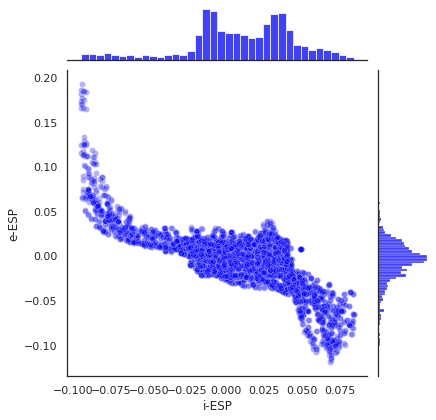

In [4]:
# int, exのデータから相関プロットを作成（ヒストグラムつき）

# 背景を白に設定
sns.set(style="white", color_codes=True)
# plt.figure(figsize=(10, 8))  # プロットのサイズを設定

# plt.rcParams['font.family']= 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']

# グラフを出力
sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")

plt.rcParams['font.size'] = 12
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.left'] = 0.20

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_ESPAR_plot.png"
plt.savefig(output_fig_path)

In [5]:
# 分割の仕方：まずは負の領域を0~min(負の領域)で指定し、その負の領域で4分割する。（ex: 0~-2なら-1.5~-2の範囲を表示）

# product_dfの負の領域を取得
# 負の値のidx
negative_product_idx = product_df[product_df["φintφex"]<0].index
# 負の値の数
negative_product_num = len(product_df[product_df["φintφex"]<0])
# 負の値のdf
negative_product_df = product_df.iloc[negative_product_idx]

# 正の値のidx
positive_product_idx = product_df[product_df["φintφex"]>0].index
# 正の値の数
positive_product_num = len(product_df[product_df["φintφex"]>0])
# 正の値のdf
positive_product_df = product_df.iloc[positive_product_idx]

concat_df["negative_product"] = np.nan
concat_df["positive_product"] = np.nan

# concat_df["negative_product"]カラムを作成し、負の値ならそのまま、正なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] < 0:
        concat_df["negative_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["negative_product"].iloc[idx] = 0

# concat_df["positive_product"]カラムを作成し、正の値ならそのまま、負なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] > 0:
        concat_df["positive_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["positive_product"].iloc[idx] = 0


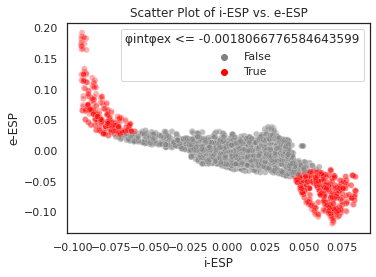

In [9]:
# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
percentage = 0.25

# negative_productの上位25%を取得(四捨五入してる)
over_threshold = round(negative_product_num * percentage)
# 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]

# 赤で描画するthresholdを設定
# 一番最後の行のnegative_productを取得
threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]

# negative_productの上位25%をグラフに表示
sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df['negative_product'] <= threshold, 
                palette={True: 'red', False: 'gray'}
               )
# sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
# sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


# グラフにタイトルとラベルを追加
plt.title("Scatter Plot of i-ESP vs. e-ESP")
plt.xlabel("i-ESP")
plt.ylabel("e-ESP")


# 凡例を調整
plt.legend(title='φintφex <= {}'.format(threshold), loc='best')

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_test.png"
plt.savefig(output_fig_path)

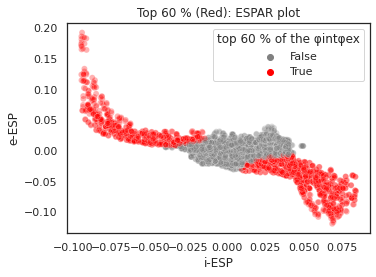

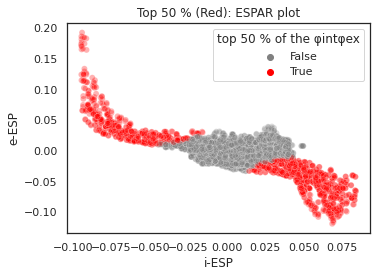

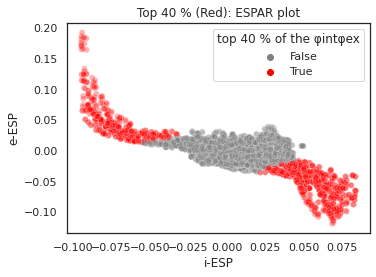

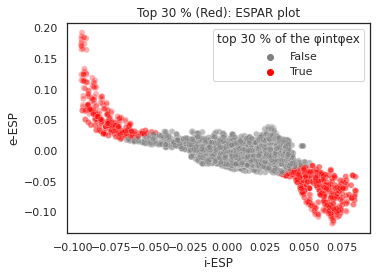

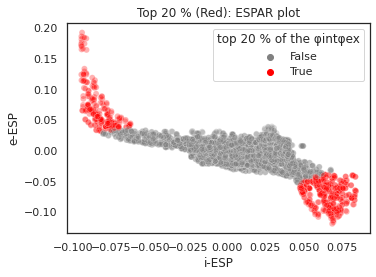

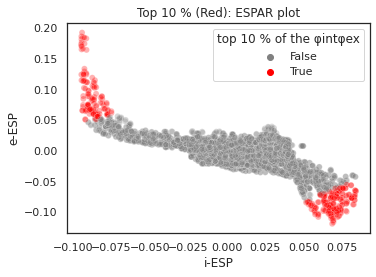

In [11]:
# for文で回して、90, 80, 70, 60, 50とpercentageごとにグラフを作成

# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
# percentageの値が0.01なら上位10%のプロットを赤で表示します
# 開始
start = 60
# 終了
stop = 0
# ステップ
step = -10

percentage_list = np.arange(start=start, stop=stop, step=step)

for percentage in percentage_list:
    # negative_productの上位XX%を取得(四捨五入してる)
    over_threshold = round(negative_product_num * (percentage*0.01))
    # 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
    over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
    over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
    over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]
    
    # 赤で描画するthresholdを設定
    # 一番最後の行のnegative_productを取得
    threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]
    
#     それぞれの%のdfを保存
    percentage_column_name = f"Top {percentage} %"
    concat_df[percentage_column_name] = np.nan

    # concat_df[percentage_column_name]カラムを作成し、thresholdよりも
    for idx in range(len(concat_df)):
        if concat_df['negative_product'].iloc[idx] <= threshold:
            concat_df[percentage_column_name].iloc[idx] = product_df.iloc[idx][0]
        else:
            concat_df[percentage_column_name].iloc[idx] = 0

    # negative_productの上位25%をグラフに表示
    sns.scatterplot(x="i-ESP", 
                    y="e-ESP", 
                    data=concat_df, 
                    alpha=0.3, 
                    hue=concat_df['negative_product'] <= threshold, 
                    palette={True: 'red', False: 'gray'}
                   )
    # sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
    # sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


    # グラフにタイトルとラベルを追加
    plt.title(f"Top {percentage} % (Red): ESPAR plot")
    plt.xlabel("i-ESP")
    plt.ylabel("e-ESP")
    

    # 凡例を調整
    plt.legend(title='top {} % of the φintφex'.format(percentage), loc='best')

    output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_top_{percentage}%.png"
    plt.savefig(output_fig_path)
    plt.show()

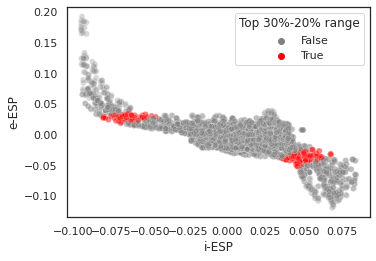

In [14]:
# 例えば30%以上20%以下の範囲にあるプロットを抽出したい場合
# 30%と20%の共通部分を0で置き換えればいい
start = 30
stop = 20
new_column_name = f"Top {start}%-{stop}% range"
percentage_column_name_start = f"Top {start} %"
percentage_column_name_stop = f"Top {stop} %"

concat_df[percentage_column_name_start]
concat_df[percentage_column_name_stop]

# 30%と20%の共通部分のindexを特定
common_index = concat_df[concat_df[percentage_column_name_start] == concat_df[percentage_column_name_stop]].index
# new_column_nameを作成し、共通部分は0で置き換える
concat_df[new_column_name] = concat_df[percentage_column_name_start].copy()  # "C"カラムを"B"カラムのコピーとして作成
concat_df.loc[common_index, new_column_name] = 0  # 共通部分を0で置き換え

sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df[new_column_name] != 0, 
                palette={True: 'red', False: 'gray'}
                )


output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_Top_{start}%-{stop}%.png"
plt.savefig(output_fig_path)

In [17]:
concat_df

,i-ESP,e-ESP,φintφex,negative_product,positive_product,Top 60 %,Top 50 %,Top 40 %,Top 30 %,Top 20 %,Top 10 %,Top 30%-20% range
0,0.040104,0.001322,0.000053,0.000000,0.000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039244,0.007442,0.000292,0.000000,0.000292,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.039266,0.006287,0.000247,0.000000,0.000247,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038935,0.005595,0.000218,0.000000,0.000218,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.039023,0.007327,0.000286,0.000000,0.000286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.040765,-0.003412,-0.000139,-0.000139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5808,0.040501,0.002400,0.000097,0.000000,0.000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5809,0.040302,0.009944,0.000401,0.000000,0.000401,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5810,0.039971,-0.005991,-0.000239,-0.000239,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# ESPAR mapを作成するために、txtにlist形式でも保存
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_concat_df_data.txt"
list_top_30_20_range = list(concat_df["Top 30%-20% range"].values)
list_top_10 = list(concat_df["Top 10 %"].values)
list_top_20 = list(concat_df["Top 20 %"].values)
list_top_30 = list(concat_df["Top 30 %"].values)

with open(output_txt_path, "w") as f:
    f.write("Top 30%-20% range list = " + str(list_top_30_20_range))
    f.write("\n\n\n\n\n\n")
    f.write("Top 10% list " + str(list_top_10))
    f.write("\n\n\n\n\n\n")
    f.write("Top 20% list " + str(list_top_20))
    f.write("\n\n\n\n\n\n")
    f.write("Top 30% list " + str(list_top_30))
    f.write("\n\n\n\n\n\n")
            